# EFC3 - Redes Neurais Profundas e Redes Neurais Recorrentes II 

## Q1 - Interpretabilidade

Para estudar a Interpretabilidade do aprendizado de máquina, iremos utilizar a seguinte rede convolucional:

In [6]:
import keras

mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
 activation='relu',input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.get_config()

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
evaluation = model.evaluate(x_test, y_test)

model.save('mnist_model.h5')

Epoch 1/5
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2036 - acc: 0.9383
Epoch 2/5
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0832 - acc: 0.9753
Epoch 3/5
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0645 - acc: 0.9804
Epoch 4/5
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0524 - acc: 0.9845
Epoch 5/5
10000/10000 [==============================] - 2s 225us/step


## Qestão 1 Item a - Innvestigate

Utilizando a biblioteca Innvestigate, podemos comparar diversos métodos de explicação. Para isso, iremos utilizar os seguintes métodos:

Gradient, SmoothGrad, DeepTaylor, LRPAlphaBeta, LRPEpsilon, LRPZ.

e os seguintes digitos:

Digito 0 ([3:4] e [10:11]) <br>
Digito 4 ([4:5] e [6:7])<br>
Digito 9 ([7:8] e [9:10]) <br>

A seguir, temos a inicialização do modelo:

In [1]:
import keras
import innvestigate
import matplotlib.pyplot as plot

mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.models.load_model('mnist_model.h5')
model_wo_sm = innvestigate.utils.keras.graph.model_wo_softmax(model)

Using TensorFlow backend.
W0627 16:37:58.115095 139853976893248 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 16:37:58.271244 139853976893248 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 16:37:58.361923 139853976893248 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0627 16:37:58.364604 139853976893248 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:131: The name 

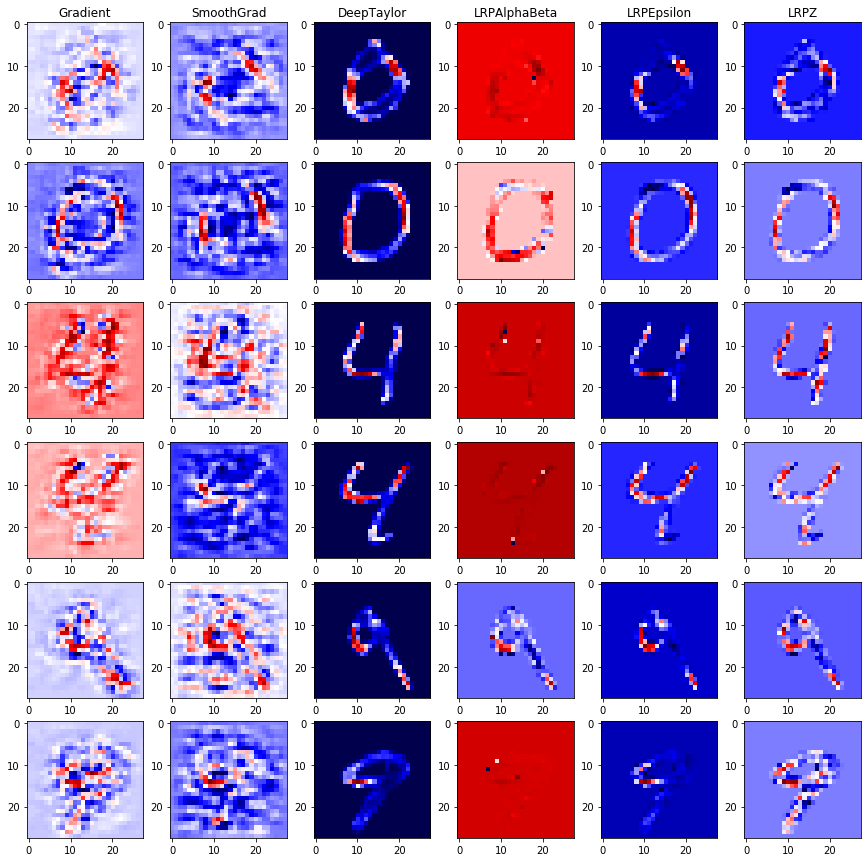

In [9]:
# Digitos a serem analisados
digito = [0, 0, 4, 4, 9, 9]
# Indices dos digitos
digitos_x = [3, 10, 4, 6, 7, 9]
digitos_y = [4, 11, 5, 7, 8, 10]

plot.figure(figsize=(15,15))

for i in range(len(digito)):
    imagem = x_test[digitos_x[i]:digitos_y[i]]

    plot.subplot(6, 6, 6*i + 1)
    if (i == 0):
        plot.title("Gradient")
    analyzer = innvestigate.create_analyzer("gradient", model_wo_sm)
    analysis = analyzer.analyze(imagem)
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')

    plot.subplot(6, 6, 6*i + 2)
    if (i == 0):
        plot.title("SmoothGrad")
    analyzer = innvestigate.create_analyzer("smoothgrad", model_wo_sm)
    analysis = analyzer.analyze(imagem)
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')

    plot.subplot(6, 6, 6*i + 3)
    if (i == 0):
        plot.title("DeepTaylor")
    analyzer = innvestigate.create_analyzer("deep_taylor", model_wo_sm)
    analysis = analyzer.analyze(imagem)
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')

    plot.subplot(6, 6, 6*i + 4)
    if (i == 0):
        plot.title("LRPAlphaBeta")
    analyzer = innvestigate.analyzer.LRPAlphaBeta(model=model_wo_sm, alpha=2, beta=1)
    analysis = analyzer.analyze(imagem)
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')

    plot.subplot(6, 6, 6*i + 5)
    if (i == 0):
        plot.title("LRPEpsilon")
    analyzer = innvestigate.analyzer.LRPEpsilon(model=model_wo_sm, epsilon=1)
    analysis = analyzer.analyze(imagem)
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')

    plot.subplot(6, 6, 6*i + 6)
    if (i == 0):
        plot.title("LRPZ")
    analyzer = innvestigate.analyzer.LRPZ(model=model_wo_sm)
    analysis = analyzer.analyze(imagem)
    plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')

Dos resultados acima, podemos ver quais as _features_ que a rede utiliza como parâmetros para detecção dos digitos.

Em algumas das métricas utilizadas, vemos que pode ser meio comfuso tentaar entender a tomada de decisão. A exemplo disso, as explicações do gradiente e do smoothgrad, os pesos mostrados  temos como tentativa de observar os pesos, uma imagem bem abrangente não dando atenção aos detalhes totalmente importantes. No caso do LRPAlphaBeta, vemos que nesta explicação, fica bem dificil de caracterizar os digitos pelas suas características como no caso do 4 ou do 9.

Já em outras explicações, como o DeepTaylor ou o LRPEsplon, temos uma boa noção de quais características os digitos possuem que contribuem bastante para seu reconhecimento.

Interessante notar como, apesar das diferentes formas de explicação, todos os métodos de uma forma ou de outra, mostram as mesmas características importantes que são utilizadas pela máquina.

### Qestão 1 Item b - Keras-vis

Agora, tentaremos observar a interpretabilidade da rede utilizando a biblioteca _keras-vis_.

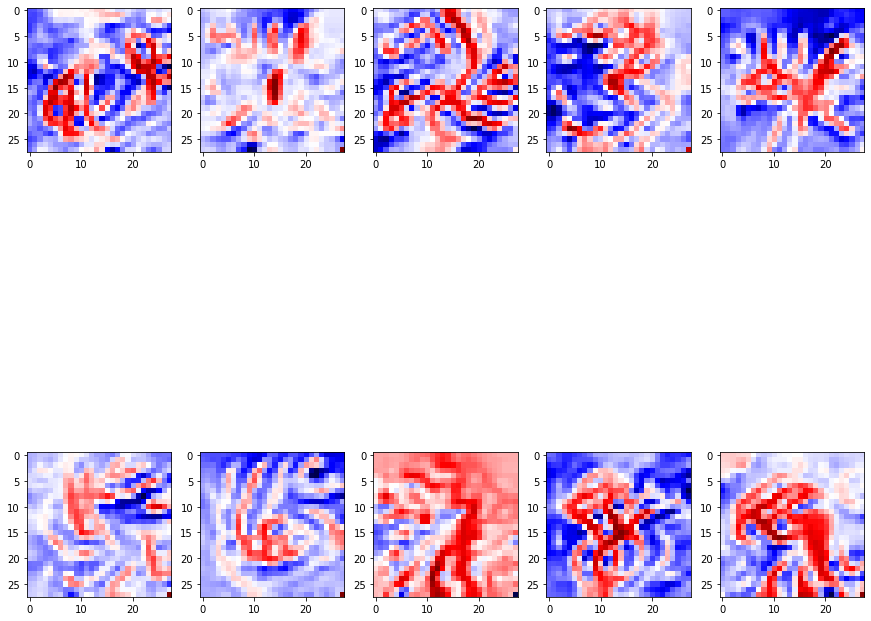

In [8]:
import keras
from vis.visualization import visualize_activation
from vis.utils import utils
import matplotlib.pyplot as plot

model = keras.models.load_model('mnist_model.h5')
layer_idx = utils.find_layer_idx(model, 'dense_2')
model.layers[layer_idx].activation = keras.activations.linear
model = utils.apply_modifications(model)

plot.figure(figsize=(15,15))

for i in range (10):
    filter_idx = i
    img = visualize_activation(model, layer_idx,
     filter_indices=filter_idx, input_range=(0., 1.), verbose=False,
     max_iter=1000, tv_weight=1., lp_norm_weight=0.)
    plot.subplot(2, 5, i+1)
    plot.imshow(img.squeeze(), cmap='seismic', interpolation='nearest')

Utilizando esta biblioteca, temos uma visão mais geral dos pesos de cada neurônio de saída ao invês de explicar por classe. Isso implica na possíbilidade de observar quais pesos (pixels), influenciam de forma geral na caracterização da saída.

Os digitos 2, 3, 8 e 9, por exemplo, podemos ver pesos que se assemelham muito à imagem dos digitos correspondentes.

Contudo, em casos como por exemplo, 0, 1, 4, 5 e 6, temos pesos mais dispersos que lembram um pouco os digitos correspondentes, mas não são tão coerentes como no caso anterior, muito possívelmente a variabilidade na maneira de se escrever estes valores.

No caso do 7, temos um caso bem peculiar, o neurônio possui pesos bem espalhados, o que dificulta sua explicação. Contudo, é interessante notar que neste caso, uma característica que define bem o digito 7 é a ausência de entradas no centro-esquerdo. Isso pode ser uma das explicações do caso anterior, em que a rede se importou mais com a ausẽncia dos dados nesta região mais do que nas características do resto do digito. Apesar disso, ainda é possível observar que há um "semblante" do número 7 no centro.

### Questão 2 - Generative Adversary Networks (GAN)

Uma das redes que chamou muita atenção nos ultimos anos foi a configuração das _GANS_. <br>
Usando novamente o MNIST como base, iremos gerar imagens semelhantes digitos do MNIST utilizando redes adversárias (Generative Adversary Networks) com o código proposto no roteiro:

In [1]:
!python3 gan.py

Using TensorFlow backend.
W0624 18:59:49.499134 140621840389952 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 18:59:49.500004 140621840389952 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 18:59:49.506455 140621840389952 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784

OMP: Info #250: KMP_AFFINITY: pid 12013 tid 12028 thread 9 bound to OS proc set 1
OMP: Info #250: KMP_AFFINITY: pid 12013 tid 12035 thread 11 bound to OS proc set 3
OMP: Info #250: KMP_AFFINITY: pid 12013 tid 12034 thread 10 bound to OS proc set 2
OMP: Info #250: KMP_AFFINITY: pid 12013 tid 12036 thread 12 bound to OS proc set 4
OMP: Info #250: KMP_AFFINITY: pid 12013 tid 12037 thread 13 bound to OS proc set 5
OMP: Info #250: KMP_AFFINITY: pid 12013 tid 12038 thread 14 bound to OS proc set 6
OMP: Info #250: KMP_AFFINITY: pid 12013 tid 12039 thread 15 bound to OS proc set 7
OMP: Info #250: KMP_AFFINITY: pid 12013 tid 12040 thread 16 bound to OS proc set 0
0 [D loss: 0.812713, acc.: 35.94%] [G loss: 0.684538]
/home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainabl

129 [D loss: 0.025967, acc.: 98.44%] [G loss: 5.002005]
130 [D loss: 0.081368, acc.: 95.31%] [G loss: 4.612262]
131 [D loss: 0.046374, acc.: 100.00%] [G loss: 4.825525]
132 [D loss: 0.082041, acc.: 100.00%] [G loss: 4.955654]
133 [D loss: 0.081456, acc.: 98.44%] [G loss: 4.536305]
134 [D loss: 0.144752, acc.: 95.31%] [G loss: 4.238148]
135 [D loss: 0.064208, acc.: 98.44%] [G loss: 4.631613]
136 [D loss: 0.214810, acc.: 89.06%] [G loss: 4.053266]
137 [D loss: 0.064351, acc.: 96.88%] [G loss: 4.945700]
138 [D loss: 0.904242, acc.: 70.31%] [G loss: 3.457147]
139 [D loss: 0.208102, acc.: 89.06%] [G loss: 3.914380]
140 [D loss: 0.040729, acc.: 100.00%] [G loss: 5.143630]
141 [D loss: 0.243701, acc.: 87.50%] [G loss: 3.917158]
142 [D loss: 0.122496, acc.: 95.31%] [G loss: 4.667028]
143 [D loss: 0.056669, acc.: 96.88%] [G loss: 4.964716]
144 [D loss: 0.523921, acc.: 78.12%] [G loss: 3.795164]
145 [D loss: 0.091510, acc.: 93.75%] [G loss: 4.533531]
146 [D loss: 0.251109, acc.: 92.19%] [G loss:

276 [D loss: 0.673620, acc.: 62.50%] [G loss: 1.283102]
277 [D loss: 0.561096, acc.: 67.19%] [G loss: 1.712738]
278 [D loss: 0.592754, acc.: 64.06%] [G loss: 1.695119]
279 [D loss: 0.755115, acc.: 50.00%] [G loss: 1.320203]
280 [D loss: 0.697895, acc.: 50.00%] [G loss: 1.270073]
281 [D loss: 0.646734, acc.: 70.31%] [G loss: 1.488958]
282 [D loss: 0.795695, acc.: 50.00%] [G loss: 1.140408]
283 [D loss: 0.688147, acc.: 54.69%] [G loss: 1.312010]
284 [D loss: 0.673897, acc.: 59.38%] [G loss: 1.433171]
285 [D loss: 0.732246, acc.: 48.44%] [G loss: 0.936280]
286 [D loss: 0.718407, acc.: 43.75%] [G loss: 1.259974]
287 [D loss: 0.815511, acc.: 43.75%] [G loss: 1.152404]
288 [D loss: 0.845762, acc.: 32.81%] [G loss: 0.891846]
289 [D loss: 0.689191, acc.: 53.12%] [G loss: 1.182394]
290 [D loss: 0.728860, acc.: 45.31%] [G loss: 1.046024]
291 [D loss: 0.707445, acc.: 53.12%] [G loss: 0.954074]
292 [D loss: 0.714843, acc.: 50.00%] [G loss: 1.050273]
293 [D loss: 0.715631, acc.: 42.19%] [G loss: 1.

424 [D loss: 0.658237, acc.: 48.44%] [G loss: 0.709355]
425 [D loss: 0.634617, acc.: 51.56%] [G loss: 0.724436]
426 [D loss: 0.655719, acc.: 50.00%] [G loss: 0.707345]
427 [D loss: 0.654317, acc.: 53.12%] [G loss: 0.687560]
428 [D loss: 0.642021, acc.: 53.12%] [G loss: 0.700207]
429 [D loss: 0.648900, acc.: 48.44%] [G loss: 0.709870]
430 [D loss: 0.662628, acc.: 45.31%] [G loss: 0.691186]
431 [D loss: 0.650532, acc.: 48.44%] [G loss: 0.713030]
432 [D loss: 0.652661, acc.: 48.44%] [G loss: 0.697173]
433 [D loss: 0.636062, acc.: 53.12%] [G loss: 0.720246]
434 [D loss: 0.654174, acc.: 56.25%] [G loss: 0.712321]
435 [D loss: 0.634997, acc.: 54.69%] [G loss: 0.701256]
436 [D loss: 0.629598, acc.: 62.50%] [G loss: 0.708665]
437 [D loss: 0.629499, acc.: 60.94%] [G loss: 0.706192]
438 [D loss: 0.653293, acc.: 53.12%] [G loss: 0.703488]
439 [D loss: 0.642250, acc.: 53.12%] [G loss: 0.718177]
440 [D loss: 0.629446, acc.: 56.25%] [G loss: 0.733190]
441 [D loss: 0.635118, acc.: 62.50%] [G loss: 0.

571 [D loss: 0.647582, acc.: 62.50%] [G loss: 0.737985]
572 [D loss: 0.672146, acc.: 56.25%] [G loss: 0.737592]
573 [D loss: 0.629236, acc.: 59.38%] [G loss: 0.760321]
574 [D loss: 0.622387, acc.: 62.50%] [G loss: 0.736778]
575 [D loss: 0.630976, acc.: 68.75%] [G loss: 0.709919]
576 [D loss: 0.645301, acc.: 57.81%] [G loss: 0.756065]
577 [D loss: 0.656287, acc.: 57.81%] [G loss: 0.752494]
578 [D loss: 0.668848, acc.: 50.00%] [G loss: 0.739442]
579 [D loss: 0.675470, acc.: 53.12%] [G loss: 0.755825]
580 [D loss: 0.661883, acc.: 54.69%] [G loss: 0.741204]
581 [D loss: 0.609860, acc.: 70.31%] [G loss: 0.766307]
582 [D loss: 0.641615, acc.: 57.81%] [G loss: 0.746290]
583 [D loss: 0.646591, acc.: 59.38%] [G loss: 0.711807]
584 [D loss: 0.642629, acc.: 67.19%] [G loss: 0.721447]
585 [D loss: 0.664673, acc.: 56.25%] [G loss: 0.760435]
586 [D loss: 0.650205, acc.: 59.38%] [G loss: 0.720031]
587 [D loss: 0.650993, acc.: 60.94%] [G loss: 0.718496]
588 [D loss: 0.665543, acc.: 59.38%] [G loss: 0.

718 [D loss: 0.602040, acc.: 67.19%] [G loss: 0.808512]
719 [D loss: 0.635309, acc.: 67.19%] [G loss: 0.790098]
720 [D loss: 0.628992, acc.: 64.06%] [G loss: 0.797036]
721 [D loss: 0.627480, acc.: 56.25%] [G loss: 0.777790]
722 [D loss: 0.630992, acc.: 75.00%] [G loss: 0.766271]
723 [D loss: 0.615373, acc.: 75.00%] [G loss: 0.780094]
724 [D loss: 0.617644, acc.: 73.44%] [G loss: 0.778159]
725 [D loss: 0.612868, acc.: 75.00%] [G loss: 0.748114]
726 [D loss: 0.642092, acc.: 59.38%] [G loss: 0.776556]
727 [D loss: 0.614440, acc.: 75.00%] [G loss: 0.754514]
728 [D loss: 0.650715, acc.: 56.25%] [G loss: 0.775455]
729 [D loss: 0.605433, acc.: 71.88%] [G loss: 0.790704]
730 [D loss: 0.618671, acc.: 65.62%] [G loss: 0.795547]
731 [D loss: 0.627649, acc.: 68.75%] [G loss: 0.805354]
732 [D loss: 0.623197, acc.: 67.19%] [G loss: 0.787982]
733 [D loss: 0.614615, acc.: 68.75%] [G loss: 0.788753]
734 [D loss: 0.620558, acc.: 68.75%] [G loss: 0.770503]
735 [D loss: 0.623721, acc.: 70.31%] [G loss: 0.

865 [D loss: 0.607668, acc.: 64.06%] [G loss: 0.788460]
866 [D loss: 0.629143, acc.: 64.06%] [G loss: 0.783465]
867 [D loss: 0.613498, acc.: 70.31%] [G loss: 0.742993]
868 [D loss: 0.644527, acc.: 60.94%] [G loss: 0.740968]
869 [D loss: 0.615962, acc.: 70.31%] [G loss: 0.750477]
870 [D loss: 0.617461, acc.: 71.88%] [G loss: 0.782844]
871 [D loss: 0.631625, acc.: 64.06%] [G loss: 0.777313]
872 [D loss: 0.613409, acc.: 75.00%] [G loss: 0.807258]
873 [D loss: 0.629878, acc.: 71.88%] [G loss: 0.813547]
874 [D loss: 0.642688, acc.: 67.19%] [G loss: 0.791007]
875 [D loss: 0.633037, acc.: 60.94%] [G loss: 0.776243]
876 [D loss: 0.636160, acc.: 64.06%] [G loss: 0.776374]
877 [D loss: 0.623039, acc.: 70.31%] [G loss: 0.828706]
878 [D loss: 0.619197, acc.: 68.75%] [G loss: 0.787852]
879 [D loss: 0.626647, acc.: 67.19%] [G loss: 0.799606]
880 [D loss: 0.578370, acc.: 79.69%] [G loss: 0.798829]
881 [D loss: 0.594445, acc.: 82.81%] [G loss: 0.775896]
882 [D loss: 0.582732, acc.: 78.12%] [G loss: 0.

1012 [D loss: 0.660680, acc.: 57.81%] [G loss: 0.823006]
1013 [D loss: 0.659903, acc.: 62.50%] [G loss: 0.824867]
1014 [D loss: 0.600188, acc.: 68.75%] [G loss: 0.846532]
1015 [D loss: 0.677598, acc.: 53.12%] [G loss: 0.835083]
1016 [D loss: 0.684051, acc.: 54.69%] [G loss: 0.793919]
1017 [D loss: 0.633148, acc.: 59.38%] [G loss: 0.802792]
1018 [D loss: 0.621001, acc.: 70.31%] [G loss: 0.806453]
1019 [D loss: 0.631469, acc.: 59.38%] [G loss: 0.852846]
1020 [D loss: 0.640291, acc.: 59.38%] [G loss: 0.849691]
1021 [D loss: 0.613677, acc.: 67.19%] [G loss: 0.838050]
1022 [D loss: 0.628543, acc.: 64.06%] [G loss: 0.843094]
1023 [D loss: 0.637021, acc.: 65.62%] [G loss: 0.836930]
1024 [D loss: 0.604707, acc.: 71.88%] [G loss: 0.804478]
1025 [D loss: 0.610870, acc.: 71.88%] [G loss: 0.795048]
1026 [D loss: 0.594910, acc.: 73.44%] [G loss: 0.833544]
1027 [D loss: 0.589153, acc.: 75.00%] [G loss: 0.866144]
1028 [D loss: 0.613046, acc.: 67.19%] [G loss: 0.827040]
1029 [D loss: 0.616423, acc.: 7

1156 [D loss: 0.600848, acc.: 71.88%] [G loss: 0.816437]
1157 [D loss: 0.583559, acc.: 67.19%] [G loss: 0.823549]
1158 [D loss: 0.618701, acc.: 67.19%] [G loss: 0.846881]
1159 [D loss: 0.614968, acc.: 64.06%] [G loss: 0.841332]
1160 [D loss: 0.564885, acc.: 76.56%] [G loss: 0.908657]
1161 [D loss: 0.616083, acc.: 68.75%] [G loss: 0.861346]
1162 [D loss: 0.604081, acc.: 71.88%] [G loss: 0.852417]
1163 [D loss: 0.570986, acc.: 81.25%] [G loss: 0.852151]
1164 [D loss: 0.671810, acc.: 53.12%] [G loss: 0.834620]
1165 [D loss: 0.601187, acc.: 71.88%] [G loss: 0.853136]
1166 [D loss: 0.648846, acc.: 59.38%] [G loss: 0.870807]
1167 [D loss: 0.680947, acc.: 50.00%] [G loss: 0.845727]
1168 [D loss: 0.616784, acc.: 65.62%] [G loss: 0.869399]
1169 [D loss: 0.563738, acc.: 81.25%] [G loss: 0.889314]
1170 [D loss: 0.561082, acc.: 81.25%] [G loss: 0.913116]
1171 [D loss: 0.611453, acc.: 68.75%] [G loss: 0.852546]
1172 [D loss: 0.585237, acc.: 76.56%] [G loss: 0.838227]
1173 [D loss: 0.585655, acc.: 7

1300 [D loss: 0.626306, acc.: 59.38%] [G loss: 0.880764]
1301 [D loss: 0.603020, acc.: 65.62%] [G loss: 0.876616]
1302 [D loss: 0.589715, acc.: 71.88%] [G loss: 0.879514]
1303 [D loss: 0.601104, acc.: 73.44%] [G loss: 0.892988]
1304 [D loss: 0.592981, acc.: 70.31%] [G loss: 0.898394]
1305 [D loss: 0.605748, acc.: 68.75%] [G loss: 0.907770]
1306 [D loss: 0.568335, acc.: 79.69%] [G loss: 0.908222]
1307 [D loss: 0.600914, acc.: 76.56%] [G loss: 0.881550]
1308 [D loss: 0.572557, acc.: 73.44%] [G loss: 0.881459]
1309 [D loss: 0.575566, acc.: 75.00%] [G loss: 0.914021]
1310 [D loss: 0.600360, acc.: 67.19%] [G loss: 0.957503]
1311 [D loss: 0.611773, acc.: 71.88%] [G loss: 0.904777]
1312 [D loss: 0.631369, acc.: 62.50%] [G loss: 0.878295]
1313 [D loss: 0.639463, acc.: 65.62%] [G loss: 0.834255]
1314 [D loss: 0.571477, acc.: 79.69%] [G loss: 0.887180]
1315 [D loss: 0.585863, acc.: 71.88%] [G loss: 0.883851]
1316 [D loss: 0.558592, acc.: 79.69%] [G loss: 0.846346]
1317 [D loss: 0.638777, acc.: 6

1444 [D loss: 0.628564, acc.: 70.31%] [G loss: 0.900244]
1445 [D loss: 0.571622, acc.: 71.88%] [G loss: 0.911712]
1446 [D loss: 0.527533, acc.: 84.38%] [G loss: 0.863977]
1447 [D loss: 0.621853, acc.: 57.81%] [G loss: 0.932482]
1448 [D loss: 0.606978, acc.: 70.31%] [G loss: 0.848883]
1449 [D loss: 0.588101, acc.: 68.75%] [G loss: 0.879382]
1450 [D loss: 0.591248, acc.: 73.44%] [G loss: 0.888366]
1451 [D loss: 0.589402, acc.: 70.31%] [G loss: 0.943742]
1452 [D loss: 0.613869, acc.: 67.19%] [G loss: 0.888980]
1453 [D loss: 0.653629, acc.: 54.69%] [G loss: 0.821350]
1454 [D loss: 0.609355, acc.: 67.19%] [G loss: 0.884154]
1455 [D loss: 0.567243, acc.: 75.00%] [G loss: 0.903899]
1456 [D loss: 0.593891, acc.: 68.75%] [G loss: 0.925913]
1457 [D loss: 0.574005, acc.: 73.44%] [G loss: 0.907412]
1458 [D loss: 0.635849, acc.: 64.06%] [G loss: 0.938107]
1459 [D loss: 0.581990, acc.: 65.62%] [G loss: 0.954909]
1460 [D loss: 0.650162, acc.: 64.06%] [G loss: 0.979477]
1461 [D loss: 0.523250, acc.: 7

1588 [D loss: 0.568357, acc.: 71.88%] [G loss: 0.978575]
1589 [D loss: 0.696361, acc.: 60.94%] [G loss: 0.912626]
1590 [D loss: 0.506426, acc.: 81.25%] [G loss: 0.924031]
1591 [D loss: 0.626059, acc.: 65.62%] [G loss: 0.946984]
1592 [D loss: 0.593335, acc.: 70.31%] [G loss: 0.957792]
1593 [D loss: 0.600514, acc.: 65.62%] [G loss: 0.875734]
1594 [D loss: 0.548995, acc.: 76.56%] [G loss: 0.965204]
1595 [D loss: 0.611082, acc.: 67.19%] [G loss: 0.896941]
1596 [D loss: 0.613565, acc.: 65.62%] [G loss: 0.862683]
1597 [D loss: 0.629689, acc.: 71.88%] [G loss: 0.875840]
1598 [D loss: 0.572827, acc.: 76.56%] [G loss: 0.875699]
1599 [D loss: 0.588543, acc.: 70.31%] [G loss: 0.897640]
1600 [D loss: 0.605203, acc.: 65.62%] [G loss: 0.917822]
1601 [D loss: 0.570526, acc.: 65.62%] [G loss: 0.960142]
1602 [D loss: 0.658089, acc.: 59.38%] [G loss: 0.882791]
1603 [D loss: 0.595378, acc.: 79.69%] [G loss: 0.869193]
1604 [D loss: 0.590896, acc.: 70.31%] [G loss: 0.950487]
1605 [D loss: 0.630908, acc.: 5

1732 [D loss: 0.545656, acc.: 75.00%] [G loss: 0.933994]
1733 [D loss: 0.578736, acc.: 71.88%] [G loss: 0.902258]
1734 [D loss: 0.556365, acc.: 73.44%] [G loss: 0.944424]
1735 [D loss: 0.617863, acc.: 64.06%] [G loss: 0.946341]
1736 [D loss: 0.629252, acc.: 64.06%] [G loss: 0.869217]
1737 [D loss: 0.602758, acc.: 68.75%] [G loss: 0.955442]
1738 [D loss: 0.606211, acc.: 73.44%] [G loss: 0.928327]
1739 [D loss: 0.556983, acc.: 75.00%] [G loss: 0.910191]
1740 [D loss: 0.617926, acc.: 68.75%] [G loss: 0.813715]
1741 [D loss: 0.633738, acc.: 62.50%] [G loss: 0.943167]
1742 [D loss: 0.606578, acc.: 71.88%] [G loss: 0.973574]
1743 [D loss: 0.599886, acc.: 65.62%] [G loss: 0.943330]
1744 [D loss: 0.572692, acc.: 75.00%] [G loss: 0.968852]
1745 [D loss: 0.545419, acc.: 78.12%] [G loss: 1.007035]
1746 [D loss: 0.608419, acc.: 70.31%] [G loss: 0.911684]
1747 [D loss: 0.673758, acc.: 59.38%] [G loss: 0.899222]
1748 [D loss: 0.537729, acc.: 82.81%] [G loss: 0.895170]
1749 [D loss: 0.583279, acc.: 7

1876 [D loss: 0.547256, acc.: 78.12%] [G loss: 0.911478]
1877 [D loss: 0.558530, acc.: 78.12%] [G loss: 0.855542]
1878 [D loss: 0.609605, acc.: 67.19%] [G loss: 0.940836]
1879 [D loss: 0.636816, acc.: 57.81%] [G loss: 0.928375]
1880 [D loss: 0.577671, acc.: 73.44%] [G loss: 0.951642]
1881 [D loss: 0.586777, acc.: 68.75%] [G loss: 0.936860]
1882 [D loss: 0.556657, acc.: 78.12%] [G loss: 1.021284]
1883 [D loss: 0.632687, acc.: 64.06%] [G loss: 0.896730]
1884 [D loss: 0.575344, acc.: 73.44%] [G loss: 0.912877]
1885 [D loss: 0.594550, acc.: 67.19%] [G loss: 0.922201]
1886 [D loss: 0.565227, acc.: 75.00%] [G loss: 0.904066]
1887 [D loss: 0.605108, acc.: 68.75%] [G loss: 0.937982]
1888 [D loss: 0.617631, acc.: 73.44%] [G loss: 0.983323]
1889 [D loss: 0.568190, acc.: 76.56%] [G loss: 1.024974]
1890 [D loss: 0.593195, acc.: 67.19%] [G loss: 1.113004]
1891 [D loss: 0.653815, acc.: 60.94%] [G loss: 0.914058]
1892 [D loss: 0.562549, acc.: 65.62%] [G loss: 0.921078]
1893 [D loss: 0.587688, acc.: 7

2020 [D loss: 0.560517, acc.: 78.12%] [G loss: 0.960001]
2021 [D loss: 0.596268, acc.: 73.44%] [G loss: 0.978042]
2022 [D loss: 0.572124, acc.: 70.31%] [G loss: 0.991810]
2023 [D loss: 0.567877, acc.: 73.44%] [G loss: 0.986319]
2024 [D loss: 0.648532, acc.: 59.38%] [G loss: 0.919319]
2025 [D loss: 0.584534, acc.: 70.31%] [G loss: 0.896062]
2026 [D loss: 0.544145, acc.: 76.56%] [G loss: 0.931103]
2027 [D loss: 0.591204, acc.: 68.75%] [G loss: 0.970337]
2028 [D loss: 0.581894, acc.: 71.88%] [G loss: 1.048450]
2029 [D loss: 0.622695, acc.: 64.06%] [G loss: 0.896992]
2030 [D loss: 0.567252, acc.: 76.56%] [G loss: 0.901633]
2031 [D loss: 0.610442, acc.: 70.31%] [G loss: 0.918474]
2032 [D loss: 0.546285, acc.: 79.69%] [G loss: 0.936813]
2033 [D loss: 0.519859, acc.: 79.69%] [G loss: 0.935602]
2034 [D loss: 0.577287, acc.: 73.44%] [G loss: 0.888386]
2035 [D loss: 0.682159, acc.: 54.69%] [G loss: 0.968802]
2036 [D loss: 0.584885, acc.: 70.31%] [G loss: 0.947161]
2037 [D loss: 0.695237, acc.: 5

2164 [D loss: 0.540976, acc.: 73.44%] [G loss: 0.904232]
2165 [D loss: 0.573494, acc.: 71.88%] [G loss: 0.911546]
2166 [D loss: 0.540779, acc.: 76.56%] [G loss: 0.999998]
2167 [D loss: 0.567455, acc.: 73.44%] [G loss: 0.965439]
2168 [D loss: 0.596553, acc.: 67.19%] [G loss: 0.950555]
2169 [D loss: 0.575244, acc.: 75.00%] [G loss: 1.001665]
2170 [D loss: 0.551997, acc.: 79.69%] [G loss: 1.038565]
2171 [D loss: 0.637369, acc.: 67.19%] [G loss: 1.012341]
2172 [D loss: 0.635458, acc.: 57.81%] [G loss: 0.969100]
2173 [D loss: 0.587960, acc.: 71.88%] [G loss: 0.960711]
2174 [D loss: 0.529594, acc.: 81.25%] [G loss: 1.031489]
2175 [D loss: 0.581376, acc.: 68.75%] [G loss: 0.958521]
2176 [D loss: 0.604879, acc.: 65.62%] [G loss: 0.874839]
2177 [D loss: 0.571693, acc.: 75.00%] [G loss: 0.945883]
2178 [D loss: 0.662090, acc.: 57.81%] [G loss: 0.918134]
2179 [D loss: 0.584918, acc.: 68.75%] [G loss: 0.856042]
2180 [D loss: 0.567668, acc.: 70.31%] [G loss: 1.029450]
2181 [D loss: 0.606046, acc.: 6

2309 [D loss: 0.563218, acc.: 71.88%] [G loss: 0.921892]
2310 [D loss: 0.543981, acc.: 76.56%] [G loss: 0.922683]
2311 [D loss: 0.559205, acc.: 73.44%] [G loss: 0.924989]
2312 [D loss: 0.612499, acc.: 65.62%] [G loss: 1.009411]
2313 [D loss: 0.554582, acc.: 78.12%] [G loss: 0.964448]
2314 [D loss: 0.641564, acc.: 59.38%] [G loss: 0.873616]
2315 [D loss: 0.605884, acc.: 68.75%] [G loss: 0.979747]
2316 [D loss: 0.637532, acc.: 57.81%] [G loss: 0.967812]
2317 [D loss: 0.606564, acc.: 70.31%] [G loss: 0.961760]
2318 [D loss: 0.530718, acc.: 76.56%] [G loss: 0.998099]
2319 [D loss: 0.591539, acc.: 73.44%] [G loss: 1.000111]
2320 [D loss: 0.572515, acc.: 78.12%] [G loss: 1.032997]
2321 [D loss: 0.569884, acc.: 75.00%] [G loss: 0.941613]
2322 [D loss: 0.623173, acc.: 64.06%] [G loss: 0.917194]
2323 [D loss: 0.575226, acc.: 67.19%] [G loss: 0.981477]
2324 [D loss: 0.567306, acc.: 78.12%] [G loss: 1.051157]
2325 [D loss: 0.607206, acc.: 65.62%] [G loss: 0.914910]
2326 [D loss: 0.509122, acc.: 8

2453 [D loss: 0.541013, acc.: 75.00%] [G loss: 0.897251]
2454 [D loss: 0.575125, acc.: 75.00%] [G loss: 1.002001]
2455 [D loss: 0.584732, acc.: 65.62%] [G loss: 1.057047]
2456 [D loss: 0.610027, acc.: 71.88%] [G loss: 1.025852]
2457 [D loss: 0.592144, acc.: 68.75%] [G loss: 1.001778]
2458 [D loss: 0.575668, acc.: 71.88%] [G loss: 0.913869]
2459 [D loss: 0.630585, acc.: 67.19%] [G loss: 0.842433]
2460 [D loss: 0.575252, acc.: 71.88%] [G loss: 0.950508]
2461 [D loss: 0.571746, acc.: 71.88%] [G loss: 0.951483]
2462 [D loss: 0.540723, acc.: 73.44%] [G loss: 1.051724]
2463 [D loss: 0.507225, acc.: 79.69%] [G loss: 1.060853]
2464 [D loss: 0.650374, acc.: 65.62%] [G loss: 0.844679]
2465 [D loss: 0.617431, acc.: 62.50%] [G loss: 0.901761]
2466 [D loss: 0.603157, acc.: 70.31%] [G loss: 1.029429]
2467 [D loss: 0.600263, acc.: 73.44%] [G loss: 1.028568]
2468 [D loss: 0.590275, acc.: 70.31%] [G loss: 0.960964]
2469 [D loss: 0.594466, acc.: 71.88%] [G loss: 1.055255]
2470 [D loss: 0.573370, acc.: 6

2597 [D loss: 0.632349, acc.: 62.50%] [G loss: 0.966889]
2598 [D loss: 0.564959, acc.: 73.44%] [G loss: 0.949785]
2599 [D loss: 0.602302, acc.: 71.88%] [G loss: 1.036941]
2600 [D loss: 0.586966, acc.: 68.75%] [G loss: 0.933942]
2601 [D loss: 0.550173, acc.: 73.44%] [G loss: 0.973325]
2602 [D loss: 0.614001, acc.: 68.75%] [G loss: 1.026092]
2603 [D loss: 0.563574, acc.: 75.00%] [G loss: 1.061019]
2604 [D loss: 0.577756, acc.: 70.31%] [G loss: 1.098627]
2605 [D loss: 0.578615, acc.: 73.44%] [G loss: 1.006947]
2606 [D loss: 0.611214, acc.: 68.75%] [G loss: 1.087616]
2607 [D loss: 0.554097, acc.: 75.00%] [G loss: 0.940075]
2608 [D loss: 0.570871, acc.: 78.12%] [G loss: 0.973160]
2609 [D loss: 0.657934, acc.: 59.38%] [G loss: 0.946454]
2610 [D loss: 0.615834, acc.: 64.06%] [G loss: 0.960715]
2611 [D loss: 0.566075, acc.: 75.00%] [G loss: 0.933913]
2612 [D loss: 0.568301, acc.: 76.56%] [G loss: 0.934952]
2613 [D loss: 0.570297, acc.: 75.00%] [G loss: 0.929128]
2614 [D loss: 0.584912, acc.: 7

2741 [D loss: 0.625136, acc.: 68.75%] [G loss: 0.952330]
2742 [D loss: 0.496936, acc.: 87.50%] [G loss: 1.000253]
2743 [D loss: 0.565599, acc.: 70.31%] [G loss: 1.034368]
2744 [D loss: 0.651039, acc.: 64.06%] [G loss: 0.962034]
2745 [D loss: 0.576130, acc.: 67.19%] [G loss: 0.977974]
2746 [D loss: 0.561976, acc.: 70.31%] [G loss: 1.006658]
2747 [D loss: 0.609288, acc.: 71.88%] [G loss: 1.017100]
2748 [D loss: 0.559205, acc.: 73.44%] [G loss: 0.975503]
2749 [D loss: 0.592000, acc.: 71.88%] [G loss: 0.980345]
2750 [D loss: 0.526447, acc.: 81.25%] [G loss: 1.034142]
2751 [D loss: 0.586671, acc.: 71.88%] [G loss: 1.026317]
2752 [D loss: 0.589253, acc.: 70.31%] [G loss: 1.011382]
2753 [D loss: 0.652574, acc.: 59.38%] [G loss: 0.876529]
2754 [D loss: 0.580613, acc.: 68.75%] [G loss: 0.945536]
2755 [D loss: 0.548501, acc.: 75.00%] [G loss: 1.008111]
2756 [D loss: 0.554878, acc.: 71.88%] [G loss: 1.034307]
2757 [D loss: 0.564325, acc.: 75.00%] [G loss: 1.002393]
2758 [D loss: 0.563851, acc.: 7

2885 [D loss: 0.640761, acc.: 64.06%] [G loss: 0.889678]
2886 [D loss: 0.611200, acc.: 67.19%] [G loss: 0.930962]
2887 [D loss: 0.573858, acc.: 76.56%] [G loss: 0.984117]
2888 [D loss: 0.572011, acc.: 70.31%] [G loss: 0.973041]
2889 [D loss: 0.623729, acc.: 67.19%] [G loss: 0.953169]
2890 [D loss: 0.581193, acc.: 67.19%] [G loss: 0.926567]
2891 [D loss: 0.627565, acc.: 65.62%] [G loss: 0.879282]
2892 [D loss: 0.585852, acc.: 70.31%] [G loss: 1.056431]
2893 [D loss: 0.597195, acc.: 70.31%] [G loss: 0.928578]
2894 [D loss: 0.519573, acc.: 79.69%] [G loss: 0.985601]
2895 [D loss: 0.549673, acc.: 75.00%] [G loss: 0.869347]
2896 [D loss: 0.635184, acc.: 59.38%] [G loss: 0.994936]
2897 [D loss: 0.609764, acc.: 71.88%] [G loss: 0.865138]
2898 [D loss: 0.570167, acc.: 75.00%] [G loss: 0.920049]
2899 [D loss: 0.608849, acc.: 64.06%] [G loss: 0.966861]
2900 [D loss: 0.612497, acc.: 70.31%] [G loss: 1.002515]
2901 [D loss: 0.588319, acc.: 73.44%] [G loss: 0.908147]
2902 [D loss: 0.621519, acc.: 6

3029 [D loss: 0.616864, acc.: 64.06%] [G loss: 0.912386]
3030 [D loss: 0.556205, acc.: 81.25%] [G loss: 0.938980]
3031 [D loss: 0.572699, acc.: 68.75%] [G loss: 0.966785]
3032 [D loss: 0.608811, acc.: 68.75%] [G loss: 0.940349]
3033 [D loss: 0.543602, acc.: 76.56%] [G loss: 0.950481]
3034 [D loss: 0.590619, acc.: 70.31%] [G loss: 1.013408]
3035 [D loss: 0.659238, acc.: 73.44%] [G loss: 1.027812]
3036 [D loss: 0.585087, acc.: 73.44%] [G loss: 1.015459]
3037 [D loss: 0.656273, acc.: 57.81%] [G loss: 1.041280]
3038 [D loss: 0.589555, acc.: 71.88%] [G loss: 1.029008]
3039 [D loss: 0.638858, acc.: 62.50%] [G loss: 1.053360]
3040 [D loss: 0.659059, acc.: 54.69%] [G loss: 1.064639]
3041 [D loss: 0.546447, acc.: 71.88%] [G loss: 1.034695]
3042 [D loss: 0.631647, acc.: 67.19%] [G loss: 0.896137]
3043 [D loss: 0.591844, acc.: 70.31%] [G loss: 0.928147]
3044 [D loss: 0.681062, acc.: 59.38%] [G loss: 0.943118]
3045 [D loss: 0.576587, acc.: 68.75%] [G loss: 0.987118]
3046 [D loss: 0.574804, acc.: 6

3173 [D loss: 0.545609, acc.: 76.56%] [G loss: 0.988442]
3174 [D loss: 0.555446, acc.: 73.44%] [G loss: 0.929969]
3175 [D loss: 0.533551, acc.: 79.69%] [G loss: 0.931449]
3176 [D loss: 0.652448, acc.: 64.06%] [G loss: 1.012305]
3177 [D loss: 0.556132, acc.: 70.31%] [G loss: 0.942708]
3178 [D loss: 0.622441, acc.: 65.62%] [G loss: 0.924279]
3179 [D loss: 0.589629, acc.: 67.19%] [G loss: 0.913263]
3180 [D loss: 0.621186, acc.: 71.88%] [G loss: 1.017968]
3181 [D loss: 0.676670, acc.: 57.81%] [G loss: 1.002633]
3182 [D loss: 0.660559, acc.: 59.38%] [G loss: 0.930155]
3183 [D loss: 0.564746, acc.: 75.00%] [G loss: 1.076166]
3184 [D loss: 0.612240, acc.: 59.38%] [G loss: 0.947982]
3185 [D loss: 0.619024, acc.: 68.75%] [G loss: 0.931582]
3186 [D loss: 0.563059, acc.: 76.56%] [G loss: 0.987275]
3187 [D loss: 0.573815, acc.: 75.00%] [G loss: 1.009464]
3188 [D loss: 0.557186, acc.: 67.19%] [G loss: 1.088464]
3189 [D loss: 0.665182, acc.: 60.94%] [G loss: 1.030803]
3190 [D loss: 0.671939, acc.: 5

3317 [D loss: 0.595003, acc.: 65.62%] [G loss: 1.069793]
3318 [D loss: 0.636034, acc.: 62.50%] [G loss: 1.003401]
3319 [D loss: 0.589096, acc.: 70.31%] [G loss: 0.983579]
3320 [D loss: 0.535429, acc.: 81.25%] [G loss: 0.917520]
3321 [D loss: 0.557811, acc.: 65.62%] [G loss: 0.972259]
3322 [D loss: 0.590493, acc.: 68.75%] [G loss: 0.995470]
3323 [D loss: 0.605581, acc.: 68.75%] [G loss: 0.939385]
3324 [D loss: 0.613914, acc.: 64.06%] [G loss: 0.892302]
3325 [D loss: 0.687608, acc.: 62.50%] [G loss: 0.896779]
3326 [D loss: 0.591285, acc.: 70.31%] [G loss: 0.922885]
3327 [D loss: 0.586181, acc.: 76.56%] [G loss: 1.046801]
3328 [D loss: 0.593385, acc.: 73.44%] [G loss: 1.026370]
3329 [D loss: 0.589323, acc.: 73.44%] [G loss: 1.001122]
3330 [D loss: 0.649806, acc.: 59.38%] [G loss: 0.987245]
3331 [D loss: 0.591259, acc.: 64.06%] [G loss: 0.909426]
3332 [D loss: 0.696779, acc.: 54.69%] [G loss: 0.948761]
3333 [D loss: 0.639584, acc.: 56.25%] [G loss: 1.087654]
3334 [D loss: 0.602604, acc.: 7

3462 [D loss: 0.696636, acc.: 53.12%] [G loss: 1.043985]
3463 [D loss: 0.546062, acc.: 79.69%] [G loss: 1.007361]
3464 [D loss: 0.580306, acc.: 75.00%] [G loss: 0.975157]
3465 [D loss: 0.646413, acc.: 71.88%] [G loss: 1.046175]
3466 [D loss: 0.674975, acc.: 59.38%] [G loss: 0.986238]
3467 [D loss: 0.582430, acc.: 73.44%] [G loss: 0.997619]
3468 [D loss: 0.672453, acc.: 56.25%] [G loss: 0.872838]
3469 [D loss: 0.535018, acc.: 76.56%] [G loss: 1.034720]
3470 [D loss: 0.554461, acc.: 75.00%] [G loss: 0.987570]
3471 [D loss: 0.639228, acc.: 65.62%] [G loss: 0.911329]
3472 [D loss: 0.596884, acc.: 62.50%] [G loss: 0.938224]
3473 [D loss: 0.633859, acc.: 65.62%] [G loss: 0.938847]
3474 [D loss: 0.584942, acc.: 70.31%] [G loss: 0.942106]
3475 [D loss: 0.657627, acc.: 67.19%] [G loss: 0.970013]
3476 [D loss: 0.559324, acc.: 68.75%] [G loss: 0.974872]
3477 [D loss: 0.583785, acc.: 65.62%] [G loss: 1.019900]
3478 [D loss: 0.663365, acc.: 65.62%] [G loss: 1.013793]
3479 [D loss: 0.576329, acc.: 7

3606 [D loss: 0.633141, acc.: 65.62%] [G loss: 0.939642]
3607 [D loss: 0.586389, acc.: 71.88%] [G loss: 0.965189]
3608 [D loss: 0.585424, acc.: 75.00%] [G loss: 0.995648]
3609 [D loss: 0.552923, acc.: 78.12%] [G loss: 1.003892]
3610 [D loss: 0.545105, acc.: 78.12%] [G loss: 1.031961]
3611 [D loss: 0.567628, acc.: 76.56%] [G loss: 1.051937]
3612 [D loss: 0.635960, acc.: 60.94%] [G loss: 1.030063]
3613 [D loss: 0.554100, acc.: 78.12%] [G loss: 0.976172]
3614 [D loss: 0.627707, acc.: 68.75%] [G loss: 0.954379]
3615 [D loss: 0.637350, acc.: 59.38%] [G loss: 0.952717]
3616 [D loss: 0.584296, acc.: 65.62%] [G loss: 0.954693]
3617 [D loss: 0.586215, acc.: 68.75%] [G loss: 1.130199]
3618 [D loss: 0.591490, acc.: 65.62%] [G loss: 1.012830]
3619 [D loss: 0.683902, acc.: 57.81%] [G loss: 0.948182]
3620 [D loss: 0.574544, acc.: 73.44%] [G loss: 0.988774]
3621 [D loss: 0.567257, acc.: 70.31%] [G loss: 1.026435]
3622 [D loss: 0.595715, acc.: 65.62%] [G loss: 1.089700]
3623 [D loss: 0.649806, acc.: 6

3750 [D loss: 0.608458, acc.: 70.31%] [G loss: 1.036703]
3751 [D loss: 0.573631, acc.: 68.75%] [G loss: 1.023870]
3752 [D loss: 0.593139, acc.: 70.31%] [G loss: 1.007744]
3753 [D loss: 0.557254, acc.: 73.44%] [G loss: 1.015789]
3754 [D loss: 0.556829, acc.: 81.25%] [G loss: 1.033696]
3755 [D loss: 0.617048, acc.: 65.62%] [G loss: 1.005088]
3756 [D loss: 0.699721, acc.: 57.81%] [G loss: 1.044940]
3757 [D loss: 0.578433, acc.: 75.00%] [G loss: 1.058719]
3758 [D loss: 0.625780, acc.: 64.06%] [G loss: 0.999393]
3759 [D loss: 0.556946, acc.: 73.44%] [G loss: 1.067404]
3760 [D loss: 0.603707, acc.: 70.31%] [G loss: 1.046058]
3761 [D loss: 0.585146, acc.: 73.44%] [G loss: 1.126672]
3762 [D loss: 0.606195, acc.: 71.88%] [G loss: 1.088401]
3763 [D loss: 0.672871, acc.: 56.25%] [G loss: 1.046080]
3764 [D loss: 0.631706, acc.: 67.19%] [G loss: 1.032980]
3765 [D loss: 0.572234, acc.: 78.12%] [G loss: 1.086150]
3766 [D loss: 0.614593, acc.: 62.50%] [G loss: 1.123082]
3767 [D loss: 0.582281, acc.: 6

3894 [D loss: 0.591734, acc.: 64.06%] [G loss: 0.994227]
3895 [D loss: 0.603342, acc.: 70.31%] [G loss: 1.043612]
3896 [D loss: 0.588094, acc.: 71.88%] [G loss: 1.070372]
3897 [D loss: 0.667510, acc.: 62.50%] [G loss: 0.965159]
3898 [D loss: 0.605289, acc.: 68.75%] [G loss: 0.920062]
3899 [D loss: 0.589787, acc.: 78.12%] [G loss: 0.907584]
3900 [D loss: 0.654025, acc.: 65.62%] [G loss: 0.984279]
3901 [D loss: 0.644293, acc.: 59.38%] [G loss: 1.056121]
3902 [D loss: 0.583984, acc.: 71.88%] [G loss: 0.950923]
3903 [D loss: 0.639680, acc.: 65.62%] [G loss: 0.864735]
3904 [D loss: 0.604229, acc.: 67.19%] [G loss: 0.969920]
3905 [D loss: 0.503506, acc.: 78.12%] [G loss: 1.031593]
3906 [D loss: 0.579666, acc.: 70.31%] [G loss: 1.009482]
3907 [D loss: 0.675467, acc.: 64.06%] [G loss: 1.037827]
3908 [D loss: 0.653662, acc.: 60.94%] [G loss: 1.029891]
3909 [D loss: 0.513859, acc.: 79.69%] [G loss: 1.080827]
3910 [D loss: 0.626039, acc.: 67.19%] [G loss: 0.980300]
3911 [D loss: 0.594592, acc.: 6

4038 [D loss: 0.618160, acc.: 67.19%] [G loss: 0.951397]
4039 [D loss: 0.558870, acc.: 73.44%] [G loss: 1.127325]
4040 [D loss: 0.648735, acc.: 62.50%] [G loss: 0.879970]
4041 [D loss: 0.597241, acc.: 68.75%] [G loss: 0.983004]
4042 [D loss: 0.655927, acc.: 62.50%] [G loss: 0.947353]
4043 [D loss: 0.615123, acc.: 67.19%] [G loss: 0.983602]
4044 [D loss: 0.645316, acc.: 59.38%] [G loss: 0.983321]
4045 [D loss: 0.636872, acc.: 59.38%] [G loss: 0.947810]
4046 [D loss: 0.680055, acc.: 56.25%] [G loss: 1.024871]
4047 [D loss: 0.616376, acc.: 67.19%] [G loss: 1.051998]
4048 [D loss: 0.601510, acc.: 67.19%] [G loss: 1.012175]
4049 [D loss: 0.656570, acc.: 62.50%] [G loss: 1.017525]
4050 [D loss: 0.581515, acc.: 68.75%] [G loss: 0.862800]
4051 [D loss: 0.571680, acc.: 71.88%] [G loss: 0.974541]
4052 [D loss: 0.559756, acc.: 68.75%] [G loss: 1.055479]
4053 [D loss: 0.566016, acc.: 71.88%] [G loss: 1.013901]
4054 [D loss: 0.611125, acc.: 71.88%] [G loss: 1.041641]
4055 [D loss: 0.683189, acc.: 5

4182 [D loss: 0.613744, acc.: 64.06%] [G loss: 1.053043]
4183 [D loss: 0.646908, acc.: 67.19%] [G loss: 0.981211]
4184 [D loss: 0.564027, acc.: 75.00%] [G loss: 0.952841]
4185 [D loss: 0.557969, acc.: 75.00%] [G loss: 0.984387]
4186 [D loss: 0.563780, acc.: 70.31%] [G loss: 0.972330]
4187 [D loss: 0.640220, acc.: 65.62%] [G loss: 1.079409]
4188 [D loss: 0.574625, acc.: 70.31%] [G loss: 1.042753]
4189 [D loss: 0.651294, acc.: 60.94%] [G loss: 0.978870]
4190 [D loss: 0.631006, acc.: 64.06%] [G loss: 1.058748]
4191 [D loss: 0.590050, acc.: 67.19%] [G loss: 1.015185]
4192 [D loss: 0.597330, acc.: 70.31%] [G loss: 0.962624]
4193 [D loss: 0.592846, acc.: 70.31%] [G loss: 0.990131]
4194 [D loss: 0.580565, acc.: 67.19%] [G loss: 0.986524]
4195 [D loss: 0.651475, acc.: 65.62%] [G loss: 0.952080]
4196 [D loss: 0.585827, acc.: 65.62%] [G loss: 1.105103]
4197 [D loss: 0.575335, acc.: 70.31%] [G loss: 1.030668]
4198 [D loss: 0.571620, acc.: 73.44%] [G loss: 1.064321]
4199 [D loss: 0.634741, acc.: 6

4327 [D loss: 0.512437, acc.: 70.31%] [G loss: 1.001787]
4328 [D loss: 0.572466, acc.: 70.31%] [G loss: 0.988876]
4329 [D loss: 0.607938, acc.: 70.31%] [G loss: 0.972202]
4330 [D loss: 0.491757, acc.: 79.69%] [G loss: 0.902504]
4331 [D loss: 0.658333, acc.: 54.69%] [G loss: 1.131099]
4332 [D loss: 0.651711, acc.: 65.62%] [G loss: 0.949655]
4333 [D loss: 0.611601, acc.: 65.62%] [G loss: 0.962286]
4334 [D loss: 0.581861, acc.: 71.88%] [G loss: 0.983518]
4335 [D loss: 0.647861, acc.: 59.38%] [G loss: 0.993534]
4336 [D loss: 0.616682, acc.: 67.19%] [G loss: 0.968770]
4337 [D loss: 0.606970, acc.: 64.06%] [G loss: 0.959113]
4338 [D loss: 0.658118, acc.: 60.94%] [G loss: 0.990756]
4339 [D loss: 0.590059, acc.: 70.31%] [G loss: 0.998526]
4340 [D loss: 0.586726, acc.: 65.62%] [G loss: 1.110532]
4341 [D loss: 0.582197, acc.: 75.00%] [G loss: 0.943455]
4342 [D loss: 0.631743, acc.: 64.06%] [G loss: 0.982325]
4343 [D loss: 0.649172, acc.: 56.25%] [G loss: 0.930262]
4344 [D loss: 0.641797, acc.: 6

4471 [D loss: 0.608943, acc.: 67.19%] [G loss: 1.071329]
4472 [D loss: 0.663253, acc.: 64.06%] [G loss: 0.946583]
4473 [D loss: 0.607095, acc.: 65.62%] [G loss: 0.926950]
4474 [D loss: 0.632951, acc.: 60.94%] [G loss: 0.908415]
4475 [D loss: 0.602605, acc.: 64.06%] [G loss: 1.000908]
4476 [D loss: 0.622705, acc.: 65.62%] [G loss: 0.975630]
4477 [D loss: 0.544924, acc.: 73.44%] [G loss: 0.938811]
4478 [D loss: 0.616491, acc.: 60.94%] [G loss: 0.880982]
4479 [D loss: 0.609310, acc.: 64.06%] [G loss: 0.941179]
4480 [D loss: 0.605611, acc.: 67.19%] [G loss: 0.940248]
4481 [D loss: 0.599265, acc.: 71.88%] [G loss: 1.034347]
4482 [D loss: 0.661090, acc.: 59.38%] [G loss: 0.987596]
4483 [D loss: 0.529067, acc.: 82.81%] [G loss: 1.113833]
4484 [D loss: 0.646511, acc.: 62.50%] [G loss: 1.042920]
4485 [D loss: 0.644560, acc.: 67.19%] [G loss: 1.053134]
4486 [D loss: 0.610597, acc.: 68.75%] [G loss: 1.014030]
4487 [D loss: 0.670991, acc.: 57.81%] [G loss: 0.892815]
4488 [D loss: 0.663590, acc.: 6

4615 [D loss: 0.582552, acc.: 70.31%] [G loss: 1.099344]
4616 [D loss: 0.609624, acc.: 70.31%] [G loss: 0.882256]
4617 [D loss: 0.652203, acc.: 56.25%] [G loss: 0.892803]
4618 [D loss: 0.537918, acc.: 81.25%] [G loss: 0.857868]
4619 [D loss: 0.597109, acc.: 68.75%] [G loss: 0.820707]
4620 [D loss: 0.611392, acc.: 68.75%] [G loss: 0.931827]
4621 [D loss: 0.660342, acc.: 64.06%] [G loss: 0.906266]
4622 [D loss: 0.657248, acc.: 59.38%] [G loss: 0.848813]
4623 [D loss: 0.550420, acc.: 70.31%] [G loss: 1.020907]
4624 [D loss: 0.639505, acc.: 67.19%] [G loss: 1.016832]
4625 [D loss: 0.626202, acc.: 68.75%] [G loss: 1.038954]
4626 [D loss: 0.627610, acc.: 67.19%] [G loss: 1.039458]
4627 [D loss: 0.615476, acc.: 65.62%] [G loss: 1.032324]
4628 [D loss: 0.608447, acc.: 70.31%] [G loss: 0.959875]
4629 [D loss: 0.650209, acc.: 62.50%] [G loss: 0.993170]
4630 [D loss: 0.633968, acc.: 60.94%] [G loss: 1.097095]
4631 [D loss: 0.592932, acc.: 70.31%] [G loss: 0.982913]
4632 [D loss: 0.604321, acc.: 5

4759 [D loss: 0.614097, acc.: 68.75%] [G loss: 0.978218]
4760 [D loss: 0.610948, acc.: 60.94%] [G loss: 1.001474]
4761 [D loss: 0.618886, acc.: 67.19%] [G loss: 1.000004]
4762 [D loss: 0.587591, acc.: 62.50%] [G loss: 1.023327]
4763 [D loss: 0.638641, acc.: 64.06%] [G loss: 0.893532]
4764 [D loss: 0.568512, acc.: 78.12%] [G loss: 0.957335]
4765 [D loss: 0.544855, acc.: 70.31%] [G loss: 1.033921]
4766 [D loss: 0.666480, acc.: 54.69%] [G loss: 1.006891]
4767 [D loss: 0.599682, acc.: 68.75%] [G loss: 1.093575]
4768 [D loss: 0.581586, acc.: 73.44%] [G loss: 0.983234]
4769 [D loss: 0.590503, acc.: 68.75%] [G loss: 1.004950]
4770 [D loss: 0.645475, acc.: 65.62%] [G loss: 0.952051]
4771 [D loss: 0.589431, acc.: 71.88%] [G loss: 0.906953]
4772 [D loss: 0.609598, acc.: 68.75%] [G loss: 1.051480]
4773 [D loss: 0.581136, acc.: 70.31%] [G loss: 1.034368]
4774 [D loss: 0.653049, acc.: 60.94%] [G loss: 1.090383]
4775 [D loss: 0.622217, acc.: 64.06%] [G loss: 0.931119]
4776 [D loss: 0.657166, acc.: 6

4903 [D loss: 0.636228, acc.: 71.88%] [G loss: 1.004493]
4904 [D loss: 0.605445, acc.: 64.06%] [G loss: 0.847705]
4905 [D loss: 0.667302, acc.: 62.50%] [G loss: 0.948208]
4906 [D loss: 0.684448, acc.: 60.94%] [G loss: 0.946240]
4907 [D loss: 0.629521, acc.: 62.50%] [G loss: 0.846245]
4908 [D loss: 0.634873, acc.: 68.75%] [G loss: 0.942640]
4909 [D loss: 0.603579, acc.: 65.62%] [G loss: 1.071488]
4910 [D loss: 0.582983, acc.: 65.62%] [G loss: 0.982820]
4911 [D loss: 0.591769, acc.: 70.31%] [G loss: 1.054928]
4912 [D loss: 0.644429, acc.: 59.38%] [G loss: 0.936844]
4913 [D loss: 0.611272, acc.: 65.62%] [G loss: 0.919913]
4914 [D loss: 0.594224, acc.: 65.62%] [G loss: 1.032083]
4915 [D loss: 0.584579, acc.: 68.75%] [G loss: 1.029092]
4916 [D loss: 0.670897, acc.: 57.81%] [G loss: 1.002885]
4917 [D loss: 0.590136, acc.: 76.56%] [G loss: 1.136714]
4918 [D loss: 0.616841, acc.: 65.62%] [G loss: 1.051094]
4919 [D loss: 0.648992, acc.: 56.25%] [G loss: 1.011112]
4920 [D loss: 0.597307, acc.: 6

5047 [D loss: 0.626052, acc.: 65.62%] [G loss: 0.894427]
5048 [D loss: 0.665820, acc.: 70.31%] [G loss: 1.079972]
5049 [D loss: 0.661579, acc.: 70.31%] [G loss: 0.985568]
5050 [D loss: 0.629160, acc.: 68.75%] [G loss: 0.993459]
5051 [D loss: 0.599956, acc.: 71.88%] [G loss: 1.001852]
5052 [D loss: 0.609192, acc.: 64.06%] [G loss: 0.917073]
5053 [D loss: 0.623802, acc.: 73.44%] [G loss: 1.081681]
5054 [D loss: 0.663702, acc.: 57.81%] [G loss: 0.962522]
5055 [D loss: 0.632454, acc.: 64.06%] [G loss: 0.926004]
5056 [D loss: 0.640308, acc.: 65.62%] [G loss: 0.900717]
5057 [D loss: 0.662793, acc.: 56.25%] [G loss: 0.982849]
5058 [D loss: 0.564449, acc.: 76.56%] [G loss: 0.935790]
5059 [D loss: 0.609251, acc.: 57.81%] [G loss: 0.883786]
5060 [D loss: 0.679367, acc.: 54.69%] [G loss: 1.014197]
5061 [D loss: 0.620859, acc.: 71.88%] [G loss: 1.030519]
5062 [D loss: 0.568746, acc.: 70.31%] [G loss: 1.003088]
5063 [D loss: 0.598624, acc.: 57.81%] [G loss: 1.044887]
5064 [D loss: 0.616835, acc.: 6

5191 [D loss: 0.559016, acc.: 68.75%] [G loss: 0.855863]
5192 [D loss: 0.577134, acc.: 70.31%] [G loss: 0.853761]
5193 [D loss: 0.709662, acc.: 56.25%] [G loss: 0.889932]
5194 [D loss: 0.643859, acc.: 65.62%] [G loss: 1.154204]
5195 [D loss: 0.597748, acc.: 65.62%] [G loss: 1.078508]
5196 [D loss: 0.739832, acc.: 53.12%] [G loss: 1.018345]
5197 [D loss: 0.566455, acc.: 71.88%] [G loss: 1.005093]
5198 [D loss: 0.603308, acc.: 65.62%] [G loss: 0.970084]
5199 [D loss: 0.611953, acc.: 70.31%] [G loss: 0.947777]
5200 [D loss: 0.625909, acc.: 64.06%] [G loss: 0.948640]
5201 [D loss: 0.663241, acc.: 59.38%] [G loss: 1.051189]
5202 [D loss: 0.602160, acc.: 73.44%] [G loss: 0.977401]
5203 [D loss: 0.674575, acc.: 54.69%] [G loss: 1.003375]
5204 [D loss: 0.575143, acc.: 73.44%] [G loss: 0.990300]
5205 [D loss: 0.590907, acc.: 67.19%] [G loss: 0.909119]
5206 [D loss: 0.621263, acc.: 64.06%] [G loss: 0.838233]
5207 [D loss: 0.600066, acc.: 65.62%] [G loss: 0.877419]
5208 [D loss: 0.705558, acc.: 4

5335 [D loss: 0.670227, acc.: 56.25%] [G loss: 1.039521]
5336 [D loss: 0.625371, acc.: 64.06%] [G loss: 0.931958]
5337 [D loss: 0.605495, acc.: 60.94%] [G loss: 0.898435]
5338 [D loss: 0.624637, acc.: 64.06%] [G loss: 0.938430]
5339 [D loss: 0.590106, acc.: 67.19%] [G loss: 0.978739]
5340 [D loss: 0.536892, acc.: 78.12%] [G loss: 0.949576]
5341 [D loss: 0.663309, acc.: 59.38%] [G loss: 0.922442]
5342 [D loss: 0.550449, acc.: 75.00%] [G loss: 0.962818]
5343 [D loss: 0.628549, acc.: 65.62%] [G loss: 1.123428]
5344 [D loss: 0.614551, acc.: 73.44%] [G loss: 1.003970]
5345 [D loss: 0.549458, acc.: 75.00%] [G loss: 0.960927]
5346 [D loss: 0.661286, acc.: 59.38%] [G loss: 0.949538]
5347 [D loss: 0.609912, acc.: 67.19%] [G loss: 0.957622]
5348 [D loss: 0.634665, acc.: 67.19%] [G loss: 0.980781]
5349 [D loss: 0.544989, acc.: 76.56%] [G loss: 0.954350]
5350 [D loss: 0.556119, acc.: 76.56%] [G loss: 1.058160]
5351 [D loss: 0.690957, acc.: 53.12%] [G loss: 0.942330]
5352 [D loss: 0.627581, acc.: 6

5479 [D loss: 0.620893, acc.: 60.94%] [G loss: 1.058657]
5480 [D loss: 0.609712, acc.: 62.50%] [G loss: 1.023213]
5481 [D loss: 0.628272, acc.: 62.50%] [G loss: 1.021555]
5482 [D loss: 0.650926, acc.: 64.06%] [G loss: 0.943048]
5483 [D loss: 0.621530, acc.: 65.62%] [G loss: 0.979134]
5484 [D loss: 0.612678, acc.: 65.62%] [G loss: 1.066631]
5485 [D loss: 0.608378, acc.: 64.06%] [G loss: 1.086227]
5486 [D loss: 0.667312, acc.: 62.50%] [G loss: 0.980444]
5487 [D loss: 0.590359, acc.: 65.62%] [G loss: 0.969450]
5488 [D loss: 0.627935, acc.: 59.38%] [G loss: 0.974298]
5489 [D loss: 0.617631, acc.: 65.62%] [G loss: 0.992156]
5490 [D loss: 0.558931, acc.: 68.75%] [G loss: 0.988533]
5491 [D loss: 0.584590, acc.: 68.75%] [G loss: 1.017565]
5492 [D loss: 0.643729, acc.: 57.81%] [G loss: 0.826904]
5493 [D loss: 0.657003, acc.: 65.62%] [G loss: 0.941614]
5494 [D loss: 0.656459, acc.: 67.19%] [G loss: 0.963618]
5495 [D loss: 0.625754, acc.: 65.62%] [G loss: 0.952739]
5496 [D loss: 0.629433, acc.: 6

5623 [D loss: 0.632357, acc.: 60.94%] [G loss: 0.915607]
5624 [D loss: 0.654220, acc.: 59.38%] [G loss: 0.912179]
5625 [D loss: 0.627703, acc.: 65.62%] [G loss: 1.031073]
5626 [D loss: 0.621653, acc.: 68.75%] [G loss: 0.927749]
5627 [D loss: 0.541967, acc.: 78.12%] [G loss: 1.038678]
5628 [D loss: 0.619381, acc.: 68.75%] [G loss: 1.108197]
5629 [D loss: 0.720057, acc.: 56.25%] [G loss: 0.986594]
5630 [D loss: 0.607177, acc.: 68.75%] [G loss: 0.946034]
5631 [D loss: 0.568285, acc.: 75.00%] [G loss: 0.970945]
5632 [D loss: 0.668086, acc.: 64.06%] [G loss: 0.982585]
5633 [D loss: 0.596973, acc.: 73.44%] [G loss: 0.845482]
5634 [D loss: 0.619857, acc.: 57.81%] [G loss: 0.978523]
5635 [D loss: 0.608114, acc.: 70.31%] [G loss: 0.948890]
5636 [D loss: 0.565714, acc.: 68.75%] [G loss: 1.018275]
5637 [D loss: 0.608435, acc.: 71.88%] [G loss: 1.057323]
5638 [D loss: 0.615582, acc.: 64.06%] [G loss: 1.052451]
5639 [D loss: 0.687757, acc.: 56.25%] [G loss: 0.933328]
5640 [D loss: 0.628867, acc.: 6

5767 [D loss: 0.611543, acc.: 68.75%] [G loss: 0.954018]
5768 [D loss: 0.591388, acc.: 70.31%] [G loss: 0.983836]
5769 [D loss: 0.619617, acc.: 65.62%] [G loss: 1.009001]
5770 [D loss: 0.730160, acc.: 54.69%] [G loss: 0.954602]
5771 [D loss: 0.688580, acc.: 56.25%] [G loss: 1.000042]
5772 [D loss: 0.623411, acc.: 60.94%] [G loss: 1.001226]
5773 [D loss: 0.608121, acc.: 65.62%] [G loss: 1.032810]
5774 [D loss: 0.566630, acc.: 68.75%] [G loss: 1.086235]
5775 [D loss: 0.668194, acc.: 57.81%] [G loss: 1.061270]
5776 [D loss: 0.661079, acc.: 62.50%] [G loss: 0.982611]
5777 [D loss: 0.644735, acc.: 64.06%] [G loss: 0.885386]
5778 [D loss: 0.647928, acc.: 56.25%] [G loss: 0.937328]
5779 [D loss: 0.687543, acc.: 51.56%] [G loss: 0.967305]
5780 [D loss: 0.622345, acc.: 62.50%] [G loss: 1.007141]
5781 [D loss: 0.621635, acc.: 65.62%] [G loss: 1.096010]
5782 [D loss: 0.637164, acc.: 68.75%] [G loss: 1.107582]
5783 [D loss: 0.610477, acc.: 70.31%] [G loss: 0.962373]
5784 [D loss: 0.637533, acc.: 6

5911 [D loss: 0.639769, acc.: 65.62%] [G loss: 0.861158]
5912 [D loss: 0.619584, acc.: 67.19%] [G loss: 0.886361]
5913 [D loss: 0.599385, acc.: 70.31%] [G loss: 0.988754]
5914 [D loss: 0.724777, acc.: 50.00%] [G loss: 0.992579]
5915 [D loss: 0.645012, acc.: 64.06%] [G loss: 0.949094]
5916 [D loss: 0.629917, acc.: 60.94%] [G loss: 0.853720]
5917 [D loss: 0.616921, acc.: 65.62%] [G loss: 1.051948]
5918 [D loss: 0.635893, acc.: 64.06%] [G loss: 1.041722]
5919 [D loss: 0.604098, acc.: 64.06%] [G loss: 1.037424]
5920 [D loss: 0.662646, acc.: 56.25%] [G loss: 1.030008]
5921 [D loss: 0.608520, acc.: 65.62%] [G loss: 0.966455]
5922 [D loss: 0.720993, acc.: 53.12%] [G loss: 0.904882]
5923 [D loss: 0.661429, acc.: 60.94%] [G loss: 0.817703]
5924 [D loss: 0.684240, acc.: 57.81%] [G loss: 0.894522]
5925 [D loss: 0.628673, acc.: 65.62%] [G loss: 1.077377]
5926 [D loss: 0.657564, acc.: 60.94%] [G loss: 0.946858]
5927 [D loss: 0.659929, acc.: 68.75%] [G loss: 0.923042]
5928 [D loss: 0.584326, acc.: 7

6055 [D loss: 0.639852, acc.: 64.06%] [G loss: 0.987754]
6056 [D loss: 0.565440, acc.: 73.44%] [G loss: 0.911126]
6057 [D loss: 0.615753, acc.: 68.75%] [G loss: 0.928325]
6058 [D loss: 0.572320, acc.: 71.88%] [G loss: 0.905656]
6059 [D loss: 0.575691, acc.: 70.31%] [G loss: 0.971817]
6060 [D loss: 0.625797, acc.: 57.81%] [G loss: 0.884796]
6061 [D loss: 0.638534, acc.: 64.06%] [G loss: 0.926516]
6062 [D loss: 0.587565, acc.: 65.62%] [G loss: 1.093216]
6063 [D loss: 0.653111, acc.: 64.06%] [G loss: 0.975459]
6064 [D loss: 0.642821, acc.: 60.94%] [G loss: 0.954054]
6065 [D loss: 0.617764, acc.: 67.19%] [G loss: 0.974615]
6066 [D loss: 0.685667, acc.: 59.38%] [G loss: 1.013459]
6067 [D loss: 0.580294, acc.: 68.75%] [G loss: 1.098709]
6068 [D loss: 0.597883, acc.: 70.31%] [G loss: 0.982074]
6069 [D loss: 0.585257, acc.: 70.31%] [G loss: 0.886997]
6070 [D loss: 0.576976, acc.: 71.88%] [G loss: 0.957149]
6071 [D loss: 0.704647, acc.: 50.00%] [G loss: 0.879668]
6072 [D loss: 0.565304, acc.: 6

6199 [D loss: 0.606525, acc.: 64.06%] [G loss: 0.910462]
6200 [D loss: 0.570845, acc.: 70.31%] [G loss: 0.897329]
6201 [D loss: 0.639805, acc.: 56.25%] [G loss: 0.965192]
6202 [D loss: 0.525121, acc.: 81.25%] [G loss: 0.913649]
6203 [D loss: 0.615730, acc.: 65.62%] [G loss: 0.945230]
6204 [D loss: 0.634727, acc.: 70.31%] [G loss: 0.877162]
6205 [D loss: 0.616460, acc.: 67.19%] [G loss: 0.979272]
6206 [D loss: 0.618504, acc.: 62.50%] [G loss: 0.982048]
6207 [D loss: 0.596327, acc.: 67.19%] [G loss: 1.037957]
6208 [D loss: 0.635564, acc.: 64.06%] [G loss: 0.985767]
6209 [D loss: 0.685080, acc.: 56.25%] [G loss: 0.918044]
6210 [D loss: 0.581951, acc.: 68.75%] [G loss: 0.977192]
6211 [D loss: 0.592450, acc.: 67.19%] [G loss: 0.819187]
6212 [D loss: 0.639164, acc.: 67.19%] [G loss: 0.940082]
6213 [D loss: 0.612030, acc.: 65.62%] [G loss: 0.917434]
6214 [D loss: 0.619585, acc.: 67.19%] [G loss: 0.939610]
6215 [D loss: 0.620452, acc.: 60.94%] [G loss: 1.003780]
6216 [D loss: 0.587509, acc.: 7

6343 [D loss: 0.592462, acc.: 73.44%] [G loss: 0.950454]
6344 [D loss: 0.637598, acc.: 65.62%] [G loss: 0.840188]
6345 [D loss: 0.640745, acc.: 65.62%] [G loss: 0.902866]
6346 [D loss: 0.693802, acc.: 59.38%] [G loss: 0.875423]
6347 [D loss: 0.695446, acc.: 56.25%] [G loss: 0.966825]
6348 [D loss: 0.671404, acc.: 62.50%] [G loss: 1.056892]
6349 [D loss: 0.667328, acc.: 57.81%] [G loss: 0.929747]
6350 [D loss: 0.701557, acc.: 50.00%] [G loss: 0.920460]
6351 [D loss: 0.677862, acc.: 53.12%] [G loss: 0.847687]
6352 [D loss: 0.614534, acc.: 67.19%] [G loss: 0.931703]
6353 [D loss: 0.583686, acc.: 75.00%] [G loss: 1.077830]
6354 [D loss: 0.689184, acc.: 51.56%] [G loss: 1.055494]
6355 [D loss: 0.667286, acc.: 60.94%] [G loss: 1.003103]
6356 [D loss: 0.641627, acc.: 64.06%] [G loss: 1.012209]
6357 [D loss: 0.573574, acc.: 67.19%] [G loss: 0.943780]
6358 [D loss: 0.624525, acc.: 68.75%] [G loss: 0.985640]
6359 [D loss: 0.619815, acc.: 68.75%] [G loss: 0.967057]
6360 [D loss: 0.653750, acc.: 6

6488 [D loss: 0.578162, acc.: 67.19%] [G loss: 0.936241]
6489 [D loss: 0.713320, acc.: 54.69%] [G loss: 0.946506]
6490 [D loss: 0.606590, acc.: 67.19%] [G loss: 0.937462]
6491 [D loss: 0.633190, acc.: 67.19%] [G loss: 0.999608]
6492 [D loss: 0.583531, acc.: 73.44%] [G loss: 1.013061]
6493 [D loss: 0.585116, acc.: 71.88%] [G loss: 1.005549]
6494 [D loss: 0.619371, acc.: 70.31%] [G loss: 0.969902]
6495 [D loss: 0.616451, acc.: 67.19%] [G loss: 0.995293]
6496 [D loss: 0.613356, acc.: 68.75%] [G loss: 0.945908]
6497 [D loss: 0.639927, acc.: 59.38%] [G loss: 1.037545]
6498 [D loss: 0.670332, acc.: 67.19%] [G loss: 1.066000]
6499 [D loss: 0.734391, acc.: 53.12%] [G loss: 0.894004]
6500 [D loss: 0.566835, acc.: 76.56%] [G loss: 0.936492]
6501 [D loss: 0.658573, acc.: 59.38%] [G loss: 0.974819]
6502 [D loss: 0.687005, acc.: 51.56%] [G loss: 0.931789]
6503 [D loss: 0.605596, acc.: 68.75%] [G loss: 0.896094]
6504 [D loss: 0.593027, acc.: 70.31%] [G loss: 0.916148]
6505 [D loss: 0.613628, acc.: 6

6632 [D loss: 0.671667, acc.: 57.81%] [G loss: 1.027213]
6633 [D loss: 0.591185, acc.: 73.44%] [G loss: 1.035894]
6634 [D loss: 0.552252, acc.: 71.88%] [G loss: 0.790378]
6635 [D loss: 0.629580, acc.: 68.75%] [G loss: 0.817577]
6636 [D loss: 0.628833, acc.: 64.06%] [G loss: 0.937851]
6637 [D loss: 0.595846, acc.: 71.88%] [G loss: 0.974158]
6638 [D loss: 0.600425, acc.: 71.88%] [G loss: 0.950621]
6639 [D loss: 0.682395, acc.: 60.94%] [G loss: 0.802249]
6640 [D loss: 0.626137, acc.: 64.06%] [G loss: 1.022919]
6641 [D loss: 0.640566, acc.: 64.06%] [G loss: 0.962118]
6642 [D loss: 0.706706, acc.: 56.25%] [G loss: 1.061702]
6643 [D loss: 0.597558, acc.: 71.88%] [G loss: 1.149104]
6644 [D loss: 0.577710, acc.: 76.56%] [G loss: 0.928854]
6645 [D loss: 0.726042, acc.: 50.00%] [G loss: 0.850510]
6646 [D loss: 0.648812, acc.: 68.75%] [G loss: 1.052781]
6647 [D loss: 0.664374, acc.: 59.38%] [G loss: 1.008060]
6648 [D loss: 0.618017, acc.: 67.19%] [G loss: 1.000566]
6649 [D loss: 0.671944, acc.: 6

6776 [D loss: 0.639244, acc.: 65.62%] [G loss: 0.992012]
6777 [D loss: 0.637302, acc.: 62.50%] [G loss: 0.932507]
6778 [D loss: 0.618880, acc.: 67.19%] [G loss: 0.996647]
6779 [D loss: 0.658555, acc.: 65.62%] [G loss: 1.019272]
6780 [D loss: 0.650121, acc.: 57.81%] [G loss: 0.991422]
6781 [D loss: 0.615686, acc.: 71.88%] [G loss: 0.946541]
6782 [D loss: 0.549827, acc.: 75.00%] [G loss: 0.999442]
6783 [D loss: 0.640196, acc.: 65.62%] [G loss: 0.881412]
6784 [D loss: 0.638893, acc.: 62.50%] [G loss: 0.985875]
6785 [D loss: 0.664478, acc.: 62.50%] [G loss: 0.974890]
6786 [D loss: 0.576699, acc.: 76.56%] [G loss: 0.873948]
6787 [D loss: 0.634741, acc.: 60.94%] [G loss: 0.892165]
6788 [D loss: 0.562557, acc.: 71.88%] [G loss: 0.873726]
6789 [D loss: 0.603459, acc.: 70.31%] [G loss: 0.901035]
6790 [D loss: 0.611893, acc.: 64.06%] [G loss: 0.902740]
6791 [D loss: 0.619549, acc.: 60.94%] [G loss: 0.955205]
6792 [D loss: 0.604393, acc.: 68.75%] [G loss: 0.985528]
6793 [D loss: 0.612720, acc.: 6

6920 [D loss: 0.649282, acc.: 56.25%] [G loss: 1.022943]
6921 [D loss: 0.665027, acc.: 57.81%] [G loss: 0.941094]
6922 [D loss: 0.650075, acc.: 60.94%] [G loss: 0.956985]
6923 [D loss: 0.572775, acc.: 71.88%] [G loss: 0.935081]
6924 [D loss: 0.684599, acc.: 65.62%] [G loss: 0.975966]
6925 [D loss: 0.676607, acc.: 57.81%] [G loss: 0.978743]
6926 [D loss: 0.686656, acc.: 60.94%] [G loss: 0.975567]
6927 [D loss: 0.638982, acc.: 65.62%] [G loss: 0.962797]
6928 [D loss: 0.610229, acc.: 70.31%] [G loss: 0.843705]
6929 [D loss: 0.662499, acc.: 62.50%] [G loss: 1.073394]
6930 [D loss: 0.556511, acc.: 71.88%] [G loss: 1.042237]
6931 [D loss: 0.658770, acc.: 67.19%] [G loss: 0.993624]
6932 [D loss: 0.637881, acc.: 67.19%] [G loss: 0.956492]
6933 [D loss: 0.583463, acc.: 76.56%] [G loss: 1.010572]
6934 [D loss: 0.643293, acc.: 67.19%] [G loss: 0.963503]
6935 [D loss: 0.567210, acc.: 79.69%] [G loss: 1.000878]
6936 [D loss: 0.610893, acc.: 73.44%] [G loss: 1.008709]
6937 [D loss: 0.651748, acc.: 6

7064 [D loss: 0.677831, acc.: 59.38%] [G loss: 0.920966]
7065 [D loss: 0.594479, acc.: 67.19%] [G loss: 0.923791]
7066 [D loss: 0.646696, acc.: 53.12%] [G loss: 0.872957]
7067 [D loss: 0.642464, acc.: 60.94%] [G loss: 0.929848]
7068 [D loss: 0.665267, acc.: 56.25%] [G loss: 0.958674]
7069 [D loss: 0.719576, acc.: 56.25%] [G loss: 0.989637]
7070 [D loss: 0.667569, acc.: 57.81%] [G loss: 0.958149]
7071 [D loss: 0.678880, acc.: 60.94%] [G loss: 1.000592]
7072 [D loss: 0.618579, acc.: 68.75%] [G loss: 0.984165]
7073 [D loss: 0.639435, acc.: 59.38%] [G loss: 1.013151]
7074 [D loss: 0.589170, acc.: 67.19%] [G loss: 0.971878]
7075 [D loss: 0.643673, acc.: 57.81%] [G loss: 1.054619]
7076 [D loss: 0.560712, acc.: 76.56%] [G loss: 1.008348]
7077 [D loss: 0.638389, acc.: 59.38%] [G loss: 0.920960]
7078 [D loss: 0.624958, acc.: 60.94%] [G loss: 1.025549]
7079 [D loss: 0.620821, acc.: 68.75%] [G loss: 0.914638]
7080 [D loss: 0.647937, acc.: 60.94%] [G loss: 0.952044]
7081 [D loss: 0.675917, acc.: 6

7208 [D loss: 0.635505, acc.: 67.19%] [G loss: 0.904157]
7209 [D loss: 0.717536, acc.: 56.25%] [G loss: 0.891427]
7210 [D loss: 0.598594, acc.: 67.19%] [G loss: 0.886842]
7211 [D loss: 0.588306, acc.: 67.19%] [G loss: 1.104431]
7212 [D loss: 0.656658, acc.: 57.81%] [G loss: 1.055062]
7213 [D loss: 0.597700, acc.: 67.19%] [G loss: 1.048556]
7214 [D loss: 0.598793, acc.: 65.62%] [G loss: 1.087832]
7215 [D loss: 0.682214, acc.: 60.94%] [G loss: 0.930640]
7216 [D loss: 0.624275, acc.: 62.50%] [G loss: 0.914603]
7217 [D loss: 0.606171, acc.: 64.06%] [G loss: 1.040032]
7218 [D loss: 0.643432, acc.: 54.69%] [G loss: 1.035123]
7219 [D loss: 0.650585, acc.: 59.38%] [G loss: 0.872891]
7220 [D loss: 0.559997, acc.: 65.62%] [G loss: 0.948156]
7221 [D loss: 0.629601, acc.: 60.94%] [G loss: 0.978469]
7222 [D loss: 0.598691, acc.: 68.75%] [G loss: 0.842346]
7223 [D loss: 0.579322, acc.: 71.88%] [G loss: 0.956406]
7224 [D loss: 0.644278, acc.: 67.19%] [G loss: 0.789538]
7225 [D loss: 0.613850, acc.: 6

7352 [D loss: 0.635323, acc.: 67.19%] [G loss: 0.999081]
7353 [D loss: 0.571327, acc.: 71.88%] [G loss: 1.019545]
7354 [D loss: 0.635528, acc.: 65.62%] [G loss: 0.998872]
7355 [D loss: 0.571047, acc.: 79.69%] [G loss: 1.037975]
7356 [D loss: 0.617118, acc.: 68.75%] [G loss: 0.932967]
7357 [D loss: 0.614679, acc.: 64.06%] [G loss: 0.942239]
7358 [D loss: 0.680475, acc.: 59.38%] [G loss: 1.069943]
7359 [D loss: 0.670047, acc.: 59.38%] [G loss: 0.969026]
7360 [D loss: 0.672111, acc.: 57.81%] [G loss: 0.983281]
7361 [D loss: 0.632028, acc.: 67.19%] [G loss: 1.010923]
7362 [D loss: 0.676251, acc.: 54.69%] [G loss: 0.937321]
7363 [D loss: 0.641160, acc.: 59.38%] [G loss: 1.017763]
7364 [D loss: 0.584668, acc.: 62.50%] [G loss: 1.021786]
7365 [D loss: 0.658400, acc.: 59.38%] [G loss: 0.929352]
7366 [D loss: 0.622056, acc.: 65.62%] [G loss: 0.924430]
7367 [D loss: 0.674458, acc.: 59.38%] [G loss: 0.842776]
7368 [D loss: 0.634331, acc.: 65.62%] [G loss: 0.933530]
7369 [D loss: 0.670676, acc.: 5

7496 [D loss: 0.663635, acc.: 57.81%] [G loss: 0.913711]
7497 [D loss: 0.608170, acc.: 70.31%] [G loss: 0.910636]
7498 [D loss: 0.569816, acc.: 73.44%] [G loss: 0.825470]
7499 [D loss: 0.632582, acc.: 62.50%] [G loss: 0.837939]
7500 [D loss: 0.646307, acc.: 62.50%] [G loss: 0.984900]
7501 [D loss: 0.636895, acc.: 67.19%] [G loss: 0.937950]
7502 [D loss: 0.633202, acc.: 64.06%] [G loss: 0.932134]
7503 [D loss: 0.653475, acc.: 59.38%] [G loss: 0.952821]
7504 [D loss: 0.627691, acc.: 67.19%] [G loss: 0.861632]
7505 [D loss: 0.608157, acc.: 65.62%] [G loss: 0.900175]
7506 [D loss: 0.607723, acc.: 67.19%] [G loss: 1.013857]
7507 [D loss: 0.632947, acc.: 70.31%] [G loss: 0.983159]
7508 [D loss: 0.719747, acc.: 53.12%] [G loss: 0.944061]
7509 [D loss: 0.643247, acc.: 57.81%] [G loss: 0.968593]
7510 [D loss: 0.645633, acc.: 57.81%] [G loss: 0.915014]
7511 [D loss: 0.652091, acc.: 57.81%] [G loss: 0.978785]
7512 [D loss: 0.655811, acc.: 62.50%] [G loss: 0.984388]
7513 [D loss: 0.657371, acc.: 6

7640 [D loss: 0.650472, acc.: 57.81%] [G loss: 1.053446]
7641 [D loss: 0.583653, acc.: 68.75%] [G loss: 1.036157]
7642 [D loss: 0.656252, acc.: 60.94%] [G loss: 1.043020]
7643 [D loss: 0.679222, acc.: 56.25%] [G loss: 0.918107]
7644 [D loss: 0.643755, acc.: 62.50%] [G loss: 1.075613]
7645 [D loss: 0.677004, acc.: 56.25%] [G loss: 1.115544]
7646 [D loss: 0.640728, acc.: 59.38%] [G loss: 1.016135]
7647 [D loss: 0.632846, acc.: 64.06%] [G loss: 1.016892]
7648 [D loss: 0.631709, acc.: 60.94%] [G loss: 1.045460]
7649 [D loss: 0.597765, acc.: 71.88%] [G loss: 0.923861]
7650 [D loss: 0.592613, acc.: 70.31%] [G loss: 1.083481]
7651 [D loss: 0.561864, acc.: 75.00%] [G loss: 0.971678]
7652 [D loss: 0.693710, acc.: 57.81%] [G loss: 0.998791]
7653 [D loss: 0.617869, acc.: 65.62%] [G loss: 0.868932]
7654 [D loss: 0.625591, acc.: 65.62%] [G loss: 0.961865]
7655 [D loss: 0.573023, acc.: 68.75%] [G loss: 1.037982]
7656 [D loss: 0.590673, acc.: 71.88%] [G loss: 0.943885]
7657 [D loss: 0.626445, acc.: 6

7785 [D loss: 0.669659, acc.: 64.06%] [G loss: 0.975646]
7786 [D loss: 0.676307, acc.: 59.38%] [G loss: 1.056187]
7787 [D loss: 0.628453, acc.: 62.50%] [G loss: 0.973153]
7788 [D loss: 0.689337, acc.: 56.25%] [G loss: 1.002234]
7789 [D loss: 0.671736, acc.: 59.38%] [G loss: 0.875320]
7790 [D loss: 0.666284, acc.: 56.25%] [G loss: 0.941502]
7791 [D loss: 0.704977, acc.: 54.69%] [G loss: 0.889258]
7792 [D loss: 0.611804, acc.: 65.62%] [G loss: 0.999767]
7793 [D loss: 0.612495, acc.: 73.44%] [G loss: 0.988056]
7794 [D loss: 0.596966, acc.: 70.31%] [G loss: 0.994489]
7795 [D loss: 0.578436, acc.: 75.00%] [G loss: 0.887470]
7796 [D loss: 0.615162, acc.: 70.31%] [G loss: 0.966591]
7797 [D loss: 0.565957, acc.: 73.44%] [G loss: 0.977910]
7798 [D loss: 0.592821, acc.: 68.75%] [G loss: 0.839436]
7799 [D loss: 0.604840, acc.: 65.62%] [G loss: 0.987019]
7800 [D loss: 0.664674, acc.: 56.25%] [G loss: 1.019109]
7801 [D loss: 0.669980, acc.: 59.38%] [G loss: 0.986246]
7802 [D loss: 0.587929, acc.: 6

7930 [D loss: 0.612725, acc.: 67.19%] [G loss: 0.981327]
7931 [D loss: 0.653907, acc.: 62.50%] [G loss: 0.934511]
7932 [D loss: 0.707944, acc.: 57.81%] [G loss: 0.941950]
7933 [D loss: 0.633122, acc.: 67.19%] [G loss: 0.938858]
7934 [D loss: 0.636850, acc.: 62.50%] [G loss: 0.992193]
7935 [D loss: 0.629490, acc.: 67.19%] [G loss: 0.918361]
7936 [D loss: 0.626561, acc.: 62.50%] [G loss: 0.981269]
7937 [D loss: 0.627936, acc.: 67.19%] [G loss: 0.924306]
7938 [D loss: 0.603904, acc.: 67.19%] [G loss: 0.986567]
7939 [D loss: 0.588159, acc.: 68.75%] [G loss: 0.974563]
7940 [D loss: 0.647202, acc.: 59.38%] [G loss: 1.011419]
7941 [D loss: 0.736227, acc.: 56.25%] [G loss: 1.018221]
7942 [D loss: 0.632440, acc.: 67.19%] [G loss: 0.987344]
7943 [D loss: 0.647639, acc.: 67.19%] [G loss: 0.997517]
7944 [D loss: 0.646819, acc.: 65.62%] [G loss: 0.921288]
7945 [D loss: 0.615757, acc.: 57.81%] [G loss: 0.931303]
7946 [D loss: 0.592203, acc.: 67.19%] [G loss: 0.935802]
7947 [D loss: 0.612428, acc.: 6

8074 [D loss: 0.547103, acc.: 82.81%] [G loss: 1.056774]
8075 [D loss: 0.575911, acc.: 68.75%] [G loss: 0.955484]
8076 [D loss: 0.636921, acc.: 59.38%] [G loss: 0.962520]
8077 [D loss: 0.632665, acc.: 64.06%] [G loss: 0.950877]
8078 [D loss: 0.656909, acc.: 57.81%] [G loss: 0.955847]
8079 [D loss: 0.621225, acc.: 64.06%] [G loss: 0.872204]
8080 [D loss: 0.646124, acc.: 57.81%] [G loss: 0.921328]
8081 [D loss: 0.616002, acc.: 68.75%] [G loss: 1.036662]
8082 [D loss: 0.652826, acc.: 56.25%] [G loss: 0.954546]
8083 [D loss: 0.660066, acc.: 60.94%] [G loss: 1.017582]
8084 [D loss: 0.650411, acc.: 71.88%] [G loss: 0.927806]
8085 [D loss: 0.677362, acc.: 57.81%] [G loss: 0.950443]
8086 [D loss: 0.612781, acc.: 64.06%] [G loss: 0.961682]
8087 [D loss: 0.659830, acc.: 62.50%] [G loss: 0.977431]
8088 [D loss: 0.657069, acc.: 62.50%] [G loss: 0.934004]
8089 [D loss: 0.545248, acc.: 75.00%] [G loss: 0.938342]
8090 [D loss: 0.744219, acc.: 50.00%] [G loss: 0.842494]
8091 [D loss: 0.615775, acc.: 6

8218 [D loss: 0.684712, acc.: 59.38%] [G loss: 0.990627]
8219 [D loss: 0.689466, acc.: 57.81%] [G loss: 0.919283]
8220 [D loss: 0.653846, acc.: 59.38%] [G loss: 0.929568]
8221 [D loss: 0.615151, acc.: 68.75%] [G loss: 1.051609]
8222 [D loss: 0.689511, acc.: 57.81%] [G loss: 1.036552]
8223 [D loss: 0.638945, acc.: 62.50%] [G loss: 1.056499]
8224 [D loss: 0.626601, acc.: 70.31%] [G loss: 0.940960]
8225 [D loss: 0.665680, acc.: 56.25%] [G loss: 0.979504]
8226 [D loss: 0.638479, acc.: 67.19%] [G loss: 0.956686]
8227 [D loss: 0.632907, acc.: 68.75%] [G loss: 0.885483]
8228 [D loss: 0.628635, acc.: 68.75%] [G loss: 0.885423]
8229 [D loss: 0.618529, acc.: 68.75%] [G loss: 0.874598]
8230 [D loss: 0.608645, acc.: 76.56%] [G loss: 0.997256]
8231 [D loss: 0.669172, acc.: 60.94%] [G loss: 0.874214]
8232 [D loss: 0.649638, acc.: 59.38%] [G loss: 1.056060]
8233 [D loss: 0.612278, acc.: 62.50%] [G loss: 0.996484]
8234 [D loss: 0.617785, acc.: 67.19%] [G loss: 1.056294]
8235 [D loss: 0.638578, acc.: 6

8362 [D loss: 0.624899, acc.: 67.19%] [G loss: 0.895558]
8363 [D loss: 0.630775, acc.: 64.06%] [G loss: 0.998661]
8364 [D loss: 0.656633, acc.: 57.81%] [G loss: 0.945549]
8365 [D loss: 0.590112, acc.: 65.62%] [G loss: 1.028866]
8366 [D loss: 0.601743, acc.: 71.88%] [G loss: 1.058458]
8367 [D loss: 0.699759, acc.: 56.25%] [G loss: 1.132846]
8368 [D loss: 0.644882, acc.: 57.81%] [G loss: 0.942767]
8369 [D loss: 0.662588, acc.: 59.38%] [G loss: 0.891148]
8370 [D loss: 0.662656, acc.: 60.94%] [G loss: 1.017095]
8371 [D loss: 0.661371, acc.: 62.50%] [G loss: 0.908678]
8372 [D loss: 0.627786, acc.: 60.94%] [G loss: 0.933968]
8373 [D loss: 0.669259, acc.: 57.81%] [G loss: 0.845049]
8374 [D loss: 0.476920, acc.: 85.94%] [G loss: 1.000010]
8375 [D loss: 0.652006, acc.: 60.94%] [G loss: 0.956255]
8376 [D loss: 0.608638, acc.: 70.31%] [G loss: 0.981020]
8377 [D loss: 0.687633, acc.: 56.25%] [G loss: 0.933718]
8378 [D loss: 0.650855, acc.: 60.94%] [G loss: 0.993646]
8379 [D loss: 0.578619, acc.: 7

8506 [D loss: 0.613916, acc.: 62.50%] [G loss: 0.806929]
8507 [D loss: 0.611143, acc.: 62.50%] [G loss: 0.985952]
8508 [D loss: 0.696351, acc.: 50.00%] [G loss: 1.005792]
8509 [D loss: 0.671300, acc.: 64.06%] [G loss: 0.979517]
8510 [D loss: 0.704378, acc.: 57.81%] [G loss: 0.940493]
8511 [D loss: 0.575505, acc.: 79.69%] [G loss: 0.972662]
8512 [D loss: 0.659945, acc.: 65.62%] [G loss: 0.858723]
8513 [D loss: 0.665378, acc.: 65.62%] [G loss: 0.929208]
8514 [D loss: 0.661252, acc.: 60.94%] [G loss: 0.976653]
8515 [D loss: 0.634185, acc.: 64.06%] [G loss: 1.009295]
8516 [D loss: 0.706422, acc.: 53.12%] [G loss: 1.080014]
8517 [D loss: 0.659310, acc.: 59.38%] [G loss: 1.051177]
8518 [D loss: 0.617604, acc.: 64.06%] [G loss: 0.994103]
8519 [D loss: 0.598460, acc.: 73.44%] [G loss: 0.941730]
8520 [D loss: 0.617925, acc.: 59.38%] [G loss: 0.951399]
8521 [D loss: 0.602620, acc.: 68.75%] [G loss: 0.963869]
8522 [D loss: 0.600720, acc.: 68.75%] [G loss: 0.998411]
8523 [D loss: 0.665619, acc.: 6

8651 [D loss: 0.657599, acc.: 62.50%] [G loss: 1.035300]
8652 [D loss: 0.564456, acc.: 75.00%] [G loss: 1.131376]
8653 [D loss: 0.595740, acc.: 65.62%] [G loss: 0.969263]
8654 [D loss: 0.665790, acc.: 62.50%] [G loss: 0.959836]
8655 [D loss: 0.639463, acc.: 60.94%] [G loss: 0.936030]
8656 [D loss: 0.605371, acc.: 64.06%] [G loss: 0.868629]
8657 [D loss: 0.608387, acc.: 68.75%] [G loss: 0.959818]
8658 [D loss: 0.526088, acc.: 76.56%] [G loss: 0.896586]
8659 [D loss: 0.696089, acc.: 60.94%] [G loss: 0.879276]
8660 [D loss: 0.656928, acc.: 62.50%] [G loss: 1.025999]
8661 [D loss: 0.652903, acc.: 60.94%] [G loss: 0.944549]
8662 [D loss: 0.573526, acc.: 73.44%] [G loss: 0.974769]
8663 [D loss: 0.614764, acc.: 67.19%] [G loss: 0.872467]
8664 [D loss: 0.636059, acc.: 62.50%] [G loss: 0.941737]
8665 [D loss: 0.603044, acc.: 67.19%] [G loss: 0.968695]
8666 [D loss: 0.620857, acc.: 67.19%] [G loss: 0.934957]
8667 [D loss: 0.650814, acc.: 62.50%] [G loss: 1.044779]
8668 [D loss: 0.616987, acc.: 7

8796 [D loss: 0.628776, acc.: 67.19%] [G loss: 0.995752]
8797 [D loss: 0.639468, acc.: 62.50%] [G loss: 1.039269]
8798 [D loss: 0.626927, acc.: 70.31%] [G loss: 0.888589]
8799 [D loss: 0.746680, acc.: 48.44%] [G loss: 0.871071]
8800 [D loss: 0.677764, acc.: 59.38%] [G loss: 0.899829]
8801 [D loss: 0.592982, acc.: 76.56%] [G loss: 0.971543]
8802 [D loss: 0.624915, acc.: 65.62%] [G loss: 0.962419]
8803 [D loss: 0.621936, acc.: 65.62%] [G loss: 0.944316]
8804 [D loss: 0.527102, acc.: 70.31%] [G loss: 0.995867]
8805 [D loss: 0.734754, acc.: 59.38%] [G loss: 0.977329]
8806 [D loss: 0.553118, acc.: 71.88%] [G loss: 1.045028]
8807 [D loss: 0.764125, acc.: 46.88%] [G loss: 1.043557]
8808 [D loss: 0.572682, acc.: 76.56%] [G loss: 0.921356]
8809 [D loss: 0.618872, acc.: 65.62%] [G loss: 0.953537]
8810 [D loss: 0.615565, acc.: 62.50%] [G loss: 0.995642]
8811 [D loss: 0.673125, acc.: 65.62%] [G loss: 0.902776]
8812 [D loss: 0.605310, acc.: 68.75%] [G loss: 1.139291]
8813 [D loss: 0.590690, acc.: 6

8940 [D loss: 0.566150, acc.: 75.00%] [G loss: 0.938152]
8941 [D loss: 0.663501, acc.: 59.38%] [G loss: 0.962170]
8942 [D loss: 0.637819, acc.: 64.06%] [G loss: 0.969394]
8943 [D loss: 0.667492, acc.: 60.94%] [G loss: 0.970751]
8944 [D loss: 0.647383, acc.: 68.75%] [G loss: 0.954713]
8945 [D loss: 0.665612, acc.: 65.62%] [G loss: 0.894638]
8946 [D loss: 0.709621, acc.: 60.94%] [G loss: 0.926570]
8947 [D loss: 0.611953, acc.: 68.75%] [G loss: 0.938472]
8948 [D loss: 0.666240, acc.: 59.38%] [G loss: 0.940212]
8949 [D loss: 0.683001, acc.: 57.81%] [G loss: 0.902792]
8950 [D loss: 0.652709, acc.: 62.50%] [G loss: 1.081103]
8951 [D loss: 0.639433, acc.: 67.19%] [G loss: 0.917899]
8952 [D loss: 0.606013, acc.: 73.44%] [G loss: 1.004584]
8953 [D loss: 0.639709, acc.: 65.62%] [G loss: 1.043936]
8954 [D loss: 0.606599, acc.: 70.31%] [G loss: 0.985039]
8955 [D loss: 0.644447, acc.: 65.62%] [G loss: 1.006686]
8956 [D loss: 0.614570, acc.: 73.44%] [G loss: 0.885317]
8957 [D loss: 0.635588, acc.: 5

9084 [D loss: 0.599423, acc.: 67.19%] [G loss: 1.057053]
9085 [D loss: 0.617992, acc.: 65.62%] [G loss: 1.075447]
9086 [D loss: 0.659556, acc.: 60.94%] [G loss: 1.171984]
9087 [D loss: 0.733675, acc.: 51.56%] [G loss: 0.962824]
9088 [D loss: 0.675472, acc.: 57.81%] [G loss: 0.970176]
9089 [D loss: 0.671070, acc.: 62.50%] [G loss: 1.073394]
9090 [D loss: 0.620995, acc.: 67.19%] [G loss: 0.883430]
9091 [D loss: 0.631097, acc.: 62.50%] [G loss: 1.067429]
9092 [D loss: 0.613058, acc.: 67.19%] [G loss: 0.989161]
9093 [D loss: 0.664138, acc.: 53.12%] [G loss: 1.040081]
9094 [D loss: 0.696092, acc.: 56.25%] [G loss: 1.011269]
9095 [D loss: 0.619707, acc.: 70.31%] [G loss: 0.963842]
9096 [D loss: 0.629853, acc.: 56.25%] [G loss: 0.969443]
9097 [D loss: 0.580145, acc.: 64.06%] [G loss: 1.091094]
9098 [D loss: 0.632714, acc.: 68.75%] [G loss: 0.983872]
9099 [D loss: 0.674657, acc.: 62.50%] [G loss: 0.972023]
9100 [D loss: 0.665855, acc.: 54.69%] [G loss: 0.905117]
9101 [D loss: 0.630938, acc.: 6

9228 [D loss: 0.707567, acc.: 51.56%] [G loss: 1.077205]
9229 [D loss: 0.693007, acc.: 59.38%] [G loss: 1.018306]
9230 [D loss: 0.649719, acc.: 67.19%] [G loss: 0.887080]
9231 [D loss: 0.561203, acc.: 73.44%] [G loss: 0.994105]
9232 [D loss: 0.625791, acc.: 60.94%] [G loss: 1.050375]
9233 [D loss: 0.722114, acc.: 53.12%] [G loss: 1.029116]
9234 [D loss: 0.660002, acc.: 59.38%] [G loss: 1.063403]
9235 [D loss: 0.640179, acc.: 62.50%] [G loss: 0.960336]
9236 [D loss: 0.684155, acc.: 65.62%] [G loss: 0.909341]
9237 [D loss: 0.659659, acc.: 56.25%] [G loss: 1.056370]
9238 [D loss: 0.625923, acc.: 59.38%] [G loss: 1.008727]
9239 [D loss: 0.682493, acc.: 64.06%] [G loss: 0.959425]
9240 [D loss: 0.661673, acc.: 57.81%] [G loss: 0.989734]
9241 [D loss: 0.651595, acc.: 54.69%] [G loss: 1.008046]
9242 [D loss: 0.601536, acc.: 68.75%] [G loss: 0.921515]
9243 [D loss: 0.687832, acc.: 54.69%] [G loss: 1.018425]
9244 [D loss: 0.733912, acc.: 48.44%] [G loss: 0.960040]
9245 [D loss: 0.585211, acc.: 7

9372 [D loss: 0.622148, acc.: 65.62%] [G loss: 0.962819]
9373 [D loss: 0.642575, acc.: 54.69%] [G loss: 1.052533]
9374 [D loss: 0.639931, acc.: 56.25%] [G loss: 0.978588]
9375 [D loss: 0.686894, acc.: 59.38%] [G loss: 1.038004]
9376 [D loss: 0.635948, acc.: 62.50%] [G loss: 0.950373]
9377 [D loss: 0.698920, acc.: 56.25%] [G loss: 0.943512]
9378 [D loss: 0.600251, acc.: 67.19%] [G loss: 0.957395]
9379 [D loss: 0.687967, acc.: 62.50%] [G loss: 1.088181]
9380 [D loss: 0.627560, acc.: 70.31%] [G loss: 0.941362]
9381 [D loss: 0.702795, acc.: 53.12%] [G loss: 0.881774]
9382 [D loss: 0.622708, acc.: 67.19%] [G loss: 0.866806]
9383 [D loss: 0.655870, acc.: 62.50%] [G loss: 0.874778]
9384 [D loss: 0.669413, acc.: 59.38%] [G loss: 0.948980]
9385 [D loss: 0.731529, acc.: 51.56%] [G loss: 0.996008]
9386 [D loss: 0.684409, acc.: 62.50%] [G loss: 0.986612]
9387 [D loss: 0.650411, acc.: 60.94%] [G loss: 0.957837]
9388 [D loss: 0.558976, acc.: 76.56%] [G loss: 0.979238]
9389 [D loss: 0.572800, acc.: 7

9517 [D loss: 0.644418, acc.: 62.50%] [G loss: 1.011985]
9518 [D loss: 0.666413, acc.: 60.94%] [G loss: 0.927377]
9519 [D loss: 0.711744, acc.: 50.00%] [G loss: 0.966996]
9520 [D loss: 0.613005, acc.: 68.75%] [G loss: 0.892574]
9521 [D loss: 0.616367, acc.: 67.19%] [G loss: 0.967984]
9522 [D loss: 0.624463, acc.: 62.50%] [G loss: 0.921038]
9523 [D loss: 0.627877, acc.: 70.31%] [G loss: 1.048497]
9524 [D loss: 0.691341, acc.: 51.56%] [G loss: 1.029112]
9525 [D loss: 0.704950, acc.: 56.25%] [G loss: 0.897425]
9526 [D loss: 0.627623, acc.: 64.06%] [G loss: 1.002662]
9527 [D loss: 0.729730, acc.: 48.44%] [G loss: 0.899481]
9528 [D loss: 0.648482, acc.: 59.38%] [G loss: 0.925488]
9529 [D loss: 0.699106, acc.: 56.25%] [G loss: 0.883870]
9530 [D loss: 0.573793, acc.: 68.75%] [G loss: 0.942064]
9531 [D loss: 0.680731, acc.: 60.94%] [G loss: 0.982962]
9532 [D loss: 0.611125, acc.: 64.06%] [G loss: 0.926879]
9533 [D loss: 0.672028, acc.: 59.38%] [G loss: 0.930050]
9534 [D loss: 0.654387, acc.: 6

9661 [D loss: 0.598700, acc.: 67.19%] [G loss: 1.012491]
9662 [D loss: 0.671779, acc.: 59.38%] [G loss: 1.028472]
9663 [D loss: 0.671628, acc.: 57.81%] [G loss: 0.894876]
9664 [D loss: 0.648489, acc.: 60.94%] [G loss: 1.033533]
9665 [D loss: 0.644180, acc.: 62.50%] [G loss: 0.974680]
9666 [D loss: 0.685546, acc.: 53.12%] [G loss: 0.923684]
9667 [D loss: 0.570094, acc.: 71.88%] [G loss: 0.967036]
9668 [D loss: 0.628780, acc.: 60.94%] [G loss: 1.029852]
9669 [D loss: 0.588690, acc.: 68.75%] [G loss: 0.935599]
9670 [D loss: 0.672372, acc.: 59.38%] [G loss: 0.975352]
9671 [D loss: 0.637928, acc.: 68.75%] [G loss: 1.087416]
9672 [D loss: 0.720816, acc.: 53.12%] [G loss: 0.967430]
9673 [D loss: 0.672430, acc.: 56.25%] [G loss: 0.923189]
9674 [D loss: 0.661494, acc.: 57.81%] [G loss: 0.939258]
9675 [D loss: 0.640755, acc.: 59.38%] [G loss: 0.989946]
9676 [D loss: 0.628534, acc.: 73.44%] [G loss: 0.879850]
9677 [D loss: 0.627519, acc.: 67.19%] [G loss: 0.955846]
9678 [D loss: 0.665797, acc.: 5

9805 [D loss: 0.684221, acc.: 57.81%] [G loss: 0.924412]
9806 [D loss: 0.570098, acc.: 70.31%] [G loss: 0.934824]
9807 [D loss: 0.659388, acc.: 65.62%] [G loss: 0.956003]
9808 [D loss: 0.658420, acc.: 59.38%] [G loss: 1.004139]
9809 [D loss: 0.572607, acc.: 70.31%] [G loss: 0.943169]
9810 [D loss: 0.626596, acc.: 62.50%] [G loss: 0.983432]
9811 [D loss: 0.615978, acc.: 57.81%] [G loss: 1.050443]
9812 [D loss: 0.689730, acc.: 56.25%] [G loss: 1.007672]
9813 [D loss: 0.713775, acc.: 57.81%] [G loss: 0.929760]
9814 [D loss: 0.569649, acc.: 78.12%] [G loss: 0.957525]
9815 [D loss: 0.603693, acc.: 67.19%] [G loss: 1.001052]
9816 [D loss: 0.655443, acc.: 64.06%] [G loss: 1.010662]
9817 [D loss: 0.609013, acc.: 68.75%] [G loss: 1.068836]
9818 [D loss: 0.634219, acc.: 60.94%] [G loss: 0.975070]
9819 [D loss: 0.649663, acc.: 57.81%] [G loss: 0.953013]
9820 [D loss: 0.708097, acc.: 53.12%] [G loss: 0.897989]
9821 [D loss: 0.660579, acc.: 60.94%] [G loss: 0.907412]
9822 [D loss: 0.678115, acc.: 6

9949 [D loss: 0.570311, acc.: 75.00%] [G loss: 0.951559]
9950 [D loss: 0.700469, acc.: 51.56%] [G loss: 0.886479]
9951 [D loss: 0.586173, acc.: 64.06%] [G loss: 0.971895]
9952 [D loss: 0.651973, acc.: 64.06%] [G loss: 1.056794]
9953 [D loss: 0.707193, acc.: 60.94%] [G loss: 1.018332]
9954 [D loss: 0.602226, acc.: 71.88%] [G loss: 1.048979]
9955 [D loss: 0.601682, acc.: 64.06%] [G loss: 0.922187]
9956 [D loss: 0.666404, acc.: 60.94%] [G loss: 0.880989]
9957 [D loss: 0.548340, acc.: 81.25%] [G loss: 1.006825]
9958 [D loss: 0.623705, acc.: 60.94%] [G loss: 0.963140]
9959 [D loss: 0.642491, acc.: 60.94%] [G loss: 0.888869]
9960 [D loss: 0.625358, acc.: 60.94%] [G loss: 1.006302]
9961 [D loss: 0.638475, acc.: 68.75%] [G loss: 1.012010]
9962 [D loss: 0.592784, acc.: 73.44%] [G loss: 0.968772]
9963 [D loss: 0.654553, acc.: 56.25%] [G loss: 0.997317]
9964 [D loss: 0.579060, acc.: 70.31%] [G loss: 0.941076]
9965 [D loss: 0.657162, acc.: 53.12%] [G loss: 0.921927]
9966 [D loss: 0.579447, acc.: 6

10092 [D loss: 0.644098, acc.: 67.19%] [G loss: 1.071089]
10093 [D loss: 0.674534, acc.: 57.81%] [G loss: 0.993640]
10094 [D loss: 0.650415, acc.: 62.50%] [G loss: 1.112511]
10095 [D loss: 0.654238, acc.: 65.62%] [G loss: 1.049501]
10096 [D loss: 0.618527, acc.: 67.19%] [G loss: 1.030139]
10097 [D loss: 0.681117, acc.: 57.81%] [G loss: 1.033985]
10098 [D loss: 0.619531, acc.: 62.50%] [G loss: 1.002287]
10099 [D loss: 0.598519, acc.: 65.62%] [G loss: 0.921135]
10100 [D loss: 0.523602, acc.: 82.81%] [G loss: 0.879919]
10101 [D loss: 0.620129, acc.: 64.06%] [G loss: 0.970271]
10102 [D loss: 0.654800, acc.: 59.38%] [G loss: 0.841537]
10103 [D loss: 0.603197, acc.: 67.19%] [G loss: 1.010570]
10104 [D loss: 0.636725, acc.: 67.19%] [G loss: 1.000937]
10105 [D loss: 0.658963, acc.: 65.62%] [G loss: 1.043732]
10106 [D loss: 0.631616, acc.: 57.81%] [G loss: 1.020380]
10107 [D loss: 0.622436, acc.: 65.62%] [G loss: 0.978772]
10108 [D loss: 0.657150, acc.: 54.69%] [G loss: 0.969175]
10109 [D loss:

10234 [D loss: 0.655734, acc.: 64.06%] [G loss: 0.769919]
10235 [D loss: 0.636464, acc.: 62.50%] [G loss: 0.940658]
10236 [D loss: 0.719528, acc.: 53.12%] [G loss: 1.005298]
10237 [D loss: 0.658479, acc.: 60.94%] [G loss: 0.959845]
10238 [D loss: 0.583737, acc.: 70.31%] [G loss: 0.944494]
10239 [D loss: 0.666534, acc.: 60.94%] [G loss: 1.012935]
10240 [D loss: 0.633952, acc.: 60.94%] [G loss: 0.903044]
10241 [D loss: 0.715078, acc.: 60.94%] [G loss: 0.943308]
10242 [D loss: 0.630180, acc.: 59.38%] [G loss: 1.047948]
10243 [D loss: 0.576901, acc.: 70.31%] [G loss: 0.978215]
10244 [D loss: 0.678224, acc.: 59.38%] [G loss: 1.005744]
10245 [D loss: 0.639050, acc.: 67.19%] [G loss: 0.998846]
10246 [D loss: 0.699371, acc.: 54.69%] [G loss: 0.943266]
10247 [D loss: 0.677605, acc.: 57.81%] [G loss: 0.839505]
10248 [D loss: 0.602129, acc.: 78.12%] [G loss: 0.938492]
10249 [D loss: 0.645351, acc.: 65.62%] [G loss: 0.924801]
10250 [D loss: 0.656545, acc.: 60.94%] [G loss: 0.966622]
10251 [D loss:

10376 [D loss: 0.655131, acc.: 57.81%] [G loss: 0.955640]
10377 [D loss: 0.622986, acc.: 65.62%] [G loss: 1.045867]
10378 [D loss: 0.615865, acc.: 73.44%] [G loss: 1.086339]
10379 [D loss: 0.698903, acc.: 54.69%] [G loss: 1.053243]
10380 [D loss: 0.709901, acc.: 51.56%] [G loss: 1.181466]
10381 [D loss: 0.652170, acc.: 65.62%] [G loss: 0.909712]
10382 [D loss: 0.588683, acc.: 71.88%] [G loss: 0.945467]
10383 [D loss: 0.577894, acc.: 71.88%] [G loss: 1.075197]
10384 [D loss: 0.700780, acc.: 54.69%] [G loss: 0.979601]
10385 [D loss: 0.638194, acc.: 68.75%] [G loss: 0.916059]
10386 [D loss: 0.588408, acc.: 75.00%] [G loss: 0.960523]
10387 [D loss: 0.650443, acc.: 57.81%] [G loss: 1.063706]
10388 [D loss: 0.657961, acc.: 64.06%] [G loss: 0.949971]
10389 [D loss: 0.638040, acc.: 59.38%] [G loss: 0.978656]
10390 [D loss: 0.630500, acc.: 60.94%] [G loss: 1.084755]
10391 [D loss: 0.760184, acc.: 45.31%] [G loss: 0.931277]
10392 [D loss: 0.751541, acc.: 53.12%] [G loss: 0.904339]
10393 [D loss:

10518 [D loss: 0.592486, acc.: 65.62%] [G loss: 1.001989]
10519 [D loss: 0.653917, acc.: 64.06%] [G loss: 0.988267]
10520 [D loss: 0.630996, acc.: 68.75%] [G loss: 0.998913]
10521 [D loss: 0.622150, acc.: 60.94%] [G loss: 0.840217]
10522 [D loss: 0.643675, acc.: 64.06%] [G loss: 1.014461]
10523 [D loss: 0.595284, acc.: 65.62%] [G loss: 0.966962]
10524 [D loss: 0.637735, acc.: 64.06%] [G loss: 1.079027]
10525 [D loss: 0.588982, acc.: 73.44%] [G loss: 1.049411]
10526 [D loss: 0.671045, acc.: 59.38%] [G loss: 0.963682]
10527 [D loss: 0.683089, acc.: 53.12%] [G loss: 1.035954]
10528 [D loss: 0.660998, acc.: 59.38%] [G loss: 1.024573]
10529 [D loss: 0.664121, acc.: 56.25%] [G loss: 1.003655]
10530 [D loss: 0.612100, acc.: 68.75%] [G loss: 1.099247]
10531 [D loss: 0.687183, acc.: 60.94%] [G loss: 1.006849]
10532 [D loss: 0.651335, acc.: 57.81%] [G loss: 0.939968]
10533 [D loss: 0.701483, acc.: 51.56%] [G loss: 0.914520]
10534 [D loss: 0.658637, acc.: 64.06%] [G loss: 1.007989]
10535 [D loss:

10661 [D loss: 0.591691, acc.: 67.19%] [G loss: 0.881100]
10662 [D loss: 0.775958, acc.: 50.00%] [G loss: 0.930199]
10663 [D loss: 0.667092, acc.: 64.06%] [G loss: 0.932476]
10664 [D loss: 0.650625, acc.: 59.38%] [G loss: 0.889655]
10665 [D loss: 0.585046, acc.: 68.75%] [G loss: 0.896125]
10666 [D loss: 0.638591, acc.: 60.94%] [G loss: 0.908645]
10667 [D loss: 0.662037, acc.: 64.06%] [G loss: 0.882511]
10668 [D loss: 0.645371, acc.: 60.94%] [G loss: 1.150259]
10669 [D loss: 0.609756, acc.: 64.06%] [G loss: 1.074419]
10670 [D loss: 0.658386, acc.: 59.38%] [G loss: 0.955782]
10671 [D loss: 0.656426, acc.: 57.81%] [G loss: 0.906640]
10672 [D loss: 0.638089, acc.: 60.94%] [G loss: 0.944032]
10673 [D loss: 0.632822, acc.: 64.06%] [G loss: 0.957272]
10674 [D loss: 0.570015, acc.: 71.88%] [G loss: 0.949525]
10675 [D loss: 0.628281, acc.: 67.19%] [G loss: 0.930387]
10676 [D loss: 0.645435, acc.: 64.06%] [G loss: 1.015490]
10677 [D loss: 0.709685, acc.: 54.69%] [G loss: 0.971660]
10678 [D loss:

10803 [D loss: 0.594298, acc.: 65.62%] [G loss: 0.976845]
10804 [D loss: 0.654787, acc.: 65.62%] [G loss: 0.958241]
10805 [D loss: 0.703431, acc.: 54.69%] [G loss: 0.816238]
10806 [D loss: 0.657175, acc.: 64.06%] [G loss: 0.839981]
10807 [D loss: 0.574461, acc.: 76.56%] [G loss: 0.925700]
10808 [D loss: 0.647687, acc.: 60.94%] [G loss: 0.987546]
10809 [D loss: 0.596929, acc.: 73.44%] [G loss: 1.055607]
10810 [D loss: 0.580797, acc.: 70.31%] [G loss: 1.039639]
10811 [D loss: 0.682739, acc.: 54.69%] [G loss: 0.899032]
10812 [D loss: 0.705304, acc.: 62.50%] [G loss: 1.070013]
10813 [D loss: 0.637895, acc.: 59.38%] [G loss: 0.997183]
10814 [D loss: 0.648352, acc.: 67.19%] [G loss: 1.025964]
10815 [D loss: 0.617431, acc.: 67.19%] [G loss: 0.966260]
10816 [D loss: 0.630843, acc.: 67.19%] [G loss: 0.941902]
10817 [D loss: 0.624003, acc.: 64.06%] [G loss: 0.885815]
10818 [D loss: 0.653245, acc.: 56.25%] [G loss: 1.015701]
10819 [D loss: 0.627326, acc.: 62.50%] [G loss: 1.016066]
10820 [D loss:

10945 [D loss: 0.634672, acc.: 62.50%] [G loss: 0.963031]
10946 [D loss: 0.651224, acc.: 60.94%] [G loss: 0.958657]
10947 [D loss: 0.584056, acc.: 71.88%] [G loss: 1.054497]
10948 [D loss: 0.558329, acc.: 73.44%] [G loss: 0.980563]
10949 [D loss: 0.626767, acc.: 62.50%] [G loss: 1.009503]
10950 [D loss: 0.658306, acc.: 64.06%] [G loss: 0.964407]
10951 [D loss: 0.598380, acc.: 68.75%] [G loss: 0.987345]
10952 [D loss: 0.620961, acc.: 67.19%] [G loss: 1.018195]
10953 [D loss: 0.697478, acc.: 53.12%] [G loss: 0.877799]
10954 [D loss: 0.695462, acc.: 57.81%] [G loss: 0.997516]
10955 [D loss: 0.649191, acc.: 60.94%] [G loss: 0.970947]
10956 [D loss: 0.727000, acc.: 53.12%] [G loss: 1.087873]
10957 [D loss: 0.698305, acc.: 53.12%] [G loss: 1.087462]
10958 [D loss: 0.661306, acc.: 56.25%] [G loss: 0.966002]
10959 [D loss: 0.631161, acc.: 62.50%] [G loss: 1.003211]
10960 [D loss: 0.614832, acc.: 67.19%] [G loss: 0.998516]
10961 [D loss: 0.718550, acc.: 50.00%] [G loss: 0.906760]
10962 [D loss:

11087 [D loss: 0.609265, acc.: 67.19%] [G loss: 1.078138]
11088 [D loss: 0.647469, acc.: 65.62%] [G loss: 0.921137]
11089 [D loss: 0.633793, acc.: 64.06%] [G loss: 0.946754]
11090 [D loss: 0.639732, acc.: 60.94%] [G loss: 0.953744]
11091 [D loss: 0.593564, acc.: 67.19%] [G loss: 1.035054]
11092 [D loss: 0.643429, acc.: 62.50%] [G loss: 0.908675]
11093 [D loss: 0.677617, acc.: 56.25%] [G loss: 0.971997]
11094 [D loss: 0.681675, acc.: 59.38%] [G loss: 0.959750]
11095 [D loss: 0.711599, acc.: 51.56%] [G loss: 0.915693]
11096 [D loss: 0.536767, acc.: 78.12%] [G loss: 0.974331]
11097 [D loss: 0.630203, acc.: 68.75%] [G loss: 0.931644]
11098 [D loss: 0.617794, acc.: 70.31%] [G loss: 0.900241]
11099 [D loss: 0.704239, acc.: 56.25%] [G loss: 0.898290]
11100 [D loss: 0.547839, acc.: 73.44%] [G loss: 0.967841]
11101 [D loss: 0.613144, acc.: 65.62%] [G loss: 0.904901]
11102 [D loss: 0.603054, acc.: 70.31%] [G loss: 0.978297]
11103 [D loss: 0.645300, acc.: 59.38%] [G loss: 0.948157]
11104 [D loss:

11229 [D loss: 0.595235, acc.: 71.88%] [G loss: 0.960365]
11230 [D loss: 0.633512, acc.: 71.88%] [G loss: 0.911943]
11231 [D loss: 0.624732, acc.: 62.50%] [G loss: 0.950314]
11232 [D loss: 0.585235, acc.: 71.88%] [G loss: 0.934315]
11233 [D loss: 0.665838, acc.: 56.25%] [G loss: 0.870720]
11234 [D loss: 0.621995, acc.: 62.50%] [G loss: 0.896193]
11235 [D loss: 0.586801, acc.: 73.44%] [G loss: 0.894627]
11236 [D loss: 0.594475, acc.: 73.44%] [G loss: 0.973619]
11237 [D loss: 0.678334, acc.: 46.88%] [G loss: 1.008972]
11238 [D loss: 0.577570, acc.: 71.88%] [G loss: 0.994607]
11239 [D loss: 0.608134, acc.: 67.19%] [G loss: 1.047351]
11240 [D loss: 0.729353, acc.: 56.25%] [G loss: 1.043596]
11241 [D loss: 0.648564, acc.: 60.94%] [G loss: 0.927496]
11242 [D loss: 0.557663, acc.: 73.44%] [G loss: 0.994117]
11243 [D loss: 0.679489, acc.: 57.81%] [G loss: 1.016026]
11244 [D loss: 0.664405, acc.: 53.12%] [G loss: 1.001721]
11245 [D loss: 0.598078, acc.: 75.00%] [G loss: 1.027343]
11246 [D loss:

11371 [D loss: 0.591854, acc.: 68.75%] [G loss: 0.974345]
11372 [D loss: 0.656500, acc.: 53.12%] [G loss: 1.063573]
11373 [D loss: 0.645427, acc.: 65.62%] [G loss: 1.097101]
11374 [D loss: 0.603524, acc.: 70.31%] [G loss: 1.106583]
11375 [D loss: 0.643250, acc.: 62.50%] [G loss: 1.059471]
11376 [D loss: 0.609257, acc.: 75.00%] [G loss: 0.935553]
11377 [D loss: 0.687964, acc.: 56.25%] [G loss: 0.955856]
11378 [D loss: 0.609515, acc.: 70.31%] [G loss: 0.974613]
11379 [D loss: 0.661846, acc.: 60.94%] [G loss: 1.009724]
11380 [D loss: 0.684449, acc.: 57.81%] [G loss: 0.894035]
11381 [D loss: 0.617846, acc.: 68.75%] [G loss: 0.987637]
11382 [D loss: 0.601443, acc.: 65.62%] [G loss: 0.870612]
11383 [D loss: 0.537623, acc.: 79.69%] [G loss: 0.925629]
11384 [D loss: 0.670519, acc.: 57.81%] [G loss: 0.898605]
11385 [D loss: 0.620440, acc.: 60.94%] [G loss: 0.913511]
11386 [D loss: 0.591703, acc.: 65.62%] [G loss: 1.052624]
11387 [D loss: 0.656950, acc.: 59.38%] [G loss: 0.915480]
11388 [D loss:

11513 [D loss: 0.623854, acc.: 67.19%] [G loss: 1.028387]
11514 [D loss: 0.604064, acc.: 62.50%] [G loss: 0.969985]
11515 [D loss: 0.660294, acc.: 59.38%] [G loss: 0.848120]
11516 [D loss: 0.602783, acc.: 65.62%] [G loss: 0.868784]
11517 [D loss: 0.577526, acc.: 71.88%] [G loss: 0.992017]
11518 [D loss: 0.632027, acc.: 65.62%] [G loss: 0.882584]
11519 [D loss: 0.623327, acc.: 64.06%] [G loss: 0.981348]
11520 [D loss: 0.633341, acc.: 62.50%] [G loss: 0.949753]
11521 [D loss: 0.625306, acc.: 64.06%] [G loss: 0.966897]
11522 [D loss: 0.579629, acc.: 73.44%] [G loss: 0.954307]
11523 [D loss: 0.602872, acc.: 64.06%] [G loss: 0.927232]
11524 [D loss: 0.683510, acc.: 60.94%] [G loss: 0.943447]
11525 [D loss: 0.609960, acc.: 67.19%] [G loss: 0.961597]
11526 [D loss: 0.707751, acc.: 64.06%] [G loss: 0.902334]
11527 [D loss: 0.621927, acc.: 64.06%] [G loss: 1.008584]
11528 [D loss: 0.606793, acc.: 67.19%] [G loss: 1.047983]
11529 [D loss: 0.602611, acc.: 71.88%] [G loss: 0.969096]
11530 [D loss:

11656 [D loss: 0.655184, acc.: 59.38%] [G loss: 0.942657]
11657 [D loss: 0.663385, acc.: 59.38%] [G loss: 0.852165]
11658 [D loss: 0.630884, acc.: 67.19%] [G loss: 0.884043]
11659 [D loss: 0.599711, acc.: 65.62%] [G loss: 0.925713]
11660 [D loss: 0.637914, acc.: 65.62%] [G loss: 0.982917]
11661 [D loss: 0.606466, acc.: 73.44%] [G loss: 1.014856]
11662 [D loss: 0.592920, acc.: 68.75%] [G loss: 1.071447]
11663 [D loss: 0.613137, acc.: 73.44%] [G loss: 1.029779]
11664 [D loss: 0.642417, acc.: 65.62%] [G loss: 1.022416]
11665 [D loss: 0.644314, acc.: 62.50%] [G loss: 1.003664]
11666 [D loss: 0.605713, acc.: 62.50%] [G loss: 0.984998]
11667 [D loss: 0.661786, acc.: 59.38%] [G loss: 0.974413]
11668 [D loss: 0.696016, acc.: 53.12%] [G loss: 0.976219]
11669 [D loss: 0.647782, acc.: 62.50%] [G loss: 1.043691]
11670 [D loss: 0.619361, acc.: 65.62%] [G loss: 0.934482]
11671 [D loss: 0.617230, acc.: 62.50%] [G loss: 0.920500]
11672 [D loss: 0.619541, acc.: 64.06%] [G loss: 0.984519]
11673 [D loss:

11798 [D loss: 0.648524, acc.: 65.62%] [G loss: 0.981013]
11799 [D loss: 0.656909, acc.: 62.50%] [G loss: 1.028784]
11800 [D loss: 0.642160, acc.: 68.75%] [G loss: 0.957002]
11801 [D loss: 0.605889, acc.: 71.88%] [G loss: 0.890666]
11802 [D loss: 0.609560, acc.: 60.94%] [G loss: 0.902810]
11803 [D loss: 0.612050, acc.: 65.62%] [G loss: 0.990615]
11804 [D loss: 0.664940, acc.: 62.50%] [G loss: 0.854468]
11805 [D loss: 0.725326, acc.: 51.56%] [G loss: 0.977550]
11806 [D loss: 0.686793, acc.: 51.56%] [G loss: 1.040461]
11807 [D loss: 0.563128, acc.: 73.44%] [G loss: 1.011996]
11808 [D loss: 0.618765, acc.: 65.62%] [G loss: 0.978236]
11809 [D loss: 0.678356, acc.: 64.06%] [G loss: 0.956566]
11810 [D loss: 0.580166, acc.: 68.75%] [G loss: 0.938287]
11811 [D loss: 0.608796, acc.: 56.25%] [G loss: 0.958787]
11812 [D loss: 0.614674, acc.: 65.62%] [G loss: 1.016900]
11813 [D loss: 0.673428, acc.: 59.38%] [G loss: 0.936387]
11814 [D loss: 0.592586, acc.: 70.31%] [G loss: 0.992947]
11815 [D loss:

11941 [D loss: 0.597560, acc.: 68.75%] [G loss: 1.014652]
11942 [D loss: 0.703529, acc.: 51.56%] [G loss: 0.937516]
11943 [D loss: 0.670156, acc.: 59.38%] [G loss: 0.969004]
11944 [D loss: 0.705416, acc.: 57.81%] [G loss: 0.915788]
11945 [D loss: 0.649840, acc.: 62.50%] [G loss: 0.937547]
11946 [D loss: 0.647232, acc.: 62.50%] [G loss: 0.985571]
11947 [D loss: 0.642267, acc.: 65.62%] [G loss: 0.944843]
11948 [D loss: 0.618145, acc.: 64.06%] [G loss: 0.944720]
11949 [D loss: 0.636108, acc.: 65.62%] [G loss: 0.933182]
11950 [D loss: 0.615332, acc.: 64.06%] [G loss: 0.989624]
11951 [D loss: 0.629084, acc.: 64.06%] [G loss: 0.977580]
11952 [D loss: 0.634580, acc.: 59.38%] [G loss: 1.021399]
11953 [D loss: 0.640119, acc.: 65.62%] [G loss: 0.962032]
11954 [D loss: 0.671502, acc.: 65.62%] [G loss: 0.986076]
11955 [D loss: 0.692064, acc.: 54.69%] [G loss: 0.965602]
11956 [D loss: 0.633647, acc.: 62.50%] [G loss: 0.923708]
11957 [D loss: 0.654030, acc.: 57.81%] [G loss: 0.922380]
11958 [D loss:

12083 [D loss: 0.675713, acc.: 62.50%] [G loss: 0.954087]
12084 [D loss: 0.624264, acc.: 60.94%] [G loss: 0.947960]
12085 [D loss: 0.658268, acc.: 54.69%] [G loss: 1.089092]
12086 [D loss: 0.662564, acc.: 64.06%] [G loss: 0.949810]
12087 [D loss: 0.687469, acc.: 53.12%] [G loss: 0.973625]
12088 [D loss: 0.692406, acc.: 54.69%] [G loss: 0.989878]
12089 [D loss: 0.629116, acc.: 67.19%] [G loss: 0.938485]
12090 [D loss: 0.647929, acc.: 60.94%] [G loss: 0.934084]
12091 [D loss: 0.604347, acc.: 67.19%] [G loss: 0.948878]
12092 [D loss: 0.619432, acc.: 65.62%] [G loss: 0.922796]
12093 [D loss: 0.599270, acc.: 64.06%] [G loss: 0.890589]
12094 [D loss: 0.640472, acc.: 67.19%] [G loss: 0.933766]
12095 [D loss: 0.616817, acc.: 64.06%] [G loss: 1.002072]
12096 [D loss: 0.569433, acc.: 71.88%] [G loss: 0.918841]
12097 [D loss: 0.547760, acc.: 71.88%] [G loss: 1.024567]
12098 [D loss: 0.631000, acc.: 65.62%] [G loss: 1.024090]
12099 [D loss: 0.520778, acc.: 76.56%] [G loss: 0.915516]
12100 [D loss:

12225 [D loss: 0.657694, acc.: 70.31%] [G loss: 0.980682]
12226 [D loss: 0.630266, acc.: 59.38%] [G loss: 0.927856]
12227 [D loss: 0.635977, acc.: 67.19%] [G loss: 0.857901]
12228 [D loss: 0.611765, acc.: 65.62%] [G loss: 0.924420]
12229 [D loss: 0.680117, acc.: 60.94%] [G loss: 1.007734]
12230 [D loss: 0.590543, acc.: 59.38%] [G loss: 0.970606]
12231 [D loss: 0.695691, acc.: 53.12%] [G loss: 1.064231]
12232 [D loss: 0.617178, acc.: 65.62%] [G loss: 1.004079]
12233 [D loss: 0.677137, acc.: 53.12%] [G loss: 0.977234]
12234 [D loss: 0.648622, acc.: 54.69%] [G loss: 0.946110]
12235 [D loss: 0.630133, acc.: 68.75%] [G loss: 0.985639]
12236 [D loss: 0.604633, acc.: 73.44%] [G loss: 0.978370]
12237 [D loss: 0.687225, acc.: 57.81%] [G loss: 0.938833]
12238 [D loss: 0.598129, acc.: 68.75%] [G loss: 0.914669]
12239 [D loss: 0.589755, acc.: 65.62%] [G loss: 1.001461]
12240 [D loss: 0.667152, acc.: 60.94%] [G loss: 0.886220]
12241 [D loss: 0.608269, acc.: 68.75%] [G loss: 0.854571]
12242 [D loss:

12367 [D loss: 0.671376, acc.: 62.50%] [G loss: 1.028269]
12368 [D loss: 0.635117, acc.: 67.19%] [G loss: 0.870606]
12369 [D loss: 0.601424, acc.: 65.62%] [G loss: 1.130401]
12370 [D loss: 0.614044, acc.: 65.62%] [G loss: 0.949778]
12371 [D loss: 0.567081, acc.: 70.31%] [G loss: 1.004644]
12372 [D loss: 0.646510, acc.: 57.81%] [G loss: 1.030378]
12373 [D loss: 0.692647, acc.: 54.69%] [G loss: 0.896778]
12374 [D loss: 0.598598, acc.: 67.19%] [G loss: 0.939501]
12375 [D loss: 0.622689, acc.: 67.19%] [G loss: 0.893370]
12376 [D loss: 0.692505, acc.: 54.69%] [G loss: 0.905458]
12377 [D loss: 0.643042, acc.: 62.50%] [G loss: 0.961631]
12378 [D loss: 0.700370, acc.: 56.25%] [G loss: 1.116503]
12379 [D loss: 0.655391, acc.: 62.50%] [G loss: 0.981650]
12380 [D loss: 0.664559, acc.: 57.81%] [G loss: 0.951723]
12381 [D loss: 0.577079, acc.: 71.88%] [G loss: 0.965605]
12382 [D loss: 0.647224, acc.: 59.38%] [G loss: 0.839025]
12383 [D loss: 0.672226, acc.: 62.50%] [G loss: 0.880666]
12384 [D loss:

12509 [D loss: 0.682244, acc.: 53.12%] [G loss: 1.020552]
12510 [D loss: 0.649092, acc.: 62.50%] [G loss: 0.987795]
12511 [D loss: 0.655853, acc.: 59.38%] [G loss: 0.970061]
12512 [D loss: 0.657904, acc.: 67.19%] [G loss: 1.006216]
12513 [D loss: 0.600050, acc.: 65.62%] [G loss: 1.049527]
12514 [D loss: 0.609408, acc.: 62.50%] [G loss: 0.982690]
12515 [D loss: 0.634369, acc.: 65.62%] [G loss: 1.015388]
12516 [D loss: 0.595927, acc.: 73.44%] [G loss: 1.008408]
12517 [D loss: 0.697641, acc.: 53.12%] [G loss: 0.923813]
12518 [D loss: 0.641855, acc.: 67.19%] [G loss: 0.922974]
12519 [D loss: 0.614325, acc.: 67.19%] [G loss: 0.943392]
12520 [D loss: 0.701239, acc.: 59.38%] [G loss: 0.936841]
12521 [D loss: 0.657694, acc.: 56.25%] [G loss: 0.920960]
12522 [D loss: 0.621774, acc.: 68.75%] [G loss: 0.974994]
12523 [D loss: 0.582181, acc.: 68.75%] [G loss: 0.874114]
12524 [D loss: 0.635831, acc.: 64.06%] [G loss: 0.971313]
12525 [D loss: 0.692119, acc.: 56.25%] [G loss: 0.857171]
12526 [D loss:

12651 [D loss: 0.620420, acc.: 67.19%] [G loss: 0.874449]
12652 [D loss: 0.624931, acc.: 67.19%] [G loss: 1.003896]
12653 [D loss: 0.593119, acc.: 70.31%] [G loss: 1.017811]
12654 [D loss: 0.645807, acc.: 60.94%] [G loss: 0.902741]
12655 [D loss: 0.598048, acc.: 70.31%] [G loss: 1.019597]
12656 [D loss: 0.666776, acc.: 62.50%] [G loss: 0.982948]
12657 [D loss: 0.655140, acc.: 62.50%] [G loss: 0.909101]
12658 [D loss: 0.614809, acc.: 64.06%] [G loss: 0.965883]
12659 [D loss: 0.642011, acc.: 60.94%] [G loss: 0.968933]
12660 [D loss: 0.590865, acc.: 71.88%] [G loss: 0.954097]
12661 [D loss: 0.637537, acc.: 62.50%] [G loss: 1.008867]
12662 [D loss: 0.661679, acc.: 54.69%] [G loss: 0.932771]
12663 [D loss: 0.607194, acc.: 62.50%] [G loss: 1.047751]
12664 [D loss: 0.630245, acc.: 65.62%] [G loss: 0.983458]
12665 [D loss: 0.583156, acc.: 64.06%] [G loss: 0.962781]
12666 [D loss: 0.635898, acc.: 65.62%] [G loss: 0.977834]
12667 [D loss: 0.705917, acc.: 57.81%] [G loss: 0.951373]
12668 [D loss:

12793 [D loss: 0.618824, acc.: 60.94%] [G loss: 0.988214]
12794 [D loss: 0.661992, acc.: 67.19%] [G loss: 0.960606]
12795 [D loss: 0.779320, acc.: 51.56%] [G loss: 0.895343]
12796 [D loss: 0.665729, acc.: 57.81%] [G loss: 1.051607]
12797 [D loss: 0.664487, acc.: 64.06%] [G loss: 0.927408]
12798 [D loss: 0.649624, acc.: 62.50%] [G loss: 0.903509]
12799 [D loss: 0.641908, acc.: 65.62%] [G loss: 0.985547]
12800 [D loss: 0.704976, acc.: 57.81%] [G loss: 0.932540]
12801 [D loss: 0.607311, acc.: 71.88%] [G loss: 0.931783]
12802 [D loss: 0.652486, acc.: 67.19%] [G loss: 0.930440]
12803 [D loss: 0.670743, acc.: 64.06%] [G loss: 0.847325]
12804 [D loss: 0.661430, acc.: 62.50%] [G loss: 0.873994]
12805 [D loss: 0.714142, acc.: 53.12%] [G loss: 0.948408]
12806 [D loss: 0.590758, acc.: 65.62%] [G loss: 0.829794]
12807 [D loss: 0.622154, acc.: 60.94%] [G loss: 0.892704]
12808 [D loss: 0.616115, acc.: 65.62%] [G loss: 1.061255]
12809 [D loss: 0.563924, acc.: 75.00%] [G loss: 0.965998]
12810 [D loss:

12935 [D loss: 0.689086, acc.: 56.25%] [G loss: 1.044339]
12936 [D loss: 0.614236, acc.: 70.31%] [G loss: 0.865244]
12937 [D loss: 0.700126, acc.: 46.88%] [G loss: 0.951286]
12938 [D loss: 0.584555, acc.: 76.56%] [G loss: 0.994367]
12939 [D loss: 0.675722, acc.: 53.12%] [G loss: 0.917410]
12940 [D loss: 0.636653, acc.: 65.62%] [G loss: 1.003936]
12941 [D loss: 0.581338, acc.: 70.31%] [G loss: 0.964420]
12942 [D loss: 0.665470, acc.: 65.62%] [G loss: 0.972451]
12943 [D loss: 0.564558, acc.: 68.75%] [G loss: 0.915695]
12944 [D loss: 0.596395, acc.: 64.06%] [G loss: 0.969370]
12945 [D loss: 0.733593, acc.: 46.88%] [G loss: 0.898120]
12946 [D loss: 0.696135, acc.: 60.94%] [G loss: 0.962843]
12947 [D loss: 0.660584, acc.: 64.06%] [G loss: 1.073683]
12948 [D loss: 0.642090, acc.: 62.50%] [G loss: 0.981583]
12949 [D loss: 0.618317, acc.: 65.62%] [G loss: 1.079180]
12950 [D loss: 0.628281, acc.: 65.62%] [G loss: 1.139327]
12951 [D loss: 0.609742, acc.: 68.75%] [G loss: 0.911609]
12952 [D loss:

13077 [D loss: 0.613345, acc.: 65.62%] [G loss: 0.980370]
13078 [D loss: 0.647974, acc.: 57.81%] [G loss: 0.859565]
13079 [D loss: 0.673474, acc.: 57.81%] [G loss: 0.980489]
13080 [D loss: 0.648788, acc.: 68.75%] [G loss: 0.959206]
13081 [D loss: 0.587001, acc.: 70.31%] [G loss: 1.004629]
13082 [D loss: 0.608644, acc.: 65.62%] [G loss: 0.874842]
13083 [D loss: 0.697271, acc.: 62.50%] [G loss: 0.895165]
13084 [D loss: 0.599448, acc.: 71.88%] [G loss: 1.056877]
13085 [D loss: 0.673239, acc.: 64.06%] [G loss: 1.046203]
13086 [D loss: 0.613918, acc.: 73.44%] [G loss: 1.021812]
13087 [D loss: 0.621754, acc.: 62.50%] [G loss: 0.918133]
13088 [D loss: 0.613548, acc.: 64.06%] [G loss: 0.934166]
13089 [D loss: 0.804006, acc.: 42.19%] [G loss: 1.031229]
13090 [D loss: 0.660866, acc.: 60.94%] [G loss: 0.955463]
13091 [D loss: 0.689403, acc.: 65.62%] [G loss: 1.053555]
13092 [D loss: 0.630231, acc.: 59.38%] [G loss: 0.872007]
13093 [D loss: 0.778767, acc.: 45.31%] [G loss: 1.122116]
13094 [D loss:

13219 [D loss: 0.600019, acc.: 60.94%] [G loss: 0.941015]
13220 [D loss: 0.641642, acc.: 67.19%] [G loss: 0.942490]
13221 [D loss: 0.613338, acc.: 62.50%] [G loss: 0.981625]
13222 [D loss: 0.701644, acc.: 56.25%] [G loss: 0.931194]
13223 [D loss: 0.602972, acc.: 65.62%] [G loss: 1.059882]
13224 [D loss: 0.620438, acc.: 67.19%] [G loss: 0.994224]
13225 [D loss: 0.684845, acc.: 60.94%] [G loss: 0.992773]
13226 [D loss: 0.663688, acc.: 62.50%] [G loss: 0.941916]
13227 [D loss: 0.647338, acc.: 59.38%] [G loss: 0.939221]
13228 [D loss: 0.679968, acc.: 65.62%] [G loss: 1.022891]
13229 [D loss: 0.582846, acc.: 65.62%] [G loss: 0.874261]
13230 [D loss: 0.613632, acc.: 67.19%] [G loss: 0.963553]
13231 [D loss: 0.682054, acc.: 60.94%] [G loss: 0.855962]
13232 [D loss: 0.697701, acc.: 50.00%] [G loss: 1.002594]
13233 [D loss: 0.690351, acc.: 54.69%] [G loss: 0.843414]
13234 [D loss: 0.668492, acc.: 56.25%] [G loss: 1.019811]
13235 [D loss: 0.558701, acc.: 71.88%] [G loss: 1.064596]
13236 [D loss:

13361 [D loss: 0.581528, acc.: 67.19%] [G loss: 1.099409]
13362 [D loss: 0.578846, acc.: 71.88%] [G loss: 0.980762]
13363 [D loss: 0.647438, acc.: 62.50%] [G loss: 1.079523]
13364 [D loss: 0.623068, acc.: 67.19%] [G loss: 1.077722]
13365 [D loss: 0.663846, acc.: 64.06%] [G loss: 1.128768]
13366 [D loss: 0.635290, acc.: 62.50%] [G loss: 1.011245]
13367 [D loss: 0.623484, acc.: 67.19%] [G loss: 0.905733]
13368 [D loss: 0.614862, acc.: 64.06%] [G loss: 0.903380]
13369 [D loss: 0.572379, acc.: 71.88%] [G loss: 0.957836]
13370 [D loss: 0.642996, acc.: 54.69%] [G loss: 0.944695]
13371 [D loss: 0.605652, acc.: 65.62%] [G loss: 0.957541]
13372 [D loss: 0.678171, acc.: 60.94%] [G loss: 0.856799]
13373 [D loss: 0.646007, acc.: 54.69%] [G loss: 1.004063]
13374 [D loss: 0.701918, acc.: 59.38%] [G loss: 0.948496]
13375 [D loss: 0.630684, acc.: 62.50%] [G loss: 1.007277]
13376 [D loss: 0.599897, acc.: 67.19%] [G loss: 1.082779]
13377 [D loss: 0.689169, acc.: 45.31%] [G loss: 0.900626]
13378 [D loss:

13504 [D loss: 0.622344, acc.: 68.75%] [G loss: 1.055579]
13505 [D loss: 0.646600, acc.: 62.50%] [G loss: 0.925545]
13506 [D loss: 0.631080, acc.: 60.94%] [G loss: 0.948698]
13507 [D loss: 0.637906, acc.: 57.81%] [G loss: 0.917728]
13508 [D loss: 0.619492, acc.: 62.50%] [G loss: 1.017322]
13509 [D loss: 0.722524, acc.: 46.88%] [G loss: 0.910198]
13510 [D loss: 0.698357, acc.: 51.56%] [G loss: 1.053408]
13511 [D loss: 0.642822, acc.: 57.81%] [G loss: 1.050636]
13512 [D loss: 0.650533, acc.: 60.94%] [G loss: 0.943626]
13513 [D loss: 0.690531, acc.: 54.69%] [G loss: 1.014946]
13514 [D loss: 0.592780, acc.: 71.88%] [G loss: 0.891744]
13515 [D loss: 0.664992, acc.: 56.25%] [G loss: 0.928395]
13516 [D loss: 0.677918, acc.: 59.38%] [G loss: 0.976033]
13517 [D loss: 0.573418, acc.: 68.75%] [G loss: 0.915546]
13518 [D loss: 0.577883, acc.: 70.31%] [G loss: 0.930605]
13519 [D loss: 0.664458, acc.: 57.81%] [G loss: 0.898344]
13520 [D loss: 0.651826, acc.: 60.94%] [G loss: 1.023682]
13521 [D loss:

13646 [D loss: 0.649302, acc.: 70.31%] [G loss: 0.976909]
13647 [D loss: 0.635175, acc.: 62.50%] [G loss: 0.973484]
13648 [D loss: 0.633200, acc.: 62.50%] [G loss: 1.031599]
13649 [D loss: 0.703174, acc.: 46.88%] [G loss: 1.001755]
13650 [D loss: 0.644014, acc.: 64.06%] [G loss: 1.063243]
13651 [D loss: 0.582845, acc.: 71.88%] [G loss: 1.106859]
13652 [D loss: 0.682779, acc.: 59.38%] [G loss: 0.974799]
13653 [D loss: 0.628598, acc.: 57.81%] [G loss: 1.077336]
13654 [D loss: 0.675215, acc.: 59.38%] [G loss: 1.037127]
13655 [D loss: 0.603635, acc.: 68.75%] [G loss: 0.984007]
13656 [D loss: 0.620553, acc.: 68.75%] [G loss: 0.946478]
13657 [D loss: 0.631359, acc.: 59.38%] [G loss: 1.069588]
13658 [D loss: 0.607581, acc.: 64.06%] [G loss: 1.007353]
13659 [D loss: 0.640793, acc.: 70.31%] [G loss: 0.916208]
13660 [D loss: 0.656585, acc.: 59.38%] [G loss: 0.927558]
13661 [D loss: 0.675776, acc.: 59.38%] [G loss: 0.884290]
13662 [D loss: 0.617705, acc.: 68.75%] [G loss: 0.937101]
13663 [D loss:

13788 [D loss: 0.574327, acc.: 71.88%] [G loss: 0.919283]
13789 [D loss: 0.624724, acc.: 65.62%] [G loss: 1.083704]
13790 [D loss: 0.627782, acc.: 62.50%] [G loss: 1.095541]
13791 [D loss: 0.662924, acc.: 53.12%] [G loss: 0.939240]
13792 [D loss: 0.697262, acc.: 56.25%] [G loss: 1.119632]
13793 [D loss: 0.592007, acc.: 68.75%] [G loss: 1.013842]
13794 [D loss: 0.585266, acc.: 76.56%] [G loss: 1.040560]
13795 [D loss: 0.644986, acc.: 60.94%] [G loss: 0.982621]
13796 [D loss: 0.616425, acc.: 67.19%] [G loss: 1.015966]
13797 [D loss: 0.603963, acc.: 68.75%] [G loss: 0.880000]
13798 [D loss: 0.552569, acc.: 78.12%] [G loss: 0.874146]
13799 [D loss: 0.701177, acc.: 56.25%] [G loss: 0.842014]
13800 [D loss: 0.668972, acc.: 57.81%] [G loss: 1.086373]
13801 [D loss: 0.616869, acc.: 65.62%] [G loss: 0.924879]
13802 [D loss: 0.656004, acc.: 60.94%] [G loss: 1.005298]
13803 [D loss: 0.717528, acc.: 59.38%] [G loss: 1.046689]
13804 [D loss: 0.586697, acc.: 68.75%] [G loss: 0.919113]
13805 [D loss:

13931 [D loss: 0.567642, acc.: 71.88%] [G loss: 0.940531]
13932 [D loss: 0.602549, acc.: 68.75%] [G loss: 1.048767]
13933 [D loss: 0.644678, acc.: 62.50%] [G loss: 0.816688]
13934 [D loss: 0.632535, acc.: 62.50%] [G loss: 0.941834]
13935 [D loss: 0.569077, acc.: 76.56%] [G loss: 0.921876]
13936 [D loss: 0.595949, acc.: 62.50%] [G loss: 0.948276]
13937 [D loss: 0.652062, acc.: 60.94%] [G loss: 0.900905]
13938 [D loss: 0.645336, acc.: 67.19%] [G loss: 1.023064]
13939 [D loss: 0.691927, acc.: 57.81%] [G loss: 1.120713]
13940 [D loss: 0.605070, acc.: 67.19%] [G loss: 1.025068]
13941 [D loss: 0.639010, acc.: 62.50%] [G loss: 0.931416]
13942 [D loss: 0.667194, acc.: 60.94%] [G loss: 0.995942]
13943 [D loss: 0.636000, acc.: 59.38%] [G loss: 1.037313]
13944 [D loss: 0.686382, acc.: 48.44%] [G loss: 1.062750]
13945 [D loss: 0.641666, acc.: 65.62%] [G loss: 0.990078]
13946 [D loss: 0.679495, acc.: 56.25%] [G loss: 1.053039]
13947 [D loss: 0.720154, acc.: 53.12%] [G loss: 0.996711]
13948 [D loss:

14073 [D loss: 0.634309, acc.: 60.94%] [G loss: 0.874412]
14074 [D loss: 0.625046, acc.: 64.06%] [G loss: 0.916793]
14075 [D loss: 0.568381, acc.: 70.31%] [G loss: 1.114677]
14076 [D loss: 0.617007, acc.: 67.19%] [G loss: 0.874218]
14077 [D loss: 0.681494, acc.: 56.25%] [G loss: 0.948678]
14078 [D loss: 0.574052, acc.: 73.44%] [G loss: 0.873488]
14079 [D loss: 0.595551, acc.: 64.06%] [G loss: 0.991664]
14080 [D loss: 0.691981, acc.: 51.56%] [G loss: 0.922892]
14081 [D loss: 0.581102, acc.: 70.31%] [G loss: 0.905468]
14082 [D loss: 0.795189, acc.: 42.19%] [G loss: 0.996425]
14083 [D loss: 0.599387, acc.: 67.19%] [G loss: 1.023799]
14084 [D loss: 0.697498, acc.: 57.81%] [G loss: 0.901567]
14085 [D loss: 0.592332, acc.: 65.62%] [G loss: 0.992117]
14086 [D loss: 0.730237, acc.: 43.75%] [G loss: 1.009415]
14087 [D loss: 0.626814, acc.: 73.44%] [G loss: 1.055154]
14088 [D loss: 0.747322, acc.: 48.44%] [G loss: 1.115590]
14089 [D loss: 0.543414, acc.: 71.88%] [G loss: 1.127183]
14090 [D loss:

14215 [D loss: 0.665694, acc.: 57.81%] [G loss: 0.915095]
14216 [D loss: 0.598527, acc.: 62.50%] [G loss: 0.966767]
14217 [D loss: 0.614741, acc.: 64.06%] [G loss: 1.019094]
14218 [D loss: 0.580461, acc.: 67.19%] [G loss: 0.979696]
14219 [D loss: 0.701905, acc.: 56.25%] [G loss: 0.903262]
14220 [D loss: 0.725114, acc.: 59.38%] [G loss: 0.970035]
14221 [D loss: 0.664586, acc.: 54.69%] [G loss: 1.015268]
14222 [D loss: 0.638053, acc.: 64.06%] [G loss: 0.971667]
14223 [D loss: 0.680482, acc.: 64.06%] [G loss: 0.937025]
14224 [D loss: 0.613805, acc.: 68.75%] [G loss: 0.903659]
14225 [D loss: 0.642604, acc.: 67.19%] [G loss: 1.037700]
14226 [D loss: 0.597634, acc.: 57.81%] [G loss: 1.023296]
14227 [D loss: 0.573882, acc.: 75.00%] [G loss: 0.945899]
14228 [D loss: 0.624701, acc.: 62.50%] [G loss: 1.027181]
14229 [D loss: 0.733678, acc.: 51.56%] [G loss: 1.013146]
14230 [D loss: 0.643490, acc.: 64.06%] [G loss: 0.910687]
14231 [D loss: 0.672670, acc.: 65.62%] [G loss: 0.944438]
14232 [D loss:

14357 [D loss: 0.635046, acc.: 64.06%] [G loss: 1.002641]
14358 [D loss: 0.630966, acc.: 59.38%] [G loss: 0.999962]
14359 [D loss: 0.644167, acc.: 60.94%] [G loss: 1.026569]
14360 [D loss: 0.658403, acc.: 64.06%] [G loss: 1.023473]
14361 [D loss: 0.651276, acc.: 62.50%] [G loss: 0.962468]
14362 [D loss: 0.690326, acc.: 59.38%] [G loss: 0.920237]
14363 [D loss: 0.616608, acc.: 64.06%] [G loss: 0.968413]
14364 [D loss: 0.640572, acc.: 56.25%] [G loss: 0.859850]
14365 [D loss: 0.582045, acc.: 71.88%] [G loss: 0.989530]
14366 [D loss: 0.655270, acc.: 70.31%] [G loss: 1.027783]
14367 [D loss: 0.615090, acc.: 68.75%] [G loss: 1.065314]
14368 [D loss: 0.627739, acc.: 60.94%] [G loss: 0.890746]
14369 [D loss: 0.569822, acc.: 67.19%] [G loss: 0.983311]
14370 [D loss: 0.642076, acc.: 65.62%] [G loss: 1.055995]
14371 [D loss: 0.683811, acc.: 56.25%] [G loss: 1.037044]
14372 [D loss: 0.705308, acc.: 59.38%] [G loss: 1.206905]
14373 [D loss: 0.667213, acc.: 57.81%] [G loss: 1.017265]
14374 [D loss:

14499 [D loss: 0.609475, acc.: 67.19%] [G loss: 1.018410]
14500 [D loss: 0.620650, acc.: 64.06%] [G loss: 0.985066]
14501 [D loss: 0.538846, acc.: 81.25%] [G loss: 1.025881]
14502 [D loss: 0.640836, acc.: 60.94%] [G loss: 0.895700]
14503 [D loss: 0.695320, acc.: 53.12%] [G loss: 0.930861]
14504 [D loss: 0.654841, acc.: 57.81%] [G loss: 1.015937]
14505 [D loss: 0.664265, acc.: 59.38%] [G loss: 1.066859]
14506 [D loss: 0.607300, acc.: 70.31%] [G loss: 1.035640]
14507 [D loss: 0.641711, acc.: 68.75%] [G loss: 1.049641]
14508 [D loss: 0.590575, acc.: 70.31%] [G loss: 1.236367]
14509 [D loss: 0.646728, acc.: 54.69%] [G loss: 0.874189]
14510 [D loss: 0.628135, acc.: 67.19%] [G loss: 1.016014]
14511 [D loss: 0.697213, acc.: 56.25%] [G loss: 0.988623]
14512 [D loss: 0.578026, acc.: 78.12%] [G loss: 0.925965]
14513 [D loss: 0.637424, acc.: 68.75%] [G loss: 0.964830]
14514 [D loss: 0.572959, acc.: 70.31%] [G loss: 0.916995]
14515 [D loss: 0.690442, acc.: 65.62%] [G loss: 0.940245]
14516 [D loss:

14641 [D loss: 0.668976, acc.: 65.62%] [G loss: 0.977928]
14642 [D loss: 0.654833, acc.: 59.38%] [G loss: 1.019397]
14643 [D loss: 0.621572, acc.: 65.62%] [G loss: 1.005499]
14644 [D loss: 0.633915, acc.: 65.62%] [G loss: 1.003927]
14645 [D loss: 0.530857, acc.: 68.75%] [G loss: 0.961608]
14646 [D loss: 0.585206, acc.: 70.31%] [G loss: 1.029762]
14647 [D loss: 0.628269, acc.: 64.06%] [G loss: 0.968960]
14648 [D loss: 0.626093, acc.: 64.06%] [G loss: 0.945996]
14649 [D loss: 0.601541, acc.: 65.62%] [G loss: 0.881610]
14650 [D loss: 0.566660, acc.: 65.62%] [G loss: 0.962037]
14651 [D loss: 0.600020, acc.: 65.62%] [G loss: 0.919494]
14652 [D loss: 0.593053, acc.: 73.44%] [G loss: 0.881107]
14653 [D loss: 0.636615, acc.: 70.31%] [G loss: 0.946833]
14654 [D loss: 0.631003, acc.: 67.19%] [G loss: 0.988467]
14655 [D loss: 0.583615, acc.: 70.31%] [G loss: 0.964726]
14656 [D loss: 0.683442, acc.: 56.25%] [G loss: 1.114216]
14657 [D loss: 0.606982, acc.: 60.94%] [G loss: 1.052179]
14658 [D loss:

14783 [D loss: 0.570277, acc.: 76.56%] [G loss: 1.017990]
14784 [D loss: 0.621983, acc.: 64.06%] [G loss: 0.911421]
14785 [D loss: 0.668640, acc.: 57.81%] [G loss: 1.035299]
14786 [D loss: 0.642358, acc.: 60.94%] [G loss: 1.068312]
14787 [D loss: 0.659443, acc.: 59.38%] [G loss: 1.205374]
14788 [D loss: 0.676704, acc.: 57.81%] [G loss: 0.987274]
14789 [D loss: 0.620318, acc.: 59.38%] [G loss: 1.156047]
14790 [D loss: 0.595526, acc.: 64.06%] [G loss: 0.967935]
14791 [D loss: 0.740122, acc.: 51.56%] [G loss: 0.929611]
14792 [D loss: 0.640218, acc.: 59.38%] [G loss: 1.055296]
14793 [D loss: 0.605863, acc.: 65.62%] [G loss: 1.039904]
14794 [D loss: 0.650563, acc.: 68.75%] [G loss: 1.083045]
14795 [D loss: 0.644808, acc.: 60.94%] [G loss: 1.022151]
14796 [D loss: 0.586082, acc.: 71.88%] [G loss: 0.974197]
14797 [D loss: 0.644561, acc.: 60.94%] [G loss: 0.877093]
14798 [D loss: 0.652868, acc.: 68.75%] [G loss: 0.922081]
14799 [D loss: 0.657923, acc.: 62.50%] [G loss: 1.096400]
14800 [D loss:

14926 [D loss: 0.576319, acc.: 67.19%] [G loss: 1.114723]
14927 [D loss: 0.560660, acc.: 71.88%] [G loss: 1.044427]
14928 [D loss: 0.669731, acc.: 59.38%] [G loss: 1.091525]
14929 [D loss: 0.618192, acc.: 71.88%] [G loss: 0.949388]
14930 [D loss: 0.707966, acc.: 51.56%] [G loss: 0.905433]
14931 [D loss: 0.694792, acc.: 54.69%] [G loss: 0.885720]
14932 [D loss: 0.580828, acc.: 70.31%] [G loss: 1.004268]
14933 [D loss: 0.639690, acc.: 62.50%] [G loss: 0.991929]
14934 [D loss: 0.650164, acc.: 64.06%] [G loss: 0.993409]
14935 [D loss: 0.634994, acc.: 57.81%] [G loss: 1.019061]
14936 [D loss: 0.708210, acc.: 57.81%] [G loss: 1.069449]
14937 [D loss: 0.608582, acc.: 59.38%] [G loss: 1.076255]
14938 [D loss: 0.593179, acc.: 70.31%] [G loss: 1.056340]
14939 [D loss: 0.687870, acc.: 60.94%] [G loss: 1.038848]
14940 [D loss: 0.583952, acc.: 75.00%] [G loss: 1.030192]
14941 [D loss: 0.594976, acc.: 67.19%] [G loss: 0.964031]
14942 [D loss: 0.650535, acc.: 53.12%] [G loss: 0.948217]
14943 [D loss:

15068 [D loss: 0.669503, acc.: 56.25%] [G loss: 0.963259]
15069 [D loss: 0.604041, acc.: 70.31%] [G loss: 1.004125]
15070 [D loss: 0.705563, acc.: 57.81%] [G loss: 1.075363]
15071 [D loss: 0.656219, acc.: 59.38%] [G loss: 1.038041]
15072 [D loss: 0.663258, acc.: 62.50%] [G loss: 1.033384]
15073 [D loss: 0.663085, acc.: 67.19%] [G loss: 0.969954]
15074 [D loss: 0.572412, acc.: 76.56%] [G loss: 0.979533]
15075 [D loss: 0.647244, acc.: 67.19%] [G loss: 1.051002]
15076 [D loss: 0.544762, acc.: 71.88%] [G loss: 1.101877]
15077 [D loss: 0.702114, acc.: 51.56%] [G loss: 0.983785]
15078 [D loss: 0.680274, acc.: 54.69%] [G loss: 0.934697]
15079 [D loss: 0.639094, acc.: 67.19%] [G loss: 0.909899]
15080 [D loss: 0.633918, acc.: 62.50%] [G loss: 0.996152]
15081 [D loss: 0.563664, acc.: 70.31%] [G loss: 1.030145]
15082 [D loss: 0.711715, acc.: 54.69%] [G loss: 0.992407]
15083 [D loss: 0.618856, acc.: 64.06%] [G loss: 0.934540]
15084 [D loss: 0.619863, acc.: 62.50%] [G loss: 0.941362]
15085 [D loss:

15210 [D loss: 0.631388, acc.: 62.50%] [G loss: 0.997661]
15211 [D loss: 0.573759, acc.: 65.62%] [G loss: 1.041431]
15212 [D loss: 0.627201, acc.: 62.50%] [G loss: 1.080314]
15213 [D loss: 0.650900, acc.: 62.50%] [G loss: 1.114727]
15214 [D loss: 0.675319, acc.: 56.25%] [G loss: 1.062411]
15215 [D loss: 0.724374, acc.: 59.38%] [G loss: 1.008204]
15216 [D loss: 0.639519, acc.: 60.94%] [G loss: 1.136706]
15217 [D loss: 0.556114, acc.: 71.88%] [G loss: 1.018827]
15218 [D loss: 0.717015, acc.: 60.94%] [G loss: 0.890049]
15219 [D loss: 0.648167, acc.: 62.50%] [G loss: 0.931496]
15220 [D loss: 0.641683, acc.: 59.38%] [G loss: 0.990301]
15221 [D loss: 0.712165, acc.: 57.81%] [G loss: 0.957885]
15222 [D loss: 0.515543, acc.: 76.56%] [G loss: 1.072149]
15223 [D loss: 0.659967, acc.: 54.69%] [G loss: 1.148746]
15224 [D loss: 0.623474, acc.: 65.62%] [G loss: 1.186060]
15225 [D loss: 0.615325, acc.: 67.19%] [G loss: 0.993968]
15226 [D loss: 0.594766, acc.: 75.00%] [G loss: 0.943155]
15227 [D loss:

15352 [D loss: 0.676288, acc.: 65.62%] [G loss: 0.970145]
15353 [D loss: 0.704892, acc.: 56.25%] [G loss: 0.929376]
15354 [D loss: 0.705571, acc.: 57.81%] [G loss: 1.007465]
15355 [D loss: 0.647499, acc.: 64.06%] [G loss: 1.061124]
15356 [D loss: 0.648917, acc.: 60.94%] [G loss: 1.111968]
15357 [D loss: 0.549772, acc.: 71.88%] [G loss: 0.871212]
15358 [D loss: 0.675038, acc.: 60.94%] [G loss: 0.866371]
15359 [D loss: 0.671857, acc.: 65.62%] [G loss: 0.918766]
15360 [D loss: 0.610656, acc.: 71.88%] [G loss: 1.100201]
15361 [D loss: 0.551017, acc.: 71.88%] [G loss: 1.102568]
15362 [D loss: 0.660778, acc.: 64.06%] [G loss: 1.055163]
15363 [D loss: 0.624431, acc.: 62.50%] [G loss: 1.113259]
15364 [D loss: 0.673980, acc.: 60.94%] [G loss: 1.148364]
15365 [D loss: 0.666800, acc.: 60.94%] [G loss: 1.010740]
15366 [D loss: 0.685871, acc.: 57.81%] [G loss: 0.903313]
15367 [D loss: 0.640295, acc.: 64.06%] [G loss: 0.900788]
15368 [D loss: 0.657971, acc.: 59.38%] [G loss: 0.957196]
15369 [D loss:

15494 [D loss: 0.625030, acc.: 65.62%] [G loss: 0.927322]
15495 [D loss: 0.663423, acc.: 59.38%] [G loss: 0.954845]
15496 [D loss: 0.609931, acc.: 67.19%] [G loss: 1.000468]
15497 [D loss: 0.620559, acc.: 67.19%] [G loss: 0.967663]
15498 [D loss: 0.703283, acc.: 59.38%] [G loss: 0.904091]
15499 [D loss: 0.626949, acc.: 67.19%] [G loss: 0.996977]
15500 [D loss: 0.631936, acc.: 65.62%] [G loss: 0.962646]
15501 [D loss: 0.628124, acc.: 65.62%] [G loss: 1.008702]
15502 [D loss: 0.592387, acc.: 71.88%] [G loss: 1.034858]
15503 [D loss: 0.678080, acc.: 59.38%] [G loss: 0.936521]
15504 [D loss: 0.587108, acc.: 71.88%] [G loss: 1.037878]
15505 [D loss: 0.694716, acc.: 50.00%] [G loss: 1.079436]
15506 [D loss: 0.571700, acc.: 79.69%] [G loss: 1.041852]
15507 [D loss: 0.670352, acc.: 59.38%] [G loss: 1.114515]
15508 [D loss: 0.592117, acc.: 64.06%] [G loss: 0.965043]
15509 [D loss: 0.684025, acc.: 53.12%] [G loss: 0.967060]
15510 [D loss: 0.639635, acc.: 62.50%] [G loss: 1.015189]
15511 [D loss:

15636 [D loss: 0.615909, acc.: 71.88%] [G loss: 1.006144]
15637 [D loss: 0.605005, acc.: 70.31%] [G loss: 0.945991]
15638 [D loss: 0.650652, acc.: 62.50%] [G loss: 1.039512]
15639 [D loss: 0.568479, acc.: 73.44%] [G loss: 0.936005]
15640 [D loss: 0.605162, acc.: 67.19%] [G loss: 1.050630]
15641 [D loss: 0.699229, acc.: 56.25%] [G loss: 0.960767]
15642 [D loss: 0.672964, acc.: 54.69%] [G loss: 1.004818]
15643 [D loss: 0.650973, acc.: 68.75%] [G loss: 0.993986]
15644 [D loss: 0.636576, acc.: 64.06%] [G loss: 0.798781]
15645 [D loss: 0.660940, acc.: 65.62%] [G loss: 0.986198]
15646 [D loss: 0.634110, acc.: 57.81%] [G loss: 0.976848]
15647 [D loss: 0.580287, acc.: 68.75%] [G loss: 1.065507]
15648 [D loss: 0.585328, acc.: 67.19%] [G loss: 1.059858]
15649 [D loss: 0.644414, acc.: 60.94%] [G loss: 1.034823]
15650 [D loss: 0.656046, acc.: 59.38%] [G loss: 0.935569]
15651 [D loss: 0.643379, acc.: 60.94%] [G loss: 1.035513]
15652 [D loss: 0.591163, acc.: 68.75%] [G loss: 0.917897]
15653 [D loss:

15778 [D loss: 0.661535, acc.: 56.25%] [G loss: 1.123228]
15779 [D loss: 0.638308, acc.: 65.62%] [G loss: 0.988429]
15780 [D loss: 0.699233, acc.: 56.25%] [G loss: 0.941248]
15781 [D loss: 0.623055, acc.: 70.31%] [G loss: 0.922941]
15782 [D loss: 0.613398, acc.: 68.75%] [G loss: 0.951490]
15783 [D loss: 0.623133, acc.: 67.19%] [G loss: 1.007204]
15784 [D loss: 0.651826, acc.: 64.06%] [G loss: 1.086604]
15785 [D loss: 0.685977, acc.: 56.25%] [G loss: 0.973332]
15786 [D loss: 0.619035, acc.: 64.06%] [G loss: 0.985685]
15787 [D loss: 0.653237, acc.: 60.94%] [G loss: 0.993964]
15788 [D loss: 0.615818, acc.: 59.38%] [G loss: 0.986722]
15789 [D loss: 0.584996, acc.: 65.62%] [G loss: 1.106879]
15790 [D loss: 0.573833, acc.: 67.19%] [G loss: 1.060153]
15791 [D loss: 0.602913, acc.: 67.19%] [G loss: 1.004991]
15792 [D loss: 0.646969, acc.: 59.38%] [G loss: 1.077858]
15793 [D loss: 0.653999, acc.: 59.38%] [G loss: 1.067739]
15794 [D loss: 0.671567, acc.: 56.25%] [G loss: 1.098495]
15795 [D loss:

15921 [D loss: 0.583152, acc.: 64.06%] [G loss: 0.900396]
15922 [D loss: 0.688208, acc.: 60.94%] [G loss: 1.084391]
15923 [D loss: 0.645331, acc.: 65.62%] [G loss: 1.091850]
15924 [D loss: 0.567518, acc.: 76.56%] [G loss: 1.040612]
15925 [D loss: 0.627575, acc.: 57.81%] [G loss: 0.975697]
15926 [D loss: 0.644386, acc.: 59.38%] [G loss: 1.068115]
15927 [D loss: 0.539872, acc.: 76.56%] [G loss: 1.140534]
15928 [D loss: 0.677057, acc.: 60.94%] [G loss: 0.953310]
15929 [D loss: 0.611735, acc.: 67.19%] [G loss: 0.958521]
15930 [D loss: 0.629052, acc.: 70.31%] [G loss: 0.974869]
15931 [D loss: 0.700308, acc.: 53.12%] [G loss: 1.102358]
15932 [D loss: 0.724103, acc.: 57.81%] [G loss: 1.139542]
15933 [D loss: 0.607435, acc.: 64.06%] [G loss: 1.077405]
15934 [D loss: 0.618877, acc.: 70.31%] [G loss: 1.084445]
15935 [D loss: 0.585453, acc.: 57.81%] [G loss: 1.053303]
15936 [D loss: 0.675568, acc.: 64.06%] [G loss: 1.054462]
15937 [D loss: 0.689625, acc.: 53.12%] [G loss: 1.065226]
15938 [D loss:

16063 [D loss: 0.681382, acc.: 57.81%] [G loss: 1.046006]
16064 [D loss: 0.646411, acc.: 62.50%] [G loss: 1.005461]
16065 [D loss: 0.623244, acc.: 68.75%] [G loss: 0.972085]
16066 [D loss: 0.597920, acc.: 68.75%] [G loss: 1.013084]
16067 [D loss: 0.631047, acc.: 70.31%] [G loss: 0.894632]
16068 [D loss: 0.537435, acc.: 78.12%] [G loss: 0.918462]
16069 [D loss: 0.659751, acc.: 64.06%] [G loss: 0.972798]
16070 [D loss: 0.667310, acc.: 54.69%] [G loss: 0.883298]
16071 [D loss: 0.591823, acc.: 65.62%] [G loss: 1.054545]
16072 [D loss: 0.652761, acc.: 62.50%] [G loss: 0.935982]
16073 [D loss: 0.603074, acc.: 70.31%] [G loss: 0.923332]
16074 [D loss: 0.622097, acc.: 64.06%] [G loss: 1.010104]
16075 [D loss: 0.648634, acc.: 57.81%] [G loss: 0.828010]
16076 [D loss: 0.642972, acc.: 59.38%] [G loss: 0.948570]
16077 [D loss: 0.657929, acc.: 51.56%] [G loss: 1.127832]
16078 [D loss: 0.718396, acc.: 56.25%] [G loss: 1.016972]
16079 [D loss: 0.631203, acc.: 65.62%] [G loss: 0.966356]
16080 [D loss:

16205 [D loss: 0.657352, acc.: 64.06%] [G loss: 0.971704]
16206 [D loss: 0.618287, acc.: 68.75%] [G loss: 1.026184]
16207 [D loss: 0.574560, acc.: 78.12%] [G loss: 0.966493]
16208 [D loss: 0.682039, acc.: 57.81%] [G loss: 1.071994]
16209 [D loss: 0.607352, acc.: 67.19%] [G loss: 1.010625]
16210 [D loss: 0.694856, acc.: 57.81%] [G loss: 0.964034]
16211 [D loss: 0.700608, acc.: 57.81%] [G loss: 1.089507]
16212 [D loss: 0.675404, acc.: 65.62%] [G loss: 1.001394]
16213 [D loss: 0.574636, acc.: 78.12%] [G loss: 1.006779]
16214 [D loss: 0.594830, acc.: 67.19%] [G loss: 0.941789]
16215 [D loss: 0.645207, acc.: 62.50%] [G loss: 1.026393]
16216 [D loss: 0.681485, acc.: 62.50%] [G loss: 0.918553]
16217 [D loss: 0.672558, acc.: 60.94%] [G loss: 1.038484]
16218 [D loss: 0.601120, acc.: 70.31%] [G loss: 1.062299]
16219 [D loss: 0.677546, acc.: 65.62%] [G loss: 0.992622]
16220 [D loss: 0.679490, acc.: 57.81%] [G loss: 1.139916]
16221 [D loss: 0.624788, acc.: 65.62%] [G loss: 1.033023]
16222 [D loss:

16347 [D loss: 0.657047, acc.: 54.69%] [G loss: 1.032107]
16348 [D loss: 0.633600, acc.: 60.94%] [G loss: 1.041792]
16349 [D loss: 0.642391, acc.: 64.06%] [G loss: 0.976387]
16350 [D loss: 0.698387, acc.: 59.38%] [G loss: 1.034536]
16351 [D loss: 0.642950, acc.: 62.50%] [G loss: 1.046886]
16352 [D loss: 0.620666, acc.: 65.62%] [G loss: 0.990762]
16353 [D loss: 0.622764, acc.: 60.94%] [G loss: 1.014976]
16354 [D loss: 0.574214, acc.: 71.88%] [G loss: 1.083134]
16355 [D loss: 0.635798, acc.: 62.50%] [G loss: 0.874818]
16356 [D loss: 0.681374, acc.: 65.62%] [G loss: 0.896834]
16357 [D loss: 0.655275, acc.: 60.94%] [G loss: 0.897017]
16358 [D loss: 0.613871, acc.: 64.06%] [G loss: 0.991435]
16359 [D loss: 0.620969, acc.: 65.62%] [G loss: 1.002397]
16360 [D loss: 0.632595, acc.: 62.50%] [G loss: 0.978130]
16361 [D loss: 0.602898, acc.: 64.06%] [G loss: 0.877223]
16362 [D loss: 0.604957, acc.: 70.31%] [G loss: 0.983751]
16363 [D loss: 0.587037, acc.: 65.62%] [G loss: 1.019071]
16364 [D loss:

16489 [D loss: 0.657225, acc.: 64.06%] [G loss: 0.996891]
16490 [D loss: 0.670353, acc.: 62.50%] [G loss: 0.979857]
16491 [D loss: 0.605392, acc.: 64.06%] [G loss: 1.023261]
16492 [D loss: 0.646991, acc.: 64.06%] [G loss: 1.014530]
16493 [D loss: 0.657251, acc.: 64.06%] [G loss: 0.964887]
16494 [D loss: 0.692970, acc.: 54.69%] [G loss: 0.979930]
16495 [D loss: 0.591918, acc.: 62.50%] [G loss: 1.049246]
16496 [D loss: 0.574004, acc.: 71.88%] [G loss: 1.075836]
16497 [D loss: 0.680428, acc.: 57.81%] [G loss: 0.850738]
16498 [D loss: 0.588464, acc.: 68.75%] [G loss: 1.060023]
16499 [D loss: 0.700806, acc.: 60.94%] [G loss: 0.917358]
16500 [D loss: 0.520303, acc.: 76.56%] [G loss: 1.089332]
16501 [D loss: 0.628171, acc.: 62.50%] [G loss: 1.035418]
16502 [D loss: 0.672612, acc.: 59.38%] [G loss: 1.045701]
16503 [D loss: 0.616712, acc.: 56.25%] [G loss: 1.037440]
16504 [D loss: 0.594097, acc.: 67.19%] [G loss: 0.955001]
16505 [D loss: 0.638102, acc.: 68.75%] [G loss: 0.999734]
16506 [D loss:

16631 [D loss: 0.598189, acc.: 67.19%] [G loss: 1.054507]
16632 [D loss: 0.681927, acc.: 60.94%] [G loss: 1.003667]
16633 [D loss: 0.567154, acc.: 75.00%] [G loss: 1.056237]
16634 [D loss: 0.675321, acc.: 53.12%] [G loss: 1.035480]
16635 [D loss: 0.548856, acc.: 79.69%] [G loss: 1.024862]
16636 [D loss: 0.637298, acc.: 60.94%] [G loss: 0.992005]
16637 [D loss: 0.695943, acc.: 50.00%] [G loss: 0.951258]
16638 [D loss: 0.621672, acc.: 62.50%] [G loss: 0.968053]
16639 [D loss: 0.572612, acc.: 71.88%] [G loss: 0.911653]
16640 [D loss: 0.613723, acc.: 73.44%] [G loss: 1.123481]
16641 [D loss: 0.570931, acc.: 70.31%] [G loss: 1.062350]
16642 [D loss: 0.633497, acc.: 62.50%] [G loss: 1.009075]
16643 [D loss: 0.675981, acc.: 54.69%] [G loss: 1.020609]
16644 [D loss: 0.631957, acc.: 65.62%] [G loss: 0.836823]
16645 [D loss: 0.578928, acc.: 70.31%] [G loss: 0.962173]
16646 [D loss: 0.565516, acc.: 70.31%] [G loss: 0.972731]
16647 [D loss: 0.655665, acc.: 64.06%] [G loss: 1.068506]
16648 [D loss:

16773 [D loss: 0.668158, acc.: 60.94%] [G loss: 1.048516]
16774 [D loss: 0.672476, acc.: 64.06%] [G loss: 0.975108]
16775 [D loss: 0.618219, acc.: 64.06%] [G loss: 0.978558]
16776 [D loss: 0.710582, acc.: 53.12%] [G loss: 1.016251]
16777 [D loss: 0.599057, acc.: 68.75%] [G loss: 1.127325]
16778 [D loss: 0.645797, acc.: 64.06%] [G loss: 0.950969]
16779 [D loss: 0.605146, acc.: 68.75%] [G loss: 1.242108]
16780 [D loss: 0.631523, acc.: 65.62%] [G loss: 0.959779]
16781 [D loss: 0.612629, acc.: 70.31%] [G loss: 0.924111]
16782 [D loss: 0.642626, acc.: 59.38%] [G loss: 1.020591]
16783 [D loss: 0.550447, acc.: 68.75%] [G loss: 0.944342]
16784 [D loss: 0.596942, acc.: 65.62%] [G loss: 0.980843]
16785 [D loss: 0.633161, acc.: 65.62%] [G loss: 0.965507]
16786 [D loss: 0.604620, acc.: 70.31%] [G loss: 0.910297]
16787 [D loss: 0.662803, acc.: 57.81%] [G loss: 0.983981]
16788 [D loss: 0.614227, acc.: 68.75%] [G loss: 0.940588]
16789 [D loss: 0.629623, acc.: 68.75%] [G loss: 1.052775]
16790 [D loss:

16915 [D loss: 0.671262, acc.: 54.69%] [G loss: 0.966358]
16916 [D loss: 0.611306, acc.: 68.75%] [G loss: 0.892148]
16917 [D loss: 0.625108, acc.: 60.94%] [G loss: 1.098726]
16918 [D loss: 0.667563, acc.: 57.81%] [G loss: 1.083053]
16919 [D loss: 0.606767, acc.: 64.06%] [G loss: 1.054326]
16920 [D loss: 0.679648, acc.: 59.38%] [G loss: 0.942415]
16921 [D loss: 0.668494, acc.: 54.69%] [G loss: 0.927476]
16922 [D loss: 0.626909, acc.: 65.62%] [G loss: 0.880005]
16923 [D loss: 0.635406, acc.: 56.25%] [G loss: 0.928327]
16924 [D loss: 0.646334, acc.: 65.62%] [G loss: 1.104204]
16925 [D loss: 0.581727, acc.: 68.75%] [G loss: 1.014811]
16926 [D loss: 0.673080, acc.: 56.25%] [G loss: 1.074759]
16927 [D loss: 0.628926, acc.: 60.94%] [G loss: 0.928232]
16928 [D loss: 0.667560, acc.: 59.38%] [G loss: 0.949605]
16929 [D loss: 0.564521, acc.: 73.44%] [G loss: 1.006609]
16930 [D loss: 0.588148, acc.: 75.00%] [G loss: 1.027629]
16931 [D loss: 0.624793, acc.: 59.38%] [G loss: 0.957724]
16932 [D loss:

17057 [D loss: 0.615748, acc.: 67.19%] [G loss: 0.879601]
17058 [D loss: 0.586521, acc.: 68.75%] [G loss: 0.946312]
17059 [D loss: 0.610359, acc.: 75.00%] [G loss: 1.088336]
17060 [D loss: 0.623594, acc.: 70.31%] [G loss: 0.959881]
17061 [D loss: 0.644844, acc.: 51.56%] [G loss: 0.976435]
17062 [D loss: 0.594103, acc.: 73.44%] [G loss: 1.020663]
17063 [D loss: 0.638040, acc.: 64.06%] [G loss: 0.986063]
17064 [D loss: 0.764022, acc.: 43.75%] [G loss: 1.022210]
17065 [D loss: 0.675669, acc.: 50.00%] [G loss: 1.048036]
17066 [D loss: 0.595302, acc.: 73.44%] [G loss: 1.002540]
17067 [D loss: 0.613837, acc.: 65.62%] [G loss: 1.003283]
17068 [D loss: 0.640117, acc.: 62.50%] [G loss: 0.990347]
17069 [D loss: 0.634351, acc.: 62.50%] [G loss: 0.946093]
17070 [D loss: 0.614818, acc.: 68.75%] [G loss: 0.977551]
17071 [D loss: 0.610089, acc.: 62.50%] [G loss: 1.056593]
17072 [D loss: 0.573921, acc.: 71.88%] [G loss: 1.065485]
17073 [D loss: 0.704021, acc.: 62.50%] [G loss: 0.985107]
17074 [D loss:

17200 [D loss: 0.707139, acc.: 53.12%] [G loss: 1.012961]
17201 [D loss: 0.500584, acc.: 79.69%] [G loss: 1.060265]
17202 [D loss: 0.690070, acc.: 59.38%] [G loss: 1.054457]
17203 [D loss: 0.696498, acc.: 57.81%] [G loss: 0.987986]
17204 [D loss: 0.587809, acc.: 71.88%] [G loss: 0.914880]
17205 [D loss: 0.655763, acc.: 60.94%] [G loss: 0.981691]
17206 [D loss: 0.658952, acc.: 59.38%] [G loss: 0.994370]
17207 [D loss: 0.635822, acc.: 64.06%] [G loss: 0.950320]
17208 [D loss: 0.589423, acc.: 68.75%] [G loss: 0.896170]
17209 [D loss: 0.652390, acc.: 51.56%] [G loss: 0.957535]
17210 [D loss: 0.611703, acc.: 68.75%] [G loss: 0.981898]
17211 [D loss: 0.613871, acc.: 68.75%] [G loss: 0.928238]
17212 [D loss: 0.709147, acc.: 54.69%] [G loss: 0.942216]
17213 [D loss: 0.664513, acc.: 53.12%] [G loss: 0.942813]
17214 [D loss: 0.591515, acc.: 71.88%] [G loss: 1.041378]
17215 [D loss: 0.609508, acc.: 67.19%] [G loss: 1.066594]
17216 [D loss: 0.619254, acc.: 60.94%] [G loss: 1.003981]
17217 [D loss:

17342 [D loss: 0.673502, acc.: 57.81%] [G loss: 1.035815]
17343 [D loss: 0.555581, acc.: 76.56%] [G loss: 1.075197]
17344 [D loss: 0.619129, acc.: 70.31%] [G loss: 1.077737]
17345 [D loss: 0.743508, acc.: 51.56%] [G loss: 1.010611]
17346 [D loss: 0.696148, acc.: 57.81%] [G loss: 0.931117]
17347 [D loss: 0.592098, acc.: 68.75%] [G loss: 1.039119]
17348 [D loss: 0.646309, acc.: 54.69%] [G loss: 0.966819]
17349 [D loss: 0.651240, acc.: 60.94%] [G loss: 0.978975]
17350 [D loss: 0.653634, acc.: 59.38%] [G loss: 1.022320]
17351 [D loss: 0.643556, acc.: 67.19%] [G loss: 1.007877]
17352 [D loss: 0.597758, acc.: 65.62%] [G loss: 0.885603]
17353 [D loss: 0.640067, acc.: 62.50%] [G loss: 1.043143]
17354 [D loss: 0.618355, acc.: 70.31%] [G loss: 1.097820]
17355 [D loss: 0.714318, acc.: 56.25%] [G loss: 0.826042]
17356 [D loss: 0.681070, acc.: 54.69%] [G loss: 0.874401]
17357 [D loss: 0.542420, acc.: 73.44%] [G loss: 0.955990]
17358 [D loss: 0.738049, acc.: 56.25%] [G loss: 0.981678]
17359 [D loss:

17485 [D loss: 0.648033, acc.: 59.38%] [G loss: 0.910454]
17486 [D loss: 0.642352, acc.: 70.31%] [G loss: 1.009782]
17487 [D loss: 0.596962, acc.: 65.62%] [G loss: 0.929242]
17488 [D loss: 0.679525, acc.: 53.12%] [G loss: 0.900810]
17489 [D loss: 0.577289, acc.: 70.31%] [G loss: 0.975390]
17490 [D loss: 0.672902, acc.: 60.94%] [G loss: 0.996136]
17491 [D loss: 0.564767, acc.: 81.25%] [G loss: 1.056793]
17492 [D loss: 0.700201, acc.: 59.38%] [G loss: 1.091084]
17493 [D loss: 0.751177, acc.: 53.12%] [G loss: 1.050632]
17494 [D loss: 0.584799, acc.: 71.88%] [G loss: 1.108327]
17495 [D loss: 0.595163, acc.: 65.62%] [G loss: 0.992538]
17496 [D loss: 0.671922, acc.: 59.38%] [G loss: 1.032127]
17497 [D loss: 0.693906, acc.: 54.69%] [G loss: 1.110498]
17498 [D loss: 0.621166, acc.: 64.06%] [G loss: 1.094443]
17499 [D loss: 0.684517, acc.: 56.25%] [G loss: 1.094562]
17500 [D loss: 0.620560, acc.: 73.44%] [G loss: 1.117134]
17501 [D loss: 0.661418, acc.: 59.38%] [G loss: 1.027750]
17502 [D loss:

17627 [D loss: 0.611563, acc.: 65.62%] [G loss: 1.001014]
17628 [D loss: 0.640518, acc.: 59.38%] [G loss: 0.883838]
17629 [D loss: 0.638901, acc.: 57.81%] [G loss: 0.999817]
17630 [D loss: 0.631200, acc.: 67.19%] [G loss: 0.943625]
17631 [D loss: 0.643825, acc.: 62.50%] [G loss: 1.060676]
17632 [D loss: 0.688520, acc.: 60.94%] [G loss: 1.058331]
17633 [D loss: 0.627439, acc.: 59.38%] [G loss: 0.920828]
17634 [D loss: 0.578497, acc.: 70.31%] [G loss: 1.036513]
17635 [D loss: 0.690172, acc.: 56.25%] [G loss: 0.975569]
17636 [D loss: 0.654001, acc.: 62.50%] [G loss: 0.971859]
17637 [D loss: 0.569800, acc.: 64.06%] [G loss: 0.881173]
17638 [D loss: 0.676391, acc.: 60.94%] [G loss: 1.001760]
17639 [D loss: 0.653504, acc.: 56.25%] [G loss: 1.007694]
17640 [D loss: 0.613645, acc.: 70.31%] [G loss: 1.029299]
17641 [D loss: 0.610705, acc.: 65.62%] [G loss: 1.043891]
17642 [D loss: 0.590661, acc.: 68.75%] [G loss: 0.952190]
17643 [D loss: 0.571200, acc.: 71.88%] [G loss: 1.034942]
17644 [D loss:

17769 [D loss: 0.614637, acc.: 65.62%] [G loss: 0.977695]
17770 [D loss: 0.624576, acc.: 62.50%] [G loss: 0.918888]
17771 [D loss: 0.583813, acc.: 70.31%] [G loss: 0.985738]
17772 [D loss: 0.642109, acc.: 62.50%] [G loss: 0.997011]
17773 [D loss: 0.628973, acc.: 70.31%] [G loss: 1.022251]
17774 [D loss: 0.695940, acc.: 57.81%] [G loss: 0.883369]
17775 [D loss: 0.650849, acc.: 60.94%] [G loss: 0.874171]
17776 [D loss: 0.627168, acc.: 54.69%] [G loss: 0.922626]
17777 [D loss: 0.631046, acc.: 65.62%] [G loss: 1.042450]
17778 [D loss: 0.582613, acc.: 70.31%] [G loss: 0.983790]
17779 [D loss: 0.595468, acc.: 67.19%] [G loss: 0.933425]
17780 [D loss: 0.597188, acc.: 75.00%] [G loss: 0.909029]
17781 [D loss: 0.610899, acc.: 60.94%] [G loss: 0.990123]
17782 [D loss: 0.679196, acc.: 54.69%] [G loss: 0.987425]
17783 [D loss: 0.655137, acc.: 64.06%] [G loss: 0.947746]
17784 [D loss: 0.616545, acc.: 60.94%] [G loss: 0.920419]
17785 [D loss: 0.597907, acc.: 64.06%] [G loss: 0.997990]
17786 [D loss:

17912 [D loss: 0.598229, acc.: 68.75%] [G loss: 1.020995]
17913 [D loss: 0.716142, acc.: 57.81%] [G loss: 0.970583]
17914 [D loss: 0.611712, acc.: 62.50%] [G loss: 0.992364]
17915 [D loss: 0.543640, acc.: 75.00%] [G loss: 1.074028]
17916 [D loss: 0.683592, acc.: 60.94%] [G loss: 1.075046]
17917 [D loss: 0.652919, acc.: 64.06%] [G loss: 0.976969]
17918 [D loss: 0.665402, acc.: 59.38%] [G loss: 1.081392]
17919 [D loss: 0.622488, acc.: 68.75%] [G loss: 0.966150]
17920 [D loss: 0.575383, acc.: 73.44%] [G loss: 1.096624]
17921 [D loss: 0.603259, acc.: 65.62%] [G loss: 1.003437]
17922 [D loss: 0.574340, acc.: 71.88%] [G loss: 1.006150]
17923 [D loss: 0.736155, acc.: 51.56%] [G loss: 0.983763]
17924 [D loss: 0.614002, acc.: 71.88%] [G loss: 0.989527]
17925 [D loss: 0.628634, acc.: 67.19%] [G loss: 1.053616]
17926 [D loss: 0.668589, acc.: 60.94%] [G loss: 1.007339]
17927 [D loss: 0.639811, acc.: 62.50%] [G loss: 0.999958]
17928 [D loss: 0.634928, acc.: 65.62%] [G loss: 1.009201]
17929 [D loss:

18054 [D loss: 0.610596, acc.: 62.50%] [G loss: 1.105303]
18055 [D loss: 0.655918, acc.: 59.38%] [G loss: 1.024801]
18056 [D loss: 0.701046, acc.: 59.38%] [G loss: 1.103801]
18057 [D loss: 0.655443, acc.: 56.25%] [G loss: 1.161295]
18058 [D loss: 0.636209, acc.: 62.50%] [G loss: 1.126926]
18059 [D loss: 0.616815, acc.: 68.75%] [G loss: 0.971448]
18060 [D loss: 0.614773, acc.: 65.62%] [G loss: 1.026529]
18061 [D loss: 0.611359, acc.: 65.62%] [G loss: 1.011947]
18062 [D loss: 0.675145, acc.: 60.94%] [G loss: 1.044914]
18063 [D loss: 0.660530, acc.: 65.62%] [G loss: 0.997957]
18064 [D loss: 0.602364, acc.: 73.44%] [G loss: 1.125948]
18065 [D loss: 0.690165, acc.: 53.12%] [G loss: 1.224252]
18066 [D loss: 0.652682, acc.: 59.38%] [G loss: 1.155498]
18067 [D loss: 0.684045, acc.: 56.25%] [G loss: 1.122188]
18068 [D loss: 0.646651, acc.: 62.50%] [G loss: 0.966170]
18069 [D loss: 0.715838, acc.: 54.69%] [G loss: 1.022826]
18070 [D loss: 0.687457, acc.: 67.19%] [G loss: 0.989442]
18071 [D loss:

18196 [D loss: 0.729653, acc.: 54.69%] [G loss: 0.910139]
18197 [D loss: 0.690284, acc.: 53.12%] [G loss: 0.889546]
18198 [D loss: 0.683180, acc.: 57.81%] [G loss: 0.946909]
18199 [D loss: 0.644114, acc.: 60.94%] [G loss: 1.069030]
18200 [D loss: 0.583013, acc.: 68.75%] [G loss: 0.968958]
18201 [D loss: 0.588429, acc.: 65.62%] [G loss: 0.992751]
18202 [D loss: 0.566625, acc.: 75.00%] [G loss: 1.123032]
18203 [D loss: 0.621832, acc.: 67.19%] [G loss: 0.947586]
18204 [D loss: 0.651890, acc.: 65.62%] [G loss: 0.912675]
18205 [D loss: 0.594510, acc.: 68.75%] [G loss: 1.053039]
18206 [D loss: 0.615516, acc.: 67.19%] [G loss: 0.930753]
18207 [D loss: 0.605673, acc.: 67.19%] [G loss: 1.068003]
18208 [D loss: 0.598602, acc.: 62.50%] [G loss: 1.013669]
18209 [D loss: 0.634700, acc.: 67.19%] [G loss: 1.047507]
18210 [D loss: 0.742273, acc.: 59.38%] [G loss: 0.987155]
18211 [D loss: 0.673711, acc.: 56.25%] [G loss: 1.039399]
18212 [D loss: 0.620583, acc.: 65.62%] [G loss: 1.004845]
18213 [D loss:

18339 [D loss: 0.578614, acc.: 71.88%] [G loss: 0.949444]
18340 [D loss: 0.613669, acc.: 67.19%] [G loss: 0.992614]
18341 [D loss: 0.638442, acc.: 62.50%] [G loss: 0.962573]
18342 [D loss: 0.672101, acc.: 57.81%] [G loss: 0.916702]
18343 [D loss: 0.703421, acc.: 51.56%] [G loss: 0.935909]
18344 [D loss: 0.647322, acc.: 59.38%] [G loss: 1.135253]
18345 [D loss: 0.689974, acc.: 56.25%] [G loss: 1.048119]
18346 [D loss: 0.631561, acc.: 62.50%] [G loss: 1.098349]
18347 [D loss: 0.642893, acc.: 56.25%] [G loss: 0.987705]
18348 [D loss: 0.657440, acc.: 57.81%] [G loss: 1.044508]
18349 [D loss: 0.662120, acc.: 59.38%] [G loss: 0.963054]
18350 [D loss: 0.657671, acc.: 62.50%] [G loss: 0.897489]
18351 [D loss: 0.584295, acc.: 65.62%] [G loss: 0.979581]
18352 [D loss: 0.615130, acc.: 60.94%] [G loss: 0.972729]
18353 [D loss: 0.650746, acc.: 64.06%] [G loss: 0.990999]
18354 [D loss: 0.609569, acc.: 67.19%] [G loss: 0.922641]
18355 [D loss: 0.526168, acc.: 78.12%] [G loss: 0.985583]
18356 [D loss:

18481 [D loss: 0.708792, acc.: 59.38%] [G loss: 0.979145]
18482 [D loss: 0.665863, acc.: 60.94%] [G loss: 1.125339]
18483 [D loss: 0.644346, acc.: 62.50%] [G loss: 0.858254]
18484 [D loss: 0.639149, acc.: 65.62%] [G loss: 1.009331]
18485 [D loss: 0.597650, acc.: 68.75%] [G loss: 0.923191]
18486 [D loss: 0.585680, acc.: 68.75%] [G loss: 1.111382]
18487 [D loss: 0.639793, acc.: 60.94%] [G loss: 0.958737]
18488 [D loss: 0.581408, acc.: 65.62%] [G loss: 1.015070]
18489 [D loss: 0.657182, acc.: 60.94%] [G loss: 1.059187]
18490 [D loss: 0.580276, acc.: 71.88%] [G loss: 1.030683]
18491 [D loss: 0.619114, acc.: 67.19%] [G loss: 0.968499]
18492 [D loss: 0.615108, acc.: 65.62%] [G loss: 0.996580]
18493 [D loss: 0.606023, acc.: 67.19%] [G loss: 0.920978]
18494 [D loss: 0.631605, acc.: 64.06%] [G loss: 1.014240]
18495 [D loss: 0.623658, acc.: 59.38%] [G loss: 1.000697]
18496 [D loss: 0.661434, acc.: 60.94%] [G loss: 1.024734]
18497 [D loss: 0.622537, acc.: 67.19%] [G loss: 0.992349]
18498 [D loss:

18623 [D loss: 0.569028, acc.: 71.88%] [G loss: 1.033042]
18624 [D loss: 0.593773, acc.: 70.31%] [G loss: 0.999470]
18625 [D loss: 0.667713, acc.: 65.62%] [G loss: 0.979829]
18626 [D loss: 0.604709, acc.: 65.62%] [G loss: 1.096545]
18627 [D loss: 0.591339, acc.: 68.75%] [G loss: 0.982930]
18628 [D loss: 0.689281, acc.: 64.06%] [G loss: 0.834627]
18629 [D loss: 0.614353, acc.: 57.81%] [G loss: 0.983063]
18630 [D loss: 0.685479, acc.: 56.25%] [G loss: 0.909641]
18631 [D loss: 0.646950, acc.: 68.75%] [G loss: 1.067966]
18632 [D loss: 0.647322, acc.: 71.88%] [G loss: 1.074422]
18633 [D loss: 0.650369, acc.: 57.81%] [G loss: 1.071223]
18634 [D loss: 0.613222, acc.: 70.31%] [G loss: 0.993730]
18635 [D loss: 0.668581, acc.: 65.62%] [G loss: 1.170049]
18636 [D loss: 0.675779, acc.: 59.38%] [G loss: 0.986480]
18637 [D loss: 0.570105, acc.: 70.31%] [G loss: 1.010508]
18638 [D loss: 0.685392, acc.: 64.06%] [G loss: 1.004693]
18639 [D loss: 0.546739, acc.: 76.56%] [G loss: 0.938190]
18640 [D loss:

18765 [D loss: 0.607839, acc.: 71.88%] [G loss: 0.984587]
18766 [D loss: 0.721190, acc.: 50.00%] [G loss: 1.025998]
18767 [D loss: 0.613258, acc.: 65.62%] [G loss: 0.965021]
18768 [D loss: 0.625058, acc.: 68.75%] [G loss: 1.029168]
18769 [D loss: 0.633395, acc.: 62.50%] [G loss: 1.133918]
18770 [D loss: 0.642659, acc.: 62.50%] [G loss: 0.985952]
18771 [D loss: 0.732671, acc.: 56.25%] [G loss: 1.018764]
18772 [D loss: 0.641391, acc.: 62.50%] [G loss: 0.972650]
18773 [D loss: 0.636554, acc.: 65.62%] [G loss: 1.001709]
18774 [D loss: 0.614620, acc.: 65.62%] [G loss: 1.041146]
18775 [D loss: 0.659051, acc.: 64.06%] [G loss: 0.992036]
18776 [D loss: 0.640931, acc.: 62.50%] [G loss: 0.909167]
18777 [D loss: 0.648695, acc.: 60.94%] [G loss: 1.074839]
18778 [D loss: 0.670495, acc.: 60.94%] [G loss: 0.993904]
18779 [D loss: 0.618161, acc.: 65.62%] [G loss: 0.930624]
18780 [D loss: 0.692108, acc.: 54.69%] [G loss: 1.117740]
18781 [D loss: 0.640710, acc.: 62.50%] [G loss: 1.037645]
18782 [D loss:

18907 [D loss: 0.670414, acc.: 65.62%] [G loss: 0.992544]
18908 [D loss: 0.632061, acc.: 62.50%] [G loss: 0.979765]
18909 [D loss: 0.537261, acc.: 71.88%] [G loss: 1.008657]
18910 [D loss: 0.621751, acc.: 64.06%] [G loss: 1.104669]
18911 [D loss: 0.677056, acc.: 53.12%] [G loss: 1.082328]
18912 [D loss: 0.556934, acc.: 75.00%] [G loss: 1.023540]
18913 [D loss: 0.568951, acc.: 71.88%] [G loss: 0.994504]
18914 [D loss: 0.570233, acc.: 71.88%] [G loss: 0.959415]
18915 [D loss: 0.586246, acc.: 70.31%] [G loss: 0.894999]
18916 [D loss: 0.569601, acc.: 67.19%] [G loss: 0.971402]
18917 [D loss: 0.683718, acc.: 57.81%] [G loss: 0.997371]
18918 [D loss: 0.599358, acc.: 68.75%] [G loss: 0.900336]
18919 [D loss: 0.611410, acc.: 68.75%] [G loss: 0.974975]
18920 [D loss: 0.647676, acc.: 60.94%] [G loss: 1.035027]
18921 [D loss: 0.710061, acc.: 65.62%] [G loss: 1.045260]
18922 [D loss: 0.575478, acc.: 71.88%] [G loss: 1.016715]
18923 [D loss: 0.656587, acc.: 59.38%] [G loss: 0.933461]
18924 [D loss:

19050 [D loss: 0.653847, acc.: 65.62%] [G loss: 1.006192]
19051 [D loss: 0.622293, acc.: 60.94%] [G loss: 0.940546]
19052 [D loss: 0.567504, acc.: 60.94%] [G loss: 1.074458]
19053 [D loss: 0.656038, acc.: 62.50%] [G loss: 0.853786]
19054 [D loss: 0.646702, acc.: 62.50%] [G loss: 0.950522]
19055 [D loss: 0.633203, acc.: 65.62%] [G loss: 0.962755]
19056 [D loss: 0.706172, acc.: 51.56%] [G loss: 0.892868]
19057 [D loss: 0.602630, acc.: 68.75%] [G loss: 0.929365]
19058 [D loss: 0.733374, acc.: 46.88%] [G loss: 0.888103]
19059 [D loss: 0.581279, acc.: 68.75%] [G loss: 1.045801]
19060 [D loss: 0.601142, acc.: 65.62%] [G loss: 0.989057]
19061 [D loss: 0.691210, acc.: 57.81%] [G loss: 1.037280]
19062 [D loss: 0.570336, acc.: 65.62%] [G loss: 1.094208]
19063 [D loss: 0.611329, acc.: 64.06%] [G loss: 0.977222]
19064 [D loss: 0.626195, acc.: 64.06%] [G loss: 1.015151]
19065 [D loss: 0.639178, acc.: 60.94%] [G loss: 0.959380]
19066 [D loss: 0.656297, acc.: 62.50%] [G loss: 0.948132]
19067 [D loss:

19192 [D loss: 0.625140, acc.: 62.50%] [G loss: 1.160367]
19193 [D loss: 0.635291, acc.: 64.06%] [G loss: 1.054535]
19194 [D loss: 0.675334, acc.: 56.25%] [G loss: 1.083881]
19195 [D loss: 0.628018, acc.: 59.38%] [G loss: 1.008494]
19196 [D loss: 0.673499, acc.: 60.94%] [G loss: 1.031163]
19197 [D loss: 0.676013, acc.: 64.06%] [G loss: 1.057251]
19198 [D loss: 0.650597, acc.: 65.62%] [G loss: 1.025134]
19199 [D loss: 0.620231, acc.: 65.62%] [G loss: 0.996789]
19200 [D loss: 0.727155, acc.: 57.81%] [G loss: 1.184219]
19201 [D loss: 0.705678, acc.: 57.81%] [G loss: 0.975303]
19202 [D loss: 0.609652, acc.: 70.31%] [G loss: 1.156123]
19203 [D loss: 0.583915, acc.: 68.75%] [G loss: 1.189935]
19204 [D loss: 0.710623, acc.: 56.25%] [G loss: 0.998736]
19205 [D loss: 0.669037, acc.: 56.25%] [G loss: 0.960594]
19206 [D loss: 0.685991, acc.: 59.38%] [G loss: 1.055046]
19207 [D loss: 0.570032, acc.: 71.88%] [G loss: 1.173930]
19208 [D loss: 0.655458, acc.: 57.81%] [G loss: 1.114773]
19209 [D loss:

19334 [D loss: 0.601160, acc.: 65.62%] [G loss: 1.058532]
19335 [D loss: 0.649963, acc.: 64.06%] [G loss: 0.964569]
19336 [D loss: 0.607679, acc.: 62.50%] [G loss: 0.941657]
19337 [D loss: 0.568709, acc.: 64.06%] [G loss: 1.010031]
19338 [D loss: 0.717904, acc.: 60.94%] [G loss: 0.998690]
19339 [D loss: 0.610684, acc.: 68.75%] [G loss: 1.093323]
19340 [D loss: 0.630114, acc.: 67.19%] [G loss: 0.958896]
19341 [D loss: 0.692954, acc.: 54.69%] [G loss: 0.973725]
19342 [D loss: 0.586373, acc.: 75.00%] [G loss: 0.962322]
19343 [D loss: 0.679196, acc.: 60.94%] [G loss: 0.994356]
19344 [D loss: 0.583341, acc.: 70.31%] [G loss: 0.928909]
19345 [D loss: 0.568779, acc.: 73.44%] [G loss: 0.952911]
19346 [D loss: 0.650368, acc.: 54.69%] [G loss: 1.010968]
19347 [D loss: 0.619911, acc.: 64.06%] [G loss: 0.959189]
19348 [D loss: 0.671898, acc.: 54.69%] [G loss: 0.993084]
19349 [D loss: 0.644326, acc.: 59.38%] [G loss: 0.930317]
19350 [D loss: 0.632089, acc.: 56.25%] [G loss: 1.112929]
19351 [D loss:

19476 [D loss: 0.571007, acc.: 71.88%] [G loss: 1.073846]
19477 [D loss: 0.596146, acc.: 70.31%] [G loss: 1.077209]
19478 [D loss: 0.639531, acc.: 60.94%] [G loss: 1.004915]
19479 [D loss: 0.648949, acc.: 68.75%] [G loss: 0.978718]
19480 [D loss: 0.633236, acc.: 60.94%] [G loss: 1.035104]
19481 [D loss: 0.668708, acc.: 64.06%] [G loss: 0.984907]
19482 [D loss: 0.641197, acc.: 60.94%] [G loss: 1.023849]
19483 [D loss: 0.678833, acc.: 59.38%] [G loss: 0.994092]
19484 [D loss: 0.648263, acc.: 64.06%] [G loss: 0.964914]
19485 [D loss: 0.634130, acc.: 71.88%] [G loss: 0.980500]
19486 [D loss: 0.581024, acc.: 70.31%] [G loss: 1.119312]
19487 [D loss: 0.575247, acc.: 68.75%] [G loss: 0.963566]
19488 [D loss: 0.644740, acc.: 57.81%] [G loss: 0.966496]
19489 [D loss: 0.727911, acc.: 53.12%] [G loss: 0.965095]
19490 [D loss: 0.665656, acc.: 59.38%] [G loss: 0.848662]
19491 [D loss: 0.557898, acc.: 71.88%] [G loss: 1.078955]
19492 [D loss: 0.643276, acc.: 60.94%] [G loss: 0.935542]
19493 [D loss:

19618 [D loss: 0.576620, acc.: 64.06%] [G loss: 0.957647]
19619 [D loss: 0.627362, acc.: 64.06%] [G loss: 1.017779]
19620 [D loss: 0.579506, acc.: 70.31%] [G loss: 1.042771]
19621 [D loss: 0.580585, acc.: 76.56%] [G loss: 0.980916]
19622 [D loss: 0.687880, acc.: 59.38%] [G loss: 0.972470]
19623 [D loss: 0.654800, acc.: 71.88%] [G loss: 0.938376]
19624 [D loss: 0.706791, acc.: 46.88%] [G loss: 0.996526]
19625 [D loss: 0.695069, acc.: 59.38%] [G loss: 1.019597]
19626 [D loss: 0.632869, acc.: 70.31%] [G loss: 0.925492]
19627 [D loss: 0.628367, acc.: 59.38%] [G loss: 1.121327]
19628 [D loss: 0.551761, acc.: 71.88%] [G loss: 1.183813]
19629 [D loss: 0.625124, acc.: 59.38%] [G loss: 1.054276]
19630 [D loss: 0.602233, acc.: 60.94%] [G loss: 1.083189]
19631 [D loss: 0.668048, acc.: 62.50%] [G loss: 0.986540]
19632 [D loss: 0.692080, acc.: 62.50%] [G loss: 1.028359]
19633 [D loss: 0.674960, acc.: 57.81%] [G loss: 0.945434]
19634 [D loss: 0.659694, acc.: 62.50%] [G loss: 1.071117]
19635 [D loss:

19761 [D loss: 0.658576, acc.: 67.19%] [G loss: 1.049226]
19762 [D loss: 0.593035, acc.: 65.62%] [G loss: 1.052290]
19763 [D loss: 0.599410, acc.: 62.50%] [G loss: 1.043597]
19764 [D loss: 0.731899, acc.: 53.12%] [G loss: 0.918489]
19765 [D loss: 0.718010, acc.: 51.56%] [G loss: 1.010860]
19766 [D loss: 0.678920, acc.: 53.12%] [G loss: 0.852714]
19767 [D loss: 0.609230, acc.: 70.31%] [G loss: 1.015527]
19768 [D loss: 0.613022, acc.: 65.62%] [G loss: 1.012695]
19769 [D loss: 0.595332, acc.: 68.75%] [G loss: 0.991571]
19770 [D loss: 0.623653, acc.: 62.50%] [G loss: 1.013736]
19771 [D loss: 0.662099, acc.: 57.81%] [G loss: 1.025226]
19772 [D loss: 0.652561, acc.: 56.25%] [G loss: 1.022969]
19773 [D loss: 0.671168, acc.: 53.12%] [G loss: 0.991450]
19774 [D loss: 0.598302, acc.: 67.19%] [G loss: 0.984397]
19775 [D loss: 0.583173, acc.: 68.75%] [G loss: 0.902202]
19776 [D loss: 0.609272, acc.: 64.06%] [G loss: 0.969297]
19777 [D loss: 0.620000, acc.: 65.62%] [G loss: 0.949475]
19778 [D loss:

19903 [D loss: 0.565589, acc.: 67.19%] [G loss: 1.109122]
19904 [D loss: 0.700971, acc.: 56.25%] [G loss: 1.120979]
19905 [D loss: 0.683696, acc.: 57.81%] [G loss: 0.955853]
19906 [D loss: 0.685673, acc.: 64.06%] [G loss: 1.082782]
19907 [D loss: 0.607989, acc.: 62.50%] [G loss: 0.959184]
19908 [D loss: 0.683451, acc.: 57.81%] [G loss: 0.964640]
19909 [D loss: 0.579123, acc.: 71.88%] [G loss: 1.068562]
19910 [D loss: 0.615022, acc.: 68.75%] [G loss: 0.990503]
19911 [D loss: 0.635961, acc.: 57.81%] [G loss: 1.005507]
19912 [D loss: 0.644115, acc.: 65.62%] [G loss: 0.915579]
19913 [D loss: 0.684639, acc.: 53.12%] [G loss: 0.896128]
19914 [D loss: 0.646227, acc.: 68.75%] [G loss: 0.931761]
19915 [D loss: 0.626899, acc.: 65.62%] [G loss: 0.983450]
19916 [D loss: 0.615885, acc.: 62.50%] [G loss: 0.984662]
19917 [D loss: 0.692625, acc.: 56.25%] [G loss: 0.911357]
19918 [D loss: 0.569436, acc.: 64.06%] [G loss: 1.091984]
19919 [D loss: 0.656294, acc.: 62.50%] [G loss: 1.119694]
19920 [D loss:

20045 [D loss: 0.695403, acc.: 54.69%] [G loss: 1.019528]
20046 [D loss: 0.632499, acc.: 64.06%] [G loss: 0.934269]
20047 [D loss: 0.635554, acc.: 56.25%] [G loss: 1.012869]
20048 [D loss: 0.615885, acc.: 70.31%] [G loss: 1.051694]
20049 [D loss: 0.706121, acc.: 54.69%] [G loss: 0.925095]
20050 [D loss: 0.582127, acc.: 75.00%] [G loss: 1.009062]
20051 [D loss: 0.650830, acc.: 67.19%] [G loss: 1.109838]
20052 [D loss: 0.575132, acc.: 67.19%] [G loss: 1.016244]
20053 [D loss: 0.608039, acc.: 64.06%] [G loss: 1.140944]
20054 [D loss: 0.739522, acc.: 46.88%] [G loss: 1.055731]
20055 [D loss: 0.592031, acc.: 65.62%] [G loss: 1.035123]
20056 [D loss: 0.608426, acc.: 70.31%] [G loss: 1.190937]
20057 [D loss: 0.686065, acc.: 59.38%] [G loss: 1.060000]
20058 [D loss: 0.593335, acc.: 68.75%] [G loss: 1.036164]
20059 [D loss: 0.674288, acc.: 59.38%] [G loss: 0.929848]
20060 [D loss: 0.683519, acc.: 53.12%] [G loss: 0.961311]
20061 [D loss: 0.627799, acc.: 64.06%] [G loss: 1.027567]
20062 [D loss:

20188 [D loss: 0.642736, acc.: 64.06%] [G loss: 0.993059]
20189 [D loss: 0.641069, acc.: 60.94%] [G loss: 1.044813]
20190 [D loss: 0.519011, acc.: 78.12%] [G loss: 0.995397]
20191 [D loss: 0.622639, acc.: 62.50%] [G loss: 0.932586]
20192 [D loss: 0.568337, acc.: 71.88%] [G loss: 0.870747]
20193 [D loss: 0.747486, acc.: 56.25%] [G loss: 0.958754]
20194 [D loss: 0.591364, acc.: 62.50%] [G loss: 0.910137]
20195 [D loss: 0.638656, acc.: 56.25%] [G loss: 1.046267]
20196 [D loss: 0.617691, acc.: 64.06%] [G loss: 0.941451]
20197 [D loss: 0.562339, acc.: 78.12%] [G loss: 1.006815]
20198 [D loss: 0.628150, acc.: 60.94%] [G loss: 0.999040]
20199 [D loss: 0.616232, acc.: 68.75%] [G loss: 0.765761]
20200 [D loss: 0.632112, acc.: 67.19%] [G loss: 1.036058]
20201 [D loss: 0.687027, acc.: 57.81%] [G loss: 0.934112]
20202 [D loss: 0.589629, acc.: 68.75%] [G loss: 1.005703]
20203 [D loss: 0.630303, acc.: 59.38%] [G loss: 1.074149]
20204 [D loss: 0.664458, acc.: 57.81%] [G loss: 1.057340]
20205 [D loss:

20330 [D loss: 0.648356, acc.: 67.19%] [G loss: 0.957456]
20331 [D loss: 0.608943, acc.: 71.88%] [G loss: 1.015714]
20332 [D loss: 0.607378, acc.: 70.31%] [G loss: 0.988058]
20333 [D loss: 0.657102, acc.: 62.50%] [G loss: 1.145623]
20334 [D loss: 0.594460, acc.: 75.00%] [G loss: 1.040515]
20335 [D loss: 0.669593, acc.: 53.12%] [G loss: 1.059192]
20336 [D loss: 0.585814, acc.: 70.31%] [G loss: 1.143320]
20337 [D loss: 0.669246, acc.: 59.38%] [G loss: 1.042004]
20338 [D loss: 0.544328, acc.: 79.69%] [G loss: 1.036729]
20339 [D loss: 0.610550, acc.: 62.50%] [G loss: 1.034128]
20340 [D loss: 0.694128, acc.: 60.94%] [G loss: 0.956464]
20341 [D loss: 0.590540, acc.: 73.44%] [G loss: 0.978506]
20342 [D loss: 0.665586, acc.: 57.81%] [G loss: 0.927223]
20343 [D loss: 0.562567, acc.: 70.31%] [G loss: 1.044870]
20344 [D loss: 0.643383, acc.: 64.06%] [G loss: 1.035876]
20345 [D loss: 0.687902, acc.: 62.50%] [G loss: 0.968986]
20346 [D loss: 0.574214, acc.: 71.88%] [G loss: 1.007547]
20347 [D loss:

20472 [D loss: 0.731999, acc.: 53.12%] [G loss: 0.990466]
20473 [D loss: 0.617535, acc.: 65.62%] [G loss: 1.022231]
20474 [D loss: 0.565621, acc.: 71.88%] [G loss: 1.179650]
20475 [D loss: 0.580365, acc.: 71.88%] [G loss: 1.048301]
20476 [D loss: 0.692120, acc.: 56.25%] [G loss: 0.957639]
20477 [D loss: 0.651156, acc.: 62.50%] [G loss: 0.997859]
20478 [D loss: 0.707402, acc.: 53.12%] [G loss: 1.014198]
20479 [D loss: 0.628215, acc.: 67.19%] [G loss: 0.984911]
20480 [D loss: 0.660961, acc.: 64.06%] [G loss: 0.899914]
20481 [D loss: 0.696952, acc.: 57.81%] [G loss: 1.052399]
20482 [D loss: 0.643224, acc.: 67.19%] [G loss: 0.992911]
20483 [D loss: 0.592442, acc.: 67.19%] [G loss: 0.966817]
20484 [D loss: 0.616285, acc.: 62.50%] [G loss: 1.034861]
20485 [D loss: 0.590009, acc.: 68.75%] [G loss: 1.126600]
20486 [D loss: 0.634974, acc.: 65.62%] [G loss: 1.007563]
20487 [D loss: 0.529368, acc.: 73.44%] [G loss: 1.133602]
20488 [D loss: 0.610900, acc.: 70.31%] [G loss: 1.106576]
20489 [D loss:

20614 [D loss: 0.633042, acc.: 56.25%] [G loss: 1.071866]
20615 [D loss: 0.654185, acc.: 59.38%] [G loss: 0.952067]
20616 [D loss: 0.747985, acc.: 51.56%] [G loss: 1.076219]
20617 [D loss: 0.590485, acc.: 68.75%] [G loss: 0.971833]
20618 [D loss: 0.680385, acc.: 60.94%] [G loss: 1.089406]
20619 [D loss: 0.613378, acc.: 70.31%] [G loss: 1.072216]
20620 [D loss: 0.621607, acc.: 71.88%] [G loss: 0.997046]
20621 [D loss: 0.688347, acc.: 56.25%] [G loss: 1.046288]
20622 [D loss: 0.613351, acc.: 64.06%] [G loss: 0.911569]
20623 [D loss: 0.659906, acc.: 57.81%] [G loss: 1.037233]
20624 [D loss: 0.585330, acc.: 71.88%] [G loss: 1.004952]
20625 [D loss: 0.580203, acc.: 71.88%] [G loss: 1.108014]
20626 [D loss: 0.665502, acc.: 67.19%] [G loss: 1.110872]
20627 [D loss: 0.668047, acc.: 59.38%] [G loss: 0.945611]
20628 [D loss: 0.605536, acc.: 67.19%] [G loss: 1.082623]
20629 [D loss: 0.663373, acc.: 57.81%] [G loss: 1.083920]
20630 [D loss: 0.657562, acc.: 59.38%] [G loss: 1.097312]
20631 [D loss:

20757 [D loss: 0.656377, acc.: 62.50%] [G loss: 0.919780]
20758 [D loss: 0.644567, acc.: 64.06%] [G loss: 1.079255]
20759 [D loss: 0.624553, acc.: 67.19%] [G loss: 1.020241]
20760 [D loss: 0.615440, acc.: 68.75%] [G loss: 0.914062]
20761 [D loss: 0.629486, acc.: 60.94%] [G loss: 1.041810]
20762 [D loss: 0.614615, acc.: 68.75%] [G loss: 1.049875]
20763 [D loss: 0.720333, acc.: 51.56%] [G loss: 0.861755]
20764 [D loss: 0.744743, acc.: 50.00%] [G loss: 0.994511]
20765 [D loss: 0.649281, acc.: 60.94%] [G loss: 1.012440]
20766 [D loss: 0.669474, acc.: 56.25%] [G loss: 0.908116]
20767 [D loss: 0.675069, acc.: 59.38%] [G loss: 1.029256]
20768 [D loss: 0.609543, acc.: 71.88%] [G loss: 0.861655]
20769 [D loss: 0.640200, acc.: 62.50%] [G loss: 1.036221]
20770 [D loss: 0.542781, acc.: 79.69%] [G loss: 0.945906]
20771 [D loss: 0.624129, acc.: 67.19%] [G loss: 0.972693]
20772 [D loss: 0.618558, acc.: 62.50%] [G loss: 0.998436]
20773 [D loss: 0.671837, acc.: 65.62%] [G loss: 1.093273]
20774 [D loss:

20899 [D loss: 0.634689, acc.: 65.62%] [G loss: 1.059415]
20900 [D loss: 0.678613, acc.: 68.75%] [G loss: 1.126095]
20901 [D loss: 0.574933, acc.: 75.00%] [G loss: 1.181621]
20902 [D loss: 0.566360, acc.: 78.12%] [G loss: 1.061045]
20903 [D loss: 0.587512, acc.: 70.31%] [G loss: 1.038850]
20904 [D loss: 0.728355, acc.: 48.44%] [G loss: 1.040202]
20905 [D loss: 0.622025, acc.: 65.62%] [G loss: 0.979489]
20906 [D loss: 0.692450, acc.: 57.81%] [G loss: 1.120669]
20907 [D loss: 0.534728, acc.: 76.56%] [G loss: 1.147928]
20908 [D loss: 0.659405, acc.: 60.94%] [G loss: 1.202542]
20909 [D loss: 0.656481, acc.: 67.19%] [G loss: 1.158462]
20910 [D loss: 0.634152, acc.: 67.19%] [G loss: 1.085423]
20911 [D loss: 0.639288, acc.: 59.38%] [G loss: 1.017507]
20912 [D loss: 0.686080, acc.: 60.94%] [G loss: 0.976761]
20913 [D loss: 0.589710, acc.: 71.88%] [G loss: 0.857651]
20914 [D loss: 0.652929, acc.: 64.06%] [G loss: 0.853967]
20915 [D loss: 0.597283, acc.: 70.31%] [G loss: 1.001250]
20916 [D loss:

21042 [D loss: 0.631693, acc.: 73.44%] [G loss: 1.081615]
21043 [D loss: 0.671455, acc.: 57.81%] [G loss: 0.943908]
21044 [D loss: 0.580769, acc.: 64.06%] [G loss: 0.992379]
21045 [D loss: 0.592350, acc.: 65.62%] [G loss: 1.045542]
21046 [D loss: 0.721469, acc.: 60.94%] [G loss: 0.879429]
21047 [D loss: 0.622795, acc.: 60.94%] [G loss: 0.992623]
21048 [D loss: 0.632694, acc.: 62.50%] [G loss: 0.963430]
21049 [D loss: 0.674525, acc.: 54.69%] [G loss: 1.113103]
21050 [D loss: 0.570792, acc.: 67.19%] [G loss: 0.953608]
21051 [D loss: 0.644086, acc.: 60.94%] [G loss: 0.943667]
21052 [D loss: 0.675766, acc.: 60.94%] [G loss: 1.108110]
21053 [D loss: 0.647042, acc.: 65.62%] [G loss: 1.000143]
21054 [D loss: 0.652797, acc.: 60.94%] [G loss: 1.038557]
21055 [D loss: 0.548033, acc.: 76.56%] [G loss: 0.999579]
21056 [D loss: 0.661690, acc.: 60.94%] [G loss: 1.095722]
21057 [D loss: 0.568513, acc.: 75.00%] [G loss: 1.008362]
21058 [D loss: 0.600071, acc.: 64.06%] [G loss: 0.942611]
21059 [D loss:

21184 [D loss: 0.589473, acc.: 67.19%] [G loss: 0.969235]
21185 [D loss: 0.669277, acc.: 65.62%] [G loss: 1.051554]
21186 [D loss: 0.694920, acc.: 54.69%] [G loss: 0.963299]
21187 [D loss: 0.686057, acc.: 51.56%] [G loss: 0.995861]
21188 [D loss: 0.668192, acc.: 56.25%] [G loss: 1.055224]
21189 [D loss: 0.647389, acc.: 65.62%] [G loss: 1.113579]
21190 [D loss: 0.624720, acc.: 64.06%] [G loss: 1.094901]
21191 [D loss: 0.590615, acc.: 71.88%] [G loss: 1.097618]
21192 [D loss: 0.586266, acc.: 73.44%] [G loss: 1.087039]
21193 [D loss: 0.672642, acc.: 64.06%] [G loss: 1.072231]
21194 [D loss: 0.629264, acc.: 65.62%] [G loss: 0.959794]
21195 [D loss: 0.589841, acc.: 68.75%] [G loss: 1.010103]
21196 [D loss: 0.672346, acc.: 54.69%] [G loss: 0.876089]
21197 [D loss: 0.604227, acc.: 68.75%] [G loss: 0.870299]
21198 [D loss: 0.614865, acc.: 68.75%] [G loss: 1.115248]
21199 [D loss: 0.703258, acc.: 56.25%] [G loss: 1.078919]
21200 [D loss: 0.597642, acc.: 76.56%] [G loss: 0.997261]
21201 [D loss:

21326 [D loss: 0.636816, acc.: 65.62%] [G loss: 1.001476]
21327 [D loss: 0.628929, acc.: 65.62%] [G loss: 1.022159]
21328 [D loss: 0.620443, acc.: 64.06%] [G loss: 0.945253]
21329 [D loss: 0.666011, acc.: 59.38%] [G loss: 0.986486]
21330 [D loss: 0.711729, acc.: 56.25%] [G loss: 1.172433]
21331 [D loss: 0.620623, acc.: 71.88%] [G loss: 1.060340]
21332 [D loss: 0.696951, acc.: 60.94%] [G loss: 1.036204]
21333 [D loss: 0.625888, acc.: 62.50%] [G loss: 0.964822]
21334 [D loss: 0.602926, acc.: 67.19%] [G loss: 0.963300]
21335 [D loss: 0.575545, acc.: 70.31%] [G loss: 0.976486]
21336 [D loss: 0.615393, acc.: 62.50%] [G loss: 0.944818]
21337 [D loss: 0.626415, acc.: 62.50%] [G loss: 1.167782]
21338 [D loss: 0.656488, acc.: 65.62%] [G loss: 0.950451]
21339 [D loss: 0.567460, acc.: 82.81%] [G loss: 1.038906]
21340 [D loss: 0.556135, acc.: 70.31%] [G loss: 0.992567]
21341 [D loss: 0.631414, acc.: 67.19%] [G loss: 1.047421]
21342 [D loss: 0.657403, acc.: 62.50%] [G loss: 1.109103]
21343 [D loss:

21468 [D loss: 0.644122, acc.: 65.62%] [G loss: 0.941072]
21469 [D loss: 0.637330, acc.: 68.75%] [G loss: 0.953715]
21470 [D loss: 0.632467, acc.: 68.75%] [G loss: 0.987432]
21471 [D loss: 0.647962, acc.: 59.38%] [G loss: 0.900084]
21472 [D loss: 0.611367, acc.: 60.94%] [G loss: 1.049373]
21473 [D loss: 0.672764, acc.: 60.94%] [G loss: 1.181389]
21474 [D loss: 0.625239, acc.: 68.75%] [G loss: 1.170216]
21475 [D loss: 0.612922, acc.: 65.62%] [G loss: 1.029542]
21476 [D loss: 0.623942, acc.: 65.62%] [G loss: 1.049181]
21477 [D loss: 0.625741, acc.: 71.88%] [G loss: 0.971251]
21478 [D loss: 0.658688, acc.: 64.06%] [G loss: 1.013358]
21479 [D loss: 0.674814, acc.: 54.69%] [G loss: 1.059457]
21480 [D loss: 0.638398, acc.: 71.88%] [G loss: 1.020415]
21481 [D loss: 0.555806, acc.: 71.88%] [G loss: 0.981788]
21482 [D loss: 0.664337, acc.: 65.62%] [G loss: 1.024134]
21483 [D loss: 0.645726, acc.: 65.62%] [G loss: 1.032419]
21484 [D loss: 0.664859, acc.: 64.06%] [G loss: 1.127524]
21485 [D loss:

21611 [D loss: 0.609314, acc.: 62.50%] [G loss: 1.047533]
21612 [D loss: 0.641917, acc.: 56.25%] [G loss: 1.005862]
21613 [D loss: 0.655630, acc.: 54.69%] [G loss: 1.117805]
21614 [D loss: 0.627862, acc.: 68.75%] [G loss: 1.046144]
21615 [D loss: 0.642070, acc.: 70.31%] [G loss: 1.037260]
21616 [D loss: 0.597259, acc.: 70.31%] [G loss: 1.026355]
21617 [D loss: 0.626102, acc.: 60.94%] [G loss: 0.944088]
21618 [D loss: 0.636818, acc.: 56.25%] [G loss: 0.972519]
21619 [D loss: 0.599954, acc.: 68.75%] [G loss: 1.041882]
21620 [D loss: 0.666068, acc.: 56.25%] [G loss: 1.034469]
21621 [D loss: 0.700831, acc.: 54.69%] [G loss: 1.001474]
21622 [D loss: 0.619751, acc.: 64.06%] [G loss: 1.044197]
21623 [D loss: 0.607005, acc.: 67.19%] [G loss: 0.996878]
21624 [D loss: 0.662608, acc.: 60.94%] [G loss: 0.957614]
21625 [D loss: 0.601879, acc.: 71.88%] [G loss: 1.089246]
21626 [D loss: 0.511905, acc.: 76.56%] [G loss: 1.001777]
21627 [D loss: 0.589630, acc.: 67.19%] [G loss: 1.036515]
21628 [D loss:

21753 [D loss: 0.614450, acc.: 64.06%] [G loss: 0.939163]
21754 [D loss: 0.666082, acc.: 64.06%] [G loss: 1.017427]
21755 [D loss: 0.700117, acc.: 51.56%] [G loss: 1.140013]
21756 [D loss: 0.692647, acc.: 57.81%] [G loss: 1.057176]
21757 [D loss: 0.579812, acc.: 68.75%] [G loss: 0.994708]
21758 [D loss: 0.576427, acc.: 75.00%] [G loss: 1.062603]
21759 [D loss: 0.654185, acc.: 62.50%] [G loss: 1.080192]
21760 [D loss: 0.625677, acc.: 68.75%] [G loss: 1.031216]
21761 [D loss: 0.607018, acc.: 67.19%] [G loss: 1.093350]
21762 [D loss: 0.664285, acc.: 57.81%] [G loss: 0.989922]
21763 [D loss: 0.649384, acc.: 62.50%] [G loss: 1.090034]
21764 [D loss: 0.653548, acc.: 62.50%] [G loss: 0.967121]
21765 [D loss: 0.648981, acc.: 62.50%] [G loss: 1.012036]
21766 [D loss: 0.638637, acc.: 64.06%] [G loss: 0.874237]
21767 [D loss: 0.581795, acc.: 65.62%] [G loss: 0.990606]
21768 [D loss: 0.612875, acc.: 64.06%] [G loss: 0.999482]
21769 [D loss: 0.620962, acc.: 67.19%] [G loss: 0.897107]
21770 [D loss:

21895 [D loss: 0.579753, acc.: 73.44%] [G loss: 0.933775]
21896 [D loss: 0.671367, acc.: 60.94%] [G loss: 0.976137]
21897 [D loss: 0.646496, acc.: 57.81%] [G loss: 0.901615]
21898 [D loss: 0.566059, acc.: 68.75%] [G loss: 1.084891]
21899 [D loss: 0.626629, acc.: 68.75%] [G loss: 1.038827]
21900 [D loss: 0.582035, acc.: 70.31%] [G loss: 0.980695]
21901 [D loss: 0.658776, acc.: 60.94%] [G loss: 1.029832]
21902 [D loss: 0.662980, acc.: 56.25%] [G loss: 0.987501]
21903 [D loss: 0.627453, acc.: 64.06%] [G loss: 1.007042]
21904 [D loss: 0.601654, acc.: 68.75%] [G loss: 0.921484]
21905 [D loss: 0.640788, acc.: 64.06%] [G loss: 1.034848]
21906 [D loss: 0.642315, acc.: 65.62%] [G loss: 0.969143]
21907 [D loss: 0.637117, acc.: 62.50%] [G loss: 0.993541]
21908 [D loss: 0.670428, acc.: 57.81%] [G loss: 0.895413]
21909 [D loss: 0.635257, acc.: 65.62%] [G loss: 0.992412]
21910 [D loss: 0.623579, acc.: 62.50%] [G loss: 0.954509]
21911 [D loss: 0.594824, acc.: 70.31%] [G loss: 1.002884]
21912 [D loss:

22037 [D loss: 0.706200, acc.: 56.25%] [G loss: 0.889082]
22038 [D loss: 0.662151, acc.: 65.62%] [G loss: 0.943092]
22039 [D loss: 0.699525, acc.: 56.25%] [G loss: 1.002163]
22040 [D loss: 0.609582, acc.: 70.31%] [G loss: 1.044423]
22041 [D loss: 0.591050, acc.: 67.19%] [G loss: 0.890584]
22042 [D loss: 0.666653, acc.: 56.25%] [G loss: 0.984353]
22043 [D loss: 0.610775, acc.: 67.19%] [G loss: 0.963762]
22044 [D loss: 0.690375, acc.: 64.06%] [G loss: 0.985314]
22045 [D loss: 0.670390, acc.: 57.81%] [G loss: 0.973570]
22046 [D loss: 0.585064, acc.: 71.88%] [G loss: 0.971102]
22047 [D loss: 0.623046, acc.: 68.75%] [G loss: 1.038928]
22048 [D loss: 0.583383, acc.: 68.75%] [G loss: 0.981964]
22049 [D loss: 0.699580, acc.: 53.12%] [G loss: 0.956481]
22050 [D loss: 0.565070, acc.: 70.31%] [G loss: 1.100949]
22051 [D loss: 0.598224, acc.: 62.50%] [G loss: 0.927000]
22052 [D loss: 0.685560, acc.: 65.62%] [G loss: 1.028005]
22053 [D loss: 0.616058, acc.: 62.50%] [G loss: 1.074302]
22054 [D loss:

22179 [D loss: 0.739574, acc.: 56.25%] [G loss: 1.022682]
22180 [D loss: 0.576911, acc.: 75.00%] [G loss: 1.061432]
22181 [D loss: 0.613218, acc.: 67.19%] [G loss: 1.073227]
22182 [D loss: 0.622192, acc.: 68.75%] [G loss: 0.998018]
22183 [D loss: 0.638030, acc.: 59.38%] [G loss: 1.165456]
22184 [D loss: 0.620217, acc.: 65.62%] [G loss: 1.109751]
22185 [D loss: 0.677765, acc.: 64.06%] [G loss: 0.986117]
22186 [D loss: 0.636538, acc.: 62.50%] [G loss: 1.023704]
22187 [D loss: 0.655355, acc.: 59.38%] [G loss: 0.944454]
22188 [D loss: 0.610683, acc.: 71.88%] [G loss: 0.983190]
22189 [D loss: 0.555626, acc.: 70.31%] [G loss: 0.968273]
22190 [D loss: 0.626992, acc.: 59.38%] [G loss: 0.927481]
22191 [D loss: 0.554792, acc.: 76.56%] [G loss: 1.149173]
22192 [D loss: 0.665258, acc.: 62.50%] [G loss: 0.978227]
22193 [D loss: 0.573100, acc.: 68.75%] [G loss: 0.976495]
22194 [D loss: 0.613484, acc.: 67.19%] [G loss: 0.936416]
22195 [D loss: 0.561099, acc.: 68.75%] [G loss: 1.034826]
22196 [D loss:

22321 [D loss: 0.604977, acc.: 65.62%] [G loss: 0.971421]
22322 [D loss: 0.661189, acc.: 60.94%] [G loss: 1.032064]
22323 [D loss: 0.679108, acc.: 59.38%] [G loss: 0.936938]
22324 [D loss: 0.699791, acc.: 57.81%] [G loss: 1.105892]
22325 [D loss: 0.644695, acc.: 70.31%] [G loss: 1.078820]
22326 [D loss: 0.651561, acc.: 57.81%] [G loss: 1.043706]
22327 [D loss: 0.737602, acc.: 51.56%] [G loss: 0.911527]
22328 [D loss: 0.653282, acc.: 59.38%] [G loss: 1.058022]
22329 [D loss: 0.704453, acc.: 54.69%] [G loss: 1.099663]
22330 [D loss: 0.690671, acc.: 62.50%] [G loss: 0.968769]
22331 [D loss: 0.602784, acc.: 71.88%] [G loss: 1.115238]
22332 [D loss: 0.625383, acc.: 67.19%] [G loss: 1.074861]
22333 [D loss: 0.722975, acc.: 50.00%] [G loss: 0.992470]
22334 [D loss: 0.630123, acc.: 60.94%] [G loss: 1.042017]
22335 [D loss: 0.588279, acc.: 70.31%] [G loss: 1.006317]
22336 [D loss: 0.695806, acc.: 53.12%] [G loss: 1.111928]
22337 [D loss: 0.616349, acc.: 64.06%] [G loss: 1.181921]
22338 [D loss:

22463 [D loss: 0.609902, acc.: 73.44%] [G loss: 0.945325]
22464 [D loss: 0.598443, acc.: 67.19%] [G loss: 1.030053]
22465 [D loss: 0.629444, acc.: 62.50%] [G loss: 0.968080]
22466 [D loss: 0.709090, acc.: 54.69%] [G loss: 0.944809]
22467 [D loss: 0.697165, acc.: 53.12%] [G loss: 0.980009]
22468 [D loss: 0.584935, acc.: 64.06%] [G loss: 1.035484]
22469 [D loss: 0.702122, acc.: 62.50%] [G loss: 1.082211]
22470 [D loss: 0.598766, acc.: 64.06%] [G loss: 1.010854]
22471 [D loss: 0.599843, acc.: 67.19%] [G loss: 1.053351]
22472 [D loss: 0.612211, acc.: 70.31%] [G loss: 1.045047]
22473 [D loss: 0.601951, acc.: 67.19%] [G loss: 1.123727]
22474 [D loss: 0.647585, acc.: 65.62%] [G loss: 1.181698]
22475 [D loss: 0.604681, acc.: 67.19%] [G loss: 1.038512]
22476 [D loss: 0.687218, acc.: 62.50%] [G loss: 1.035363]
22477 [D loss: 0.549755, acc.: 71.88%] [G loss: 1.086844]
22478 [D loss: 0.635783, acc.: 65.62%] [G loss: 1.123574]
22479 [D loss: 0.642906, acc.: 60.94%] [G loss: 0.957193]
22480 [D loss:

22605 [D loss: 0.629816, acc.: 56.25%] [G loss: 1.042646]
22606 [D loss: 0.623336, acc.: 70.31%] [G loss: 1.020066]
22607 [D loss: 0.567679, acc.: 71.88%] [G loss: 1.081248]
22608 [D loss: 0.648403, acc.: 62.50%] [G loss: 1.066090]
22609 [D loss: 0.680518, acc.: 56.25%] [G loss: 0.933623]
22610 [D loss: 0.660935, acc.: 64.06%] [G loss: 0.963165]
22611 [D loss: 0.613905, acc.: 64.06%] [G loss: 0.866735]
22612 [D loss: 0.525407, acc.: 78.12%] [G loss: 0.983100]
22613 [D loss: 0.635072, acc.: 62.50%] [G loss: 1.063360]
22614 [D loss: 0.759670, acc.: 53.12%] [G loss: 0.987426]
22615 [D loss: 0.608432, acc.: 68.75%] [G loss: 1.080267]
22616 [D loss: 0.640211, acc.: 62.50%] [G loss: 1.119663]
22617 [D loss: 0.694952, acc.: 60.94%] [G loss: 0.900486]
22618 [D loss: 0.556697, acc.: 73.44%] [G loss: 1.073922]
22619 [D loss: 0.543285, acc.: 75.00%] [G loss: 1.047116]
22620 [D loss: 0.628045, acc.: 67.19%] [G loss: 0.990880]
22621 [D loss: 0.661320, acc.: 62.50%] [G loss: 0.912966]
22622 [D loss:

22747 [D loss: 0.618963, acc.: 65.62%] [G loss: 0.878230]
22748 [D loss: 0.595488, acc.: 70.31%] [G loss: 0.913148]
22749 [D loss: 0.641869, acc.: 70.31%] [G loss: 1.194131]
22750 [D loss: 0.638001, acc.: 64.06%] [G loss: 1.044943]
22751 [D loss: 0.586752, acc.: 71.88%] [G loss: 1.033802]
22752 [D loss: 0.711981, acc.: 57.81%] [G loss: 0.956962]
22753 [D loss: 0.633891, acc.: 65.62%] [G loss: 0.903304]
22754 [D loss: 0.614679, acc.: 70.31%] [G loss: 0.966216]
22755 [D loss: 0.628194, acc.: 65.62%] [G loss: 1.137642]
22756 [D loss: 0.672974, acc.: 67.19%] [G loss: 1.028117]
22757 [D loss: 0.665734, acc.: 64.06%] [G loss: 1.123864]
22758 [D loss: 0.658132, acc.: 62.50%] [G loss: 1.030779]
22759 [D loss: 0.621848, acc.: 60.94%] [G loss: 1.007374]
22760 [D loss: 0.633323, acc.: 59.38%] [G loss: 1.001800]
22761 [D loss: 0.563290, acc.: 73.44%] [G loss: 1.027716]
22762 [D loss: 0.555176, acc.: 71.88%] [G loss: 1.045864]
22763 [D loss: 0.609848, acc.: 62.50%] [G loss: 1.057925]
22764 [D loss:

22889 [D loss: 0.619944, acc.: 65.62%] [G loss: 1.008478]
22890 [D loss: 0.652817, acc.: 60.94%] [G loss: 1.049207]
22891 [D loss: 0.660595, acc.: 67.19%] [G loss: 1.011478]
22892 [D loss: 0.662148, acc.: 56.25%] [G loss: 0.881628]
22893 [D loss: 0.626336, acc.: 64.06%] [G loss: 0.969360]
22894 [D loss: 0.637958, acc.: 59.38%] [G loss: 0.957998]
22895 [D loss: 0.607233, acc.: 70.31%] [G loss: 0.981022]
22896 [D loss: 0.582188, acc.: 68.75%] [G loss: 1.172227]
22897 [D loss: 0.664511, acc.: 64.06%] [G loss: 0.984279]
22898 [D loss: 0.655166, acc.: 64.06%] [G loss: 1.048324]
22899 [D loss: 0.646454, acc.: 59.38%] [G loss: 1.157342]
22900 [D loss: 0.623136, acc.: 62.50%] [G loss: 1.139549]
22901 [D loss: 0.603723, acc.: 68.75%] [G loss: 1.003442]
22902 [D loss: 0.587626, acc.: 73.44%] [G loss: 0.961180]
22903 [D loss: 0.663405, acc.: 60.94%] [G loss: 1.000613]
22904 [D loss: 0.650937, acc.: 65.62%] [G loss: 0.908811]
22905 [D loss: 0.635007, acc.: 62.50%] [G loss: 0.898210]
22906 [D loss:

23031 [D loss: 0.724289, acc.: 59.38%] [G loss: 1.005621]
23032 [D loss: 0.589246, acc.: 68.75%] [G loss: 1.115298]
23033 [D loss: 0.672165, acc.: 59.38%] [G loss: 1.090358]
23034 [D loss: 0.663150, acc.: 62.50%] [G loss: 1.037195]
23035 [D loss: 0.584431, acc.: 67.19%] [G loss: 1.063947]
23036 [D loss: 0.659661, acc.: 60.94%] [G loss: 0.993755]
23037 [D loss: 0.693703, acc.: 56.25%] [G loss: 0.972192]
23038 [D loss: 0.617613, acc.: 57.81%] [G loss: 1.056365]
23039 [D loss: 0.621898, acc.: 71.88%] [G loss: 1.036079]
23040 [D loss: 0.643848, acc.: 62.50%] [G loss: 0.986084]
23041 [D loss: 0.617773, acc.: 67.19%] [G loss: 1.083091]
23042 [D loss: 0.599750, acc.: 73.44%] [G loss: 1.010010]
23043 [D loss: 0.623426, acc.: 67.19%] [G loss: 1.085735]
23044 [D loss: 0.653477, acc.: 64.06%] [G loss: 0.964704]
23045 [D loss: 0.586746, acc.: 76.56%] [G loss: 1.018762]
23046 [D loss: 0.577203, acc.: 71.88%] [G loss: 1.056044]
23047 [D loss: 0.666913, acc.: 54.69%] [G loss: 1.008026]
23048 [D loss:

23173 [D loss: 0.634559, acc.: 60.94%] [G loss: 1.024538]
23174 [D loss: 0.640022, acc.: 60.94%] [G loss: 0.912570]
23175 [D loss: 0.627704, acc.: 68.75%] [G loss: 1.129176]
23176 [D loss: 0.607207, acc.: 65.62%] [G loss: 1.100456]
23177 [D loss: 0.648034, acc.: 59.38%] [G loss: 1.043124]
23178 [D loss: 0.538550, acc.: 75.00%] [G loss: 1.207042]
23179 [D loss: 0.616964, acc.: 60.94%] [G loss: 1.065123]
23180 [D loss: 0.695446, acc.: 54.69%] [G loss: 1.066680]
23181 [D loss: 0.694291, acc.: 54.69%] [G loss: 1.077086]
23182 [D loss: 0.650218, acc.: 57.81%] [G loss: 0.913331]
23183 [D loss: 0.657282, acc.: 59.38%] [G loss: 1.039994]
23184 [D loss: 0.632689, acc.: 64.06%] [G loss: 0.965723]
23185 [D loss: 0.552347, acc.: 73.44%] [G loss: 0.964574]
23186 [D loss: 0.629217, acc.: 57.81%] [G loss: 0.965001]
23187 [D loss: 0.735193, acc.: 46.88%] [G loss: 1.042584]
23188 [D loss: 0.587274, acc.: 67.19%] [G loss: 1.039415]
23189 [D loss: 0.646253, acc.: 59.38%] [G loss: 0.956182]
23190 [D loss:

23315 [D loss: 0.608342, acc.: 68.75%] [G loss: 0.965680]
23316 [D loss: 0.648191, acc.: 64.06%] [G loss: 1.037295]
23317 [D loss: 0.621149, acc.: 64.06%] [G loss: 1.021062]
23318 [D loss: 0.669301, acc.: 60.94%] [G loss: 1.052590]
23319 [D loss: 0.700038, acc.: 51.56%] [G loss: 1.001111]
23320 [D loss: 0.588385, acc.: 71.88%] [G loss: 0.961535]
23321 [D loss: 0.638563, acc.: 64.06%] [G loss: 1.032466]
23322 [D loss: 0.647689, acc.: 64.06%] [G loss: 0.983824]
23323 [D loss: 0.678341, acc.: 54.69%] [G loss: 0.986930]
23324 [D loss: 0.608070, acc.: 67.19%] [G loss: 1.032089]
23325 [D loss: 0.607322, acc.: 68.75%] [G loss: 1.013634]
23326 [D loss: 0.644590, acc.: 65.62%] [G loss: 1.016492]
23327 [D loss: 0.585602, acc.: 73.44%] [G loss: 0.969155]
23328 [D loss: 0.622728, acc.: 62.50%] [G loss: 0.989972]
23329 [D loss: 0.675131, acc.: 59.38%] [G loss: 1.043869]
23330 [D loss: 0.634964, acc.: 64.06%] [G loss: 0.971483]
23331 [D loss: 0.577327, acc.: 67.19%] [G loss: 0.983483]
23332 [D loss:

23457 [D loss: 0.644516, acc.: 64.06%] [G loss: 1.120857]
23458 [D loss: 0.641025, acc.: 64.06%] [G loss: 1.011392]
23459 [D loss: 0.704686, acc.: 62.50%] [G loss: 0.961210]
23460 [D loss: 0.599992, acc.: 60.94%] [G loss: 0.984207]
23461 [D loss: 0.639679, acc.: 62.50%] [G loss: 1.164408]
23462 [D loss: 0.658798, acc.: 54.69%] [G loss: 0.993225]
23463 [D loss: 0.659630, acc.: 65.62%] [G loss: 0.929556]
23464 [D loss: 0.702808, acc.: 60.94%] [G loss: 1.016496]
23465 [D loss: 0.639938, acc.: 60.94%] [G loss: 1.064000]
23466 [D loss: 0.642675, acc.: 54.69%] [G loss: 0.929695]
23467 [D loss: 0.628130, acc.: 65.62%] [G loss: 0.955384]
23468 [D loss: 0.694298, acc.: 56.25%] [G loss: 1.038113]
23469 [D loss: 0.680479, acc.: 57.81%] [G loss: 1.114233]
23470 [D loss: 0.654058, acc.: 64.06%] [G loss: 1.004692]
23471 [D loss: 0.599913, acc.: 65.62%] [G loss: 1.175229]
23472 [D loss: 0.634056, acc.: 65.62%] [G loss: 1.128381]
23473 [D loss: 0.651653, acc.: 51.56%] [G loss: 1.091391]
23474 [D loss:

23599 [D loss: 0.633734, acc.: 62.50%] [G loss: 1.012036]
23600 [D loss: 0.624959, acc.: 62.50%] [G loss: 0.995069]
23601 [D loss: 0.704665, acc.: 62.50%] [G loss: 1.003762]
23602 [D loss: 0.638720, acc.: 65.62%] [G loss: 1.070797]
23603 [D loss: 0.659420, acc.: 67.19%] [G loss: 1.070661]
23604 [D loss: 0.611982, acc.: 65.62%] [G loss: 0.968555]
23605 [D loss: 0.705614, acc.: 62.50%] [G loss: 1.023354]
23606 [D loss: 0.651161, acc.: 62.50%] [G loss: 1.021867]
23607 [D loss: 0.669559, acc.: 56.25%] [G loss: 1.034721]
23608 [D loss: 0.647228, acc.: 57.81%] [G loss: 0.972536]
23609 [D loss: 0.570691, acc.: 68.75%] [G loss: 0.991013]
23610 [D loss: 0.559078, acc.: 71.88%] [G loss: 0.925296]
23611 [D loss: 0.638700, acc.: 60.94%] [G loss: 0.960190]
23612 [D loss: 0.580570, acc.: 70.31%] [G loss: 0.858088]
23613 [D loss: 0.667172, acc.: 57.81%] [G loss: 1.032863]
23614 [D loss: 0.686446, acc.: 51.56%] [G loss: 0.973408]
23615 [D loss: 0.610348, acc.: 67.19%] [G loss: 1.015867]
23616 [D loss:

23741 [D loss: 0.602095, acc.: 65.62%] [G loss: 1.045647]
23742 [D loss: 0.574383, acc.: 71.88%] [G loss: 0.968440]
23743 [D loss: 0.587190, acc.: 73.44%] [G loss: 1.099722]
23744 [D loss: 0.565167, acc.: 64.06%] [G loss: 1.007046]
23745 [D loss: 0.709058, acc.: 54.69%] [G loss: 0.914563]
23746 [D loss: 0.606178, acc.: 68.75%] [G loss: 0.968342]
23747 [D loss: 0.576563, acc.: 71.88%] [G loss: 0.914813]
23748 [D loss: 0.637696, acc.: 70.31%] [G loss: 0.879545]
23749 [D loss: 0.753445, acc.: 42.19%] [G loss: 1.052220]
23750 [D loss: 0.600988, acc.: 68.75%] [G loss: 1.066124]
23751 [D loss: 0.621399, acc.: 62.50%] [G loss: 1.003350]
23752 [D loss: 0.686778, acc.: 67.19%] [G loss: 0.964651]
23753 [D loss: 0.711834, acc.: 56.25%] [G loss: 0.992724]
23754 [D loss: 0.630821, acc.: 67.19%] [G loss: 1.004802]
23755 [D loss: 0.624295, acc.: 65.62%] [G loss: 1.180111]
23756 [D loss: 0.608819, acc.: 70.31%] [G loss: 1.027949]
23757 [D loss: 0.618206, acc.: 65.62%] [G loss: 1.201282]
23758 [D loss:

23884 [D loss: 0.558385, acc.: 71.88%] [G loss: 1.081713]
23885 [D loss: 0.715451, acc.: 50.00%] [G loss: 1.109869]
23886 [D loss: 0.615642, acc.: 59.38%] [G loss: 0.963834]
23887 [D loss: 0.566072, acc.: 70.31%] [G loss: 1.046810]
23888 [D loss: 0.579268, acc.: 73.44%] [G loss: 1.018401]
23889 [D loss: 0.701055, acc.: 60.94%] [G loss: 0.967113]
23890 [D loss: 0.582284, acc.: 65.62%] [G loss: 1.040607]
23891 [D loss: 0.649523, acc.: 60.94%] [G loss: 0.913534]
23892 [D loss: 0.666424, acc.: 60.94%] [G loss: 0.919958]
23893 [D loss: 0.591132, acc.: 67.19%] [G loss: 0.956234]
23894 [D loss: 0.669435, acc.: 60.94%] [G loss: 1.011605]
23895 [D loss: 0.620247, acc.: 68.75%] [G loss: 1.053265]
23896 [D loss: 0.616460, acc.: 65.62%] [G loss: 0.941186]
23897 [D loss: 0.543762, acc.: 76.56%] [G loss: 0.940639]
23898 [D loss: 0.609298, acc.: 68.75%] [G loss: 1.042425]
23899 [D loss: 0.641240, acc.: 67.19%] [G loss: 1.046455]
23900 [D loss: 0.610737, acc.: 62.50%] [G loss: 0.949957]
23901 [D loss:

24027 [D loss: 0.619795, acc.: 64.06%] [G loss: 1.022760]
24028 [D loss: 0.621403, acc.: 67.19%] [G loss: 1.105065]
24029 [D loss: 0.595980, acc.: 59.38%] [G loss: 1.018743]
24030 [D loss: 0.643495, acc.: 67.19%] [G loss: 1.038717]
24031 [D loss: 0.624904, acc.: 59.38%] [G loss: 0.981287]
24032 [D loss: 0.635441, acc.: 64.06%] [G loss: 1.043067]
24033 [D loss: 0.643178, acc.: 65.62%] [G loss: 1.108093]
24034 [D loss: 0.658268, acc.: 62.50%] [G loss: 1.153293]
24035 [D loss: 0.598692, acc.: 65.62%] [G loss: 0.969142]
24036 [D loss: 0.675773, acc.: 60.94%] [G loss: 0.947719]
24037 [D loss: 0.612688, acc.: 67.19%] [G loss: 0.986714]
24038 [D loss: 0.711054, acc.: 54.69%] [G loss: 0.952444]
24039 [D loss: 0.639168, acc.: 64.06%] [G loss: 0.971388]
24040 [D loss: 0.598731, acc.: 70.31%] [G loss: 1.073882]
24041 [D loss: 0.640700, acc.: 65.62%] [G loss: 1.118927]
24042 [D loss: 0.596470, acc.: 70.31%] [G loss: 1.097324]
24043 [D loss: 0.601147, acc.: 65.62%] [G loss: 1.035231]
24044 [D loss:

24169 [D loss: 0.598702, acc.: 67.19%] [G loss: 1.062555]
24170 [D loss: 0.633021, acc.: 54.69%] [G loss: 1.015361]
24171 [D loss: 0.614875, acc.: 65.62%] [G loss: 0.945770]
24172 [D loss: 0.565669, acc.: 73.44%] [G loss: 0.921338]
24173 [D loss: 0.539139, acc.: 75.00%] [G loss: 0.914393]
24174 [D loss: 0.712366, acc.: 56.25%] [G loss: 1.048840]
24175 [D loss: 0.703939, acc.: 54.69%] [G loss: 1.097670]
24176 [D loss: 0.582016, acc.: 67.19%] [G loss: 1.074126]
24177 [D loss: 0.596686, acc.: 68.75%] [G loss: 1.025964]
24178 [D loss: 0.595971, acc.: 71.88%] [G loss: 0.962597]
24179 [D loss: 0.765084, acc.: 46.88%] [G loss: 1.064260]
24180 [D loss: 0.584275, acc.: 65.62%] [G loss: 0.887822]
24181 [D loss: 0.658420, acc.: 53.12%] [G loss: 0.981307]
24182 [D loss: 0.591566, acc.: 71.88%] [G loss: 0.915115]
24183 [D loss: 0.619413, acc.: 64.06%] [G loss: 0.914640]
24184 [D loss: 0.647724, acc.: 59.38%] [G loss: 1.025405]
24185 [D loss: 0.560478, acc.: 79.69%] [G loss: 1.073764]
24186 [D loss:

24311 [D loss: 0.612485, acc.: 71.88%] [G loss: 1.029277]
24312 [D loss: 0.578862, acc.: 71.88%] [G loss: 1.009858]
24313 [D loss: 0.571710, acc.: 71.88%] [G loss: 1.078142]
24314 [D loss: 0.658332, acc.: 54.69%] [G loss: 1.019311]
24315 [D loss: 0.597548, acc.: 70.31%] [G loss: 1.175729]
24316 [D loss: 0.573179, acc.: 71.88%] [G loss: 1.016470]
24317 [D loss: 0.657567, acc.: 57.81%] [G loss: 0.978734]
24318 [D loss: 0.757936, acc.: 48.44%] [G loss: 1.080281]
24319 [D loss: 0.577372, acc.: 67.19%] [G loss: 1.038728]
24320 [D loss: 0.653606, acc.: 56.25%] [G loss: 1.024773]
24321 [D loss: 0.618962, acc.: 62.50%] [G loss: 1.102181]
24322 [D loss: 0.564912, acc.: 71.88%] [G loss: 0.964190]
24323 [D loss: 0.621073, acc.: 64.06%] [G loss: 1.020614]
24324 [D loss: 0.664761, acc.: 65.62%] [G loss: 1.038643]
24325 [D loss: 0.600552, acc.: 73.44%] [G loss: 1.091751]
24326 [D loss: 0.598254, acc.: 68.75%] [G loss: 0.935646]
24327 [D loss: 0.604427, acc.: 70.31%] [G loss: 1.008625]
24328 [D loss:

24454 [D loss: 0.704985, acc.: 64.06%] [G loss: 1.004170]
24455 [D loss: 0.601877, acc.: 64.06%] [G loss: 0.951529]
24456 [D loss: 0.575041, acc.: 68.75%] [G loss: 1.088491]
24457 [D loss: 0.667848, acc.: 54.69%] [G loss: 0.849326]
24458 [D loss: 0.609534, acc.: 60.94%] [G loss: 0.960061]
24459 [D loss: 0.619959, acc.: 65.62%] [G loss: 1.083106]
24460 [D loss: 0.594934, acc.: 64.06%] [G loss: 0.959513]
24461 [D loss: 0.613979, acc.: 67.19%] [G loss: 1.001143]
24462 [D loss: 0.673340, acc.: 60.94%] [G loss: 0.977859]
24463 [D loss: 0.605053, acc.: 62.50%] [G loss: 1.048210]
24464 [D loss: 0.569961, acc.: 68.75%] [G loss: 0.957699]
24465 [D loss: 0.639294, acc.: 62.50%] [G loss: 1.045331]
24466 [D loss: 0.607525, acc.: 70.31%] [G loss: 1.061141]
24467 [D loss: 0.617494, acc.: 68.75%] [G loss: 0.843894]
24468 [D loss: 0.573277, acc.: 67.19%] [G loss: 0.976955]
24469 [D loss: 0.663348, acc.: 62.50%] [G loss: 0.986507]
24470 [D loss: 0.684363, acc.: 54.69%] [G loss: 1.003119]
24471 [D loss:

24596 [D loss: 0.681214, acc.: 56.25%] [G loss: 0.931831]
24597 [D loss: 0.661582, acc.: 56.25%] [G loss: 0.973060]
24598 [D loss: 0.635963, acc.: 67.19%] [G loss: 1.183270]
24599 [D loss: 0.589463, acc.: 65.62%] [G loss: 1.147102]
24600 [D loss: 0.634933, acc.: 67.19%] [G loss: 1.009935]
24601 [D loss: 0.703255, acc.: 62.50%] [G loss: 1.023820]
24602 [D loss: 0.620918, acc.: 68.75%] [G loss: 1.055656]
24603 [D loss: 0.651985, acc.: 62.50%] [G loss: 0.985825]
24604 [D loss: 0.664401, acc.: 65.62%] [G loss: 0.945030]
24605 [D loss: 0.629912, acc.: 64.06%] [G loss: 0.980097]
24606 [D loss: 0.595719, acc.: 67.19%] [G loss: 1.042373]
24607 [D loss: 0.608540, acc.: 73.44%] [G loss: 0.980964]
24608 [D loss: 0.572070, acc.: 68.75%] [G loss: 1.029315]
24609 [D loss: 0.670064, acc.: 56.25%] [G loss: 1.102240]
24610 [D loss: 0.644311, acc.: 64.06%] [G loss: 1.077616]
24611 [D loss: 0.680655, acc.: 53.12%] [G loss: 1.058782]
24612 [D loss: 0.635212, acc.: 60.94%] [G loss: 1.036630]
24613 [D loss:

24738 [D loss: 0.554680, acc.: 73.44%] [G loss: 1.014311]
24739 [D loss: 0.665375, acc.: 51.56%] [G loss: 1.011744]
24740 [D loss: 0.759339, acc.: 57.81%] [G loss: 0.870464]
24741 [D loss: 0.591453, acc.: 67.19%] [G loss: 1.080537]
24742 [D loss: 0.639819, acc.: 57.81%] [G loss: 0.887357]
24743 [D loss: 0.672276, acc.: 56.25%] [G loss: 0.908358]
24744 [D loss: 0.733168, acc.: 59.38%] [G loss: 1.019132]
24745 [D loss: 0.622181, acc.: 67.19%] [G loss: 1.123260]
24746 [D loss: 0.674211, acc.: 64.06%] [G loss: 0.886766]
24747 [D loss: 0.569137, acc.: 78.12%] [G loss: 1.008136]
24748 [D loss: 0.628293, acc.: 60.94%] [G loss: 0.956208]
24749 [D loss: 0.602494, acc.: 65.62%] [G loss: 1.013797]
24750 [D loss: 0.656451, acc.: 60.94%] [G loss: 1.049597]
24751 [D loss: 0.602466, acc.: 65.62%] [G loss: 0.971362]
24752 [D loss: 0.614764, acc.: 67.19%] [G loss: 0.962362]
24753 [D loss: 0.670753, acc.: 57.81%] [G loss: 1.049507]
24754 [D loss: 0.698928, acc.: 50.00%] [G loss: 1.131714]
24755 [D loss:

24880 [D loss: 0.587421, acc.: 67.19%] [G loss: 0.964506]
24881 [D loss: 0.594657, acc.: 60.94%] [G loss: 1.178159]
24882 [D loss: 0.756552, acc.: 50.00%] [G loss: 1.047457]
24883 [D loss: 0.666835, acc.: 57.81%] [G loss: 1.031277]
24884 [D loss: 0.568902, acc.: 68.75%] [G loss: 1.014034]
24885 [D loss: 0.725770, acc.: 56.25%] [G loss: 1.009644]
24886 [D loss: 0.590224, acc.: 68.75%] [G loss: 0.949745]
24887 [D loss: 0.609206, acc.: 68.75%] [G loss: 1.017822]
24888 [D loss: 0.638260, acc.: 62.50%] [G loss: 0.846880]
24889 [D loss: 0.643611, acc.: 60.94%] [G loss: 1.034622]
24890 [D loss: 0.686492, acc.: 56.25%] [G loss: 1.034457]
24891 [D loss: 0.690906, acc.: 54.69%] [G loss: 0.971877]
24892 [D loss: 0.675849, acc.: 57.81%] [G loss: 0.872824]
24893 [D loss: 0.575155, acc.: 71.88%] [G loss: 1.102485]
24894 [D loss: 0.572170, acc.: 75.00%] [G loss: 1.042360]
24895 [D loss: 0.604575, acc.: 68.75%] [G loss: 0.909291]
24896 [D loss: 0.711608, acc.: 53.12%] [G loss: 1.043414]
24897 [D loss:

25022 [D loss: 0.715066, acc.: 53.12%] [G loss: 0.966698]
25023 [D loss: 0.617586, acc.: 59.38%] [G loss: 1.090452]
25024 [D loss: 0.576345, acc.: 70.31%] [G loss: 1.111719]
25025 [D loss: 0.726369, acc.: 56.25%] [G loss: 0.959221]
25026 [D loss: 0.677133, acc.: 57.81%] [G loss: 1.000645]
25027 [D loss: 0.622863, acc.: 64.06%] [G loss: 1.037414]
25028 [D loss: 0.637253, acc.: 62.50%] [G loss: 1.010390]
25029 [D loss: 0.623264, acc.: 68.75%] [G loss: 1.010189]
25030 [D loss: 0.628648, acc.: 62.50%] [G loss: 1.040471]
25031 [D loss: 0.614262, acc.: 62.50%] [G loss: 0.938472]
25032 [D loss: 0.651696, acc.: 67.19%] [G loss: 0.904374]
25033 [D loss: 0.675541, acc.: 57.81%] [G loss: 0.970566]
25034 [D loss: 0.627096, acc.: 64.06%] [G loss: 0.964452]
25035 [D loss: 0.508370, acc.: 79.69%] [G loss: 1.119908]
25036 [D loss: 0.561409, acc.: 73.44%] [G loss: 1.000506]
25037 [D loss: 0.613143, acc.: 62.50%] [G loss: 1.036173]
25038 [D loss: 0.566609, acc.: 70.31%] [G loss: 1.053952]
25039 [D loss:

25164 [D loss: 0.602154, acc.: 65.62%] [G loss: 1.078786]
25165 [D loss: 0.603804, acc.: 64.06%] [G loss: 1.137834]
25166 [D loss: 0.721475, acc.: 57.81%] [G loss: 0.948783]
25167 [D loss: 0.534851, acc.: 73.44%] [G loss: 1.139562]
25168 [D loss: 0.630239, acc.: 68.75%] [G loss: 0.921131]
25169 [D loss: 0.637873, acc.: 65.62%] [G loss: 0.955689]
25170 [D loss: 0.562204, acc.: 76.56%] [G loss: 1.069733]
25171 [D loss: 0.673640, acc.: 59.38%] [G loss: 0.918574]
25172 [D loss: 0.585205, acc.: 70.31%] [G loss: 1.014498]
25173 [D loss: 0.608700, acc.: 65.62%] [G loss: 0.981223]
25174 [D loss: 0.597914, acc.: 67.19%] [G loss: 1.013892]
25175 [D loss: 0.566358, acc.: 73.44%] [G loss: 1.023538]
25176 [D loss: 0.618077, acc.: 65.62%] [G loss: 0.983517]
25177 [D loss: 0.682954, acc.: 62.50%] [G loss: 0.998036]
25178 [D loss: 0.619630, acc.: 62.50%] [G loss: 0.934436]
25179 [D loss: 0.672168, acc.: 56.25%] [G loss: 0.996834]
25180 [D loss: 0.600699, acc.: 70.31%] [G loss: 1.087357]
25181 [D loss:

25306 [D loss: 0.555766, acc.: 73.44%] [G loss: 0.970282]
25307 [D loss: 0.670246, acc.: 57.81%] [G loss: 1.071669]
25308 [D loss: 0.588744, acc.: 71.88%] [G loss: 0.987725]
25309 [D loss: 0.606810, acc.: 65.62%] [G loss: 1.043473]
25310 [D loss: 0.610419, acc.: 71.88%] [G loss: 1.021803]
25311 [D loss: 0.672110, acc.: 54.69%] [G loss: 1.174797]
25312 [D loss: 0.529093, acc.: 76.56%] [G loss: 1.114553]
25313 [D loss: 0.630181, acc.: 68.75%] [G loss: 1.065120]
25314 [D loss: 0.588916, acc.: 70.31%] [G loss: 1.057864]
25315 [D loss: 0.631079, acc.: 54.69%] [G loss: 1.056444]
25316 [D loss: 0.695128, acc.: 60.94%] [G loss: 1.087049]
25317 [D loss: 0.544063, acc.: 76.56%] [G loss: 0.908888]
25318 [D loss: 0.674782, acc.: 60.94%] [G loss: 1.023194]
25319 [D loss: 0.716210, acc.: 54.69%] [G loss: 1.011579]
25320 [D loss: 0.656348, acc.: 59.38%] [G loss: 1.107302]
25321 [D loss: 0.683354, acc.: 57.81%] [G loss: 0.958102]
25322 [D loss: 0.548264, acc.: 71.88%] [G loss: 0.961984]
25323 [D loss:

25448 [D loss: 0.618836, acc.: 70.31%] [G loss: 1.065862]
25449 [D loss: 0.669094, acc.: 64.06%] [G loss: 0.941693]
25450 [D loss: 0.548955, acc.: 75.00%] [G loss: 1.091271]
25451 [D loss: 0.652835, acc.: 62.50%] [G loss: 0.956995]
25452 [D loss: 0.592852, acc.: 71.88%] [G loss: 0.998634]
25453 [D loss: 0.725492, acc.: 46.88%] [G loss: 0.934482]
25454 [D loss: 0.664767, acc.: 57.81%] [G loss: 1.042765]
25455 [D loss: 0.627602, acc.: 65.62%] [G loss: 1.025116]
25456 [D loss: 0.677794, acc.: 54.69%] [G loss: 1.127134]
25457 [D loss: 0.661418, acc.: 59.38%] [G loss: 1.163093]
25458 [D loss: 0.651777, acc.: 60.94%] [G loss: 1.144856]
25459 [D loss: 0.590814, acc.: 70.31%] [G loss: 1.119364]
25460 [D loss: 0.590052, acc.: 75.00%] [G loss: 1.006470]
25461 [D loss: 0.652500, acc.: 57.81%] [G loss: 0.968231]
25462 [D loss: 0.614647, acc.: 68.75%] [G loss: 0.960292]
25463 [D loss: 0.635588, acc.: 59.38%] [G loss: 1.003392]
25464 [D loss: 0.604393, acc.: 65.62%] [G loss: 1.046344]
25465 [D loss:

25591 [D loss: 0.629980, acc.: 64.06%] [G loss: 0.968032]
25592 [D loss: 0.644247, acc.: 64.06%] [G loss: 1.020268]
25593 [D loss: 0.596494, acc.: 70.31%] [G loss: 0.968540]
25594 [D loss: 0.691742, acc.: 54.69%] [G loss: 1.123991]
25595 [D loss: 0.648808, acc.: 64.06%] [G loss: 1.079870]
25596 [D loss: 0.610889, acc.: 64.06%] [G loss: 0.950824]
25597 [D loss: 0.586944, acc.: 73.44%] [G loss: 0.898190]
25598 [D loss: 0.617451, acc.: 64.06%] [G loss: 1.065270]
25599 [D loss: 0.650071, acc.: 54.69%] [G loss: 0.979712]
25600 [D loss: 0.615172, acc.: 64.06%] [G loss: 1.093817]
25601 [D loss: 0.630129, acc.: 62.50%] [G loss: 1.015251]
25602 [D loss: 0.665355, acc.: 59.38%] [G loss: 1.052716]
25603 [D loss: 0.727185, acc.: 56.25%] [G loss: 0.979665]
25604 [D loss: 0.639585, acc.: 62.50%] [G loss: 1.074260]
25605 [D loss: 0.584514, acc.: 67.19%] [G loss: 0.884579]
25606 [D loss: 0.624922, acc.: 68.75%] [G loss: 1.024286]
25607 [D loss: 0.583746, acc.: 68.75%] [G loss: 0.928381]
25608 [D loss:

25733 [D loss: 0.679448, acc.: 60.94%] [G loss: 0.934275]
25734 [D loss: 0.601650, acc.: 73.44%] [G loss: 1.124273]
25735 [D loss: 0.576345, acc.: 71.88%] [G loss: 1.099040]
25736 [D loss: 0.573328, acc.: 70.31%] [G loss: 1.211909]
25737 [D loss: 0.625330, acc.: 64.06%] [G loss: 1.009634]
25738 [D loss: 0.639544, acc.: 60.94%] [G loss: 1.013415]
25739 [D loss: 0.710790, acc.: 54.69%] [G loss: 0.991588]
25740 [D loss: 0.553306, acc.: 76.56%] [G loss: 0.997446]
25741 [D loss: 0.707672, acc.: 59.38%] [G loss: 0.946168]
25742 [D loss: 0.648338, acc.: 62.50%] [G loss: 0.957310]
25743 [D loss: 0.555257, acc.: 75.00%] [G loss: 1.141773]
25744 [D loss: 0.603736, acc.: 67.19%] [G loss: 0.986824]
25745 [D loss: 0.542822, acc.: 70.31%] [G loss: 1.246943]
25746 [D loss: 0.701295, acc.: 53.12%] [G loss: 1.017034]
25747 [D loss: 0.690957, acc.: 56.25%] [G loss: 1.115882]
25748 [D loss: 0.665496, acc.: 56.25%] [G loss: 1.147175]
25749 [D loss: 0.648194, acc.: 56.25%] [G loss: 1.111519]
25750 [D loss:

25875 [D loss: 0.552420, acc.: 76.56%] [G loss: 1.002997]
25876 [D loss: 0.626717, acc.: 64.06%] [G loss: 1.006925]
25877 [D loss: 0.523265, acc.: 79.69%] [G loss: 1.072144]
25878 [D loss: 0.589287, acc.: 70.31%] [G loss: 1.015726]
25879 [D loss: 0.710579, acc.: 60.94%] [G loss: 0.973616]
25880 [D loss: 0.680922, acc.: 64.06%] [G loss: 1.026991]
25881 [D loss: 0.635885, acc.: 56.25%] [G loss: 1.056420]
25882 [D loss: 0.652276, acc.: 60.94%] [G loss: 1.105245]
25883 [D loss: 0.574283, acc.: 68.75%] [G loss: 1.110587]
25884 [D loss: 0.688751, acc.: 57.81%] [G loss: 1.103812]
25885 [D loss: 0.652621, acc.: 65.62%] [G loss: 1.004295]
25886 [D loss: 0.707599, acc.: 54.69%] [G loss: 1.041507]
25887 [D loss: 0.713856, acc.: 54.69%] [G loss: 1.073481]
25888 [D loss: 0.596597, acc.: 62.50%] [G loss: 1.010924]
25889 [D loss: 0.628800, acc.: 65.62%] [G loss: 1.268722]
25890 [D loss: 0.678440, acc.: 57.81%] [G loss: 1.148103]
25891 [D loss: 0.715966, acc.: 59.38%] [G loss: 0.990750]
25892 [D loss:

26017 [D loss: 0.660559, acc.: 60.94%] [G loss: 1.055689]
26018 [D loss: 0.569234, acc.: 67.19%] [G loss: 1.163736]
26019 [D loss: 0.574236, acc.: 71.88%] [G loss: 1.133041]
26020 [D loss: 0.635966, acc.: 62.50%] [G loss: 1.019233]
26021 [D loss: 0.658432, acc.: 62.50%] [G loss: 1.021249]
26022 [D loss: 0.666805, acc.: 59.38%] [G loss: 0.988558]
26023 [D loss: 0.744227, acc.: 50.00%] [G loss: 0.924724]
26024 [D loss: 0.589663, acc.: 68.75%] [G loss: 0.984004]
26025 [D loss: 0.609433, acc.: 60.94%] [G loss: 1.121476]
26026 [D loss: 0.659345, acc.: 59.38%] [G loss: 1.072964]
26027 [D loss: 0.596489, acc.: 71.88%] [G loss: 0.907554]
26028 [D loss: 0.634209, acc.: 60.94%] [G loss: 0.928694]
26029 [D loss: 0.654505, acc.: 59.38%] [G loss: 1.060942]
26030 [D loss: 0.658135, acc.: 57.81%] [G loss: 0.938780]
26031 [D loss: 0.649188, acc.: 57.81%] [G loss: 0.971170]
26032 [D loss: 0.584571, acc.: 62.50%] [G loss: 0.965331]
26033 [D loss: 0.546255, acc.: 71.88%] [G loss: 1.009431]
26034 [D loss:

26159 [D loss: 0.689691, acc.: 59.38%] [G loss: 1.042496]
26160 [D loss: 0.593754, acc.: 64.06%] [G loss: 1.200201]
26161 [D loss: 0.662518, acc.: 60.94%] [G loss: 0.927185]
26162 [D loss: 0.655194, acc.: 56.25%] [G loss: 1.037064]
26163 [D loss: 0.588515, acc.: 75.00%] [G loss: 1.027057]
26164 [D loss: 0.554841, acc.: 68.75%] [G loss: 0.975638]
26165 [D loss: 0.681483, acc.: 59.38%] [G loss: 1.006769]
26166 [D loss: 0.705177, acc.: 54.69%] [G loss: 1.059214]
26167 [D loss: 0.561799, acc.: 70.31%] [G loss: 1.033489]
26168 [D loss: 0.648117, acc.: 57.81%] [G loss: 1.055220]
26169 [D loss: 0.590895, acc.: 65.62%] [G loss: 0.976027]
26170 [D loss: 0.629385, acc.: 59.38%] [G loss: 1.048085]
26171 [D loss: 0.632888, acc.: 64.06%] [G loss: 0.873910]
26172 [D loss: 0.541725, acc.: 75.00%] [G loss: 1.024161]
26173 [D loss: 0.637373, acc.: 65.62%] [G loss: 0.986120]
26174 [D loss: 0.618120, acc.: 67.19%] [G loss: 1.074282]
26175 [D loss: 0.620089, acc.: 60.94%] [G loss: 0.971860]
26176 [D loss:

26301 [D loss: 0.554112, acc.: 75.00%] [G loss: 1.069746]
26302 [D loss: 0.668128, acc.: 57.81%] [G loss: 0.948086]
26303 [D loss: 0.708151, acc.: 56.25%] [G loss: 1.095861]
26304 [D loss: 0.605093, acc.: 65.62%] [G loss: 1.167827]
26305 [D loss: 0.601689, acc.: 68.75%] [G loss: 0.979990]
26306 [D loss: 0.691486, acc.: 50.00%] [G loss: 1.043713]
26307 [D loss: 0.582756, acc.: 68.75%] [G loss: 1.123453]
26308 [D loss: 0.608834, acc.: 62.50%] [G loss: 1.135049]
26309 [D loss: 0.693135, acc.: 57.81%] [G loss: 1.018897]
26310 [D loss: 0.548555, acc.: 64.06%] [G loss: 1.012120]
26311 [D loss: 0.605694, acc.: 70.31%] [G loss: 1.050229]
26312 [D loss: 0.644389, acc.: 62.50%] [G loss: 0.904372]
26313 [D loss: 0.693968, acc.: 62.50%] [G loss: 0.920225]
26314 [D loss: 0.683596, acc.: 59.38%] [G loss: 1.045815]
26315 [D loss: 0.650665, acc.: 57.81%] [G loss: 1.061193]
26316 [D loss: 0.571346, acc.: 71.88%] [G loss: 1.153972]
26317 [D loss: 0.667143, acc.: 54.69%] [G loss: 1.258657]
26318 [D loss:

26444 [D loss: 0.572142, acc.: 73.44%] [G loss: 0.974684]
26445 [D loss: 0.601221, acc.: 67.19%] [G loss: 1.155610]
26446 [D loss: 0.610556, acc.: 60.94%] [G loss: 1.160906]
26447 [D loss: 0.653574, acc.: 59.38%] [G loss: 0.989348]
26448 [D loss: 0.595709, acc.: 70.31%] [G loss: 1.055632]
26449 [D loss: 0.660853, acc.: 65.62%] [G loss: 1.243853]
26450 [D loss: 0.636380, acc.: 65.62%] [G loss: 0.997941]
26451 [D loss: 0.648668, acc.: 59.38%] [G loss: 0.972221]
26452 [D loss: 0.597468, acc.: 62.50%] [G loss: 1.094580]
26453 [D loss: 0.568710, acc.: 75.00%] [G loss: 0.976169]
26454 [D loss: 0.634609, acc.: 59.38%] [G loss: 0.960328]
26455 [D loss: 0.603492, acc.: 70.31%] [G loss: 1.058272]
26456 [D loss: 0.615162, acc.: 64.06%] [G loss: 1.051468]
26457 [D loss: 0.600730, acc.: 67.19%] [G loss: 1.004714]
26458 [D loss: 0.717378, acc.: 53.12%] [G loss: 1.103560]
26459 [D loss: 0.705907, acc.: 62.50%] [G loss: 1.023155]
26460 [D loss: 0.665891, acc.: 59.38%] [G loss: 1.025101]
26461 [D loss:

26586 [D loss: 0.592870, acc.: 70.31%] [G loss: 1.137200]
26587 [D loss: 0.636291, acc.: 56.25%] [G loss: 1.002181]
26588 [D loss: 0.571989, acc.: 65.62%] [G loss: 1.073664]
26589 [D loss: 0.752296, acc.: 57.81%] [G loss: 0.992897]
26590 [D loss: 0.573653, acc.: 68.75%] [G loss: 1.018252]
26591 [D loss: 0.615100, acc.: 64.06%] [G loss: 0.916440]
26592 [D loss: 0.626635, acc.: 65.62%] [G loss: 0.967036]
26593 [D loss: 0.629740, acc.: 59.38%] [G loss: 0.973521]
26594 [D loss: 0.573048, acc.: 70.31%] [G loss: 0.989601]
26595 [D loss: 0.586381, acc.: 65.62%] [G loss: 1.018904]
26596 [D loss: 0.522767, acc.: 78.12%] [G loss: 1.082651]
26597 [D loss: 0.619585, acc.: 62.50%] [G loss: 0.996332]
26598 [D loss: 0.557943, acc.: 75.00%] [G loss: 1.025377]
26599 [D loss: 0.565785, acc.: 75.00%] [G loss: 1.141126]
26600 [D loss: 0.707079, acc.: 62.50%] [G loss: 1.210771]
26601 [D loss: 0.714190, acc.: 50.00%] [G loss: 0.957391]
26602 [D loss: 0.704831, acc.: 53.12%] [G loss: 1.027056]
26603 [D loss:

26728 [D loss: 0.506628, acc.: 81.25%] [G loss: 1.000137]
26729 [D loss: 0.711008, acc.: 48.44%] [G loss: 0.854580]
26730 [D loss: 0.678188, acc.: 59.38%] [G loss: 1.011652]
26731 [D loss: 0.670546, acc.: 56.25%] [G loss: 1.159451]
26732 [D loss: 0.579627, acc.: 68.75%] [G loss: 0.927060]
26733 [D loss: 0.634217, acc.: 59.38%] [G loss: 0.931292]
26734 [D loss: 0.608464, acc.: 65.62%] [G loss: 1.164657]
26735 [D loss: 0.557980, acc.: 64.06%] [G loss: 0.967825]
26736 [D loss: 0.592553, acc.: 73.44%] [G loss: 1.052618]
26737 [D loss: 0.547925, acc.: 67.19%] [G loss: 1.093055]
26738 [D loss: 0.712110, acc.: 53.12%] [G loss: 1.071831]
26739 [D loss: 0.724877, acc.: 51.56%] [G loss: 0.964359]
26740 [D loss: 0.632787, acc.: 64.06%] [G loss: 1.027154]
26741 [D loss: 0.601898, acc.: 68.75%] [G loss: 1.116273]
26742 [D loss: 0.687254, acc.: 62.50%] [G loss: 1.149024]
26743 [D loss: 0.634820, acc.: 68.75%] [G loss: 1.073126]
26744 [D loss: 0.655472, acc.: 62.50%] [G loss: 1.017907]
26745 [D loss:

26870 [D loss: 0.648662, acc.: 67.19%] [G loss: 1.084438]
26871 [D loss: 0.614547, acc.: 67.19%] [G loss: 1.103878]
26872 [D loss: 0.686818, acc.: 56.25%] [G loss: 1.042649]
26873 [D loss: 0.616550, acc.: 67.19%] [G loss: 1.040777]
26874 [D loss: 0.521783, acc.: 78.12%] [G loss: 0.999220]
26875 [D loss: 0.642498, acc.: 57.81%] [G loss: 0.894252]
26876 [D loss: 0.637602, acc.: 64.06%] [G loss: 0.868780]
26877 [D loss: 0.572383, acc.: 76.56%] [G loss: 1.057603]
26878 [D loss: 0.695975, acc.: 53.12%] [G loss: 0.917537]
26879 [D loss: 0.665529, acc.: 59.38%] [G loss: 1.059219]
26880 [D loss: 0.639326, acc.: 68.75%] [G loss: 1.073755]
26881 [D loss: 0.523778, acc.: 71.88%] [G loss: 0.989232]
26882 [D loss: 0.628096, acc.: 62.50%] [G loss: 0.976053]
26883 [D loss: 0.631787, acc.: 62.50%] [G loss: 1.033818]
26884 [D loss: 0.577554, acc.: 70.31%] [G loss: 0.875512]
26885 [D loss: 0.629379, acc.: 67.19%] [G loss: 0.965432]
26886 [D loss: 0.627482, acc.: 62.50%] [G loss: 1.004534]
26887 [D loss:

27013 [D loss: 0.540491, acc.: 76.56%] [G loss: 0.960671]
27014 [D loss: 0.645895, acc.: 64.06%] [G loss: 1.035709]
27015 [D loss: 0.699692, acc.: 57.81%] [G loss: 1.051154]
27016 [D loss: 0.591174, acc.: 71.88%] [G loss: 1.070533]
27017 [D loss: 0.654527, acc.: 57.81%] [G loss: 1.011983]
27018 [D loss: 0.632202, acc.: 57.81%] [G loss: 1.138625]
27019 [D loss: 0.680495, acc.: 62.50%] [G loss: 1.230099]
27020 [D loss: 0.606813, acc.: 65.62%] [G loss: 0.962425]
27021 [D loss: 0.577658, acc.: 68.75%] [G loss: 1.023770]
27022 [D loss: 0.615709, acc.: 62.50%] [G loss: 1.028109]
27023 [D loss: 0.563944, acc.: 76.56%] [G loss: 1.046998]
27024 [D loss: 0.665133, acc.: 60.94%] [G loss: 0.934623]
27025 [D loss: 0.615447, acc.: 65.62%] [G loss: 1.032195]
27026 [D loss: 0.672034, acc.: 60.94%] [G loss: 0.906692]
27027 [D loss: 0.688830, acc.: 56.25%] [G loss: 0.948525]
27028 [D loss: 0.655319, acc.: 53.12%] [G loss: 0.950494]
27029 [D loss: 0.537891, acc.: 81.25%] [G loss: 1.020746]
27030 [D loss:

27155 [D loss: 0.583939, acc.: 65.62%] [G loss: 1.120667]
27156 [D loss: 0.606147, acc.: 68.75%] [G loss: 1.086493]
27157 [D loss: 0.642817, acc.: 60.94%] [G loss: 1.121963]
27158 [D loss: 0.715698, acc.: 51.56%] [G loss: 1.133888]
27159 [D loss: 0.721856, acc.: 53.12%] [G loss: 1.030687]
27160 [D loss: 0.515707, acc.: 81.25%] [G loss: 1.079283]
27161 [D loss: 0.667929, acc.: 59.38%] [G loss: 1.031641]
27162 [D loss: 0.634573, acc.: 67.19%] [G loss: 1.121021]
27163 [D loss: 0.584722, acc.: 73.44%] [G loss: 1.128407]
27164 [D loss: 0.699375, acc.: 59.38%] [G loss: 1.045980]
27165 [D loss: 0.618662, acc.: 68.75%] [G loss: 1.009355]
27166 [D loss: 0.511810, acc.: 76.56%] [G loss: 1.066466]
27167 [D loss: 0.686904, acc.: 62.50%] [G loss: 0.993281]
27168 [D loss: 0.675635, acc.: 56.25%] [G loss: 1.028202]
27169 [D loss: 0.608001, acc.: 67.19%] [G loss: 1.020842]
27170 [D loss: 0.694310, acc.: 59.38%] [G loss: 1.028808]
27171 [D loss: 0.613761, acc.: 67.19%] [G loss: 1.009707]
27172 [D loss:

27298 [D loss: 0.591863, acc.: 68.75%] [G loss: 0.998590]
27299 [D loss: 0.735483, acc.: 59.38%] [G loss: 1.031851]
27300 [D loss: 0.589199, acc.: 64.06%] [G loss: 1.174396]
27301 [D loss: 0.699232, acc.: 59.38%] [G loss: 1.042390]
27302 [D loss: 0.596331, acc.: 67.19%] [G loss: 1.005767]
27303 [D loss: 0.614418, acc.: 62.50%] [G loss: 1.010411]
27304 [D loss: 0.642715, acc.: 60.94%] [G loss: 1.134589]
27305 [D loss: 0.669457, acc.: 60.94%] [G loss: 0.973755]
27306 [D loss: 0.586498, acc.: 65.62%] [G loss: 1.063259]
27307 [D loss: 0.638479, acc.: 65.62%] [G loss: 1.063235]
27308 [D loss: 0.526949, acc.: 75.00%] [G loss: 0.965840]
27309 [D loss: 0.582823, acc.: 71.88%] [G loss: 1.128732]
27310 [D loss: 0.578544, acc.: 65.62%] [G loss: 1.039130]
27311 [D loss: 0.769976, acc.: 51.56%] [G loss: 1.073955]
27312 [D loss: 0.667836, acc.: 62.50%] [G loss: 0.980483]
27313 [D loss: 0.693280, acc.: 57.81%] [G loss: 1.080332]
27314 [D loss: 0.673752, acc.: 60.94%] [G loss: 1.025141]
27315 [D loss:

27440 [D loss: 0.679391, acc.: 60.94%] [G loss: 1.008853]
27441 [D loss: 0.651648, acc.: 67.19%] [G loss: 1.046399]
27442 [D loss: 0.618138, acc.: 65.62%] [G loss: 1.002717]
27443 [D loss: 0.588845, acc.: 71.88%] [G loss: 1.051192]
27444 [D loss: 0.621806, acc.: 65.62%] [G loss: 1.062592]
27445 [D loss: 0.595941, acc.: 64.06%] [G loss: 1.038387]
27446 [D loss: 0.661962, acc.: 57.81%] [G loss: 0.920642]
27447 [D loss: 0.551424, acc.: 79.69%] [G loss: 0.888558]
27448 [D loss: 0.677678, acc.: 56.25%] [G loss: 0.907356]
27449 [D loss: 0.674665, acc.: 62.50%] [G loss: 0.966333]
27450 [D loss: 0.639294, acc.: 57.81%] [G loss: 1.113409]
27451 [D loss: 0.645136, acc.: 70.31%] [G loss: 0.977861]
27452 [D loss: 0.648891, acc.: 60.94%] [G loss: 1.002437]
27453 [D loss: 0.654433, acc.: 64.06%] [G loss: 1.007638]
27454 [D loss: 0.618610, acc.: 60.94%] [G loss: 0.888238]
27455 [D loss: 0.612868, acc.: 65.62%] [G loss: 0.982543]
27456 [D loss: 0.604944, acc.: 70.31%] [G loss: 0.997866]
27457 [D loss:

27582 [D loss: 0.643632, acc.: 60.94%] [G loss: 0.987804]
27583 [D loss: 0.589733, acc.: 67.19%] [G loss: 1.124416]
27584 [D loss: 0.571367, acc.: 70.31%] [G loss: 1.070569]
27585 [D loss: 0.642948, acc.: 64.06%] [G loss: 0.965003]
27586 [D loss: 0.546955, acc.: 68.75%] [G loss: 1.050045]
27587 [D loss: 0.679284, acc.: 57.81%] [G loss: 0.919710]
27588 [D loss: 0.666080, acc.: 60.94%] [G loss: 0.987568]
27589 [D loss: 0.692163, acc.: 54.69%] [G loss: 1.023771]
27590 [D loss: 0.569699, acc.: 70.31%] [G loss: 0.906256]
27591 [D loss: 0.699338, acc.: 57.81%] [G loss: 1.008199]
27592 [D loss: 0.572938, acc.: 73.44%] [G loss: 0.999621]
27593 [D loss: 0.661311, acc.: 60.94%] [G loss: 0.927491]
27594 [D loss: 0.601596, acc.: 65.62%] [G loss: 1.006640]
27595 [D loss: 0.648063, acc.: 64.06%] [G loss: 0.946127]
27596 [D loss: 0.777139, acc.: 59.38%] [G loss: 1.000811]
27597 [D loss: 0.627339, acc.: 67.19%] [G loss: 0.965255]
27598 [D loss: 0.596975, acc.: 57.81%] [G loss: 1.137418]
27599 [D loss:

27724 [D loss: 0.633613, acc.: 65.62%] [G loss: 1.014195]
27725 [D loss: 0.625122, acc.: 62.50%] [G loss: 1.056367]
27726 [D loss: 0.618594, acc.: 68.75%] [G loss: 1.094764]
27727 [D loss: 0.706617, acc.: 59.38%] [G loss: 1.004526]
27728 [D loss: 0.618544, acc.: 64.06%] [G loss: 0.987521]
27729 [D loss: 0.586231, acc.: 64.06%] [G loss: 1.099531]
27730 [D loss: 0.711092, acc.: 48.44%] [G loss: 1.146303]
27731 [D loss: 0.666216, acc.: 68.75%] [G loss: 1.165864]
27732 [D loss: 0.593375, acc.: 67.19%] [G loss: 1.184922]
27733 [D loss: 0.600791, acc.: 73.44%] [G loss: 1.096183]
27734 [D loss: 0.675781, acc.: 65.62%] [G loss: 1.058028]
27735 [D loss: 0.643954, acc.: 64.06%] [G loss: 0.942666]
27736 [D loss: 0.569017, acc.: 70.31%] [G loss: 1.041314]
27737 [D loss: 0.630996, acc.: 60.94%] [G loss: 1.044487]
27738 [D loss: 0.644733, acc.: 64.06%] [G loss: 0.970681]
27739 [D loss: 0.648746, acc.: 65.62%] [G loss: 1.215879]
27740 [D loss: 0.709834, acc.: 54.69%] [G loss: 1.180208]
27741 [D loss:

27866 [D loss: 0.717300, acc.: 64.06%] [G loss: 1.027850]
27867 [D loss: 0.671317, acc.: 57.81%] [G loss: 0.977628]
27868 [D loss: 0.552364, acc.: 71.88%] [G loss: 1.040982]
27869 [D loss: 0.633765, acc.: 64.06%] [G loss: 0.961902]
27870 [D loss: 0.651543, acc.: 62.50%] [G loss: 0.898875]
27871 [D loss: 0.685420, acc.: 60.94%] [G loss: 0.931499]
27872 [D loss: 0.603753, acc.: 67.19%] [G loss: 0.872761]
27873 [D loss: 0.619693, acc.: 64.06%] [G loss: 0.958207]
27874 [D loss: 0.714878, acc.: 53.12%] [G loss: 1.036464]
27875 [D loss: 0.637849, acc.: 67.19%] [G loss: 0.942253]
27876 [D loss: 0.557944, acc.: 67.19%] [G loss: 1.049394]
27877 [D loss: 0.619470, acc.: 70.31%] [G loss: 1.057597]
27878 [D loss: 0.642951, acc.: 68.75%] [G loss: 1.113649]
27879 [D loss: 0.616004, acc.: 64.06%] [G loss: 1.053574]
27880 [D loss: 0.771013, acc.: 46.88%] [G loss: 1.056839]
27881 [D loss: 0.643008, acc.: 68.75%] [G loss: 1.074974]
27882 [D loss: 0.683534, acc.: 59.38%] [G loss: 1.155473]
27883 [D loss:

28009 [D loss: 0.600631, acc.: 70.31%] [G loss: 1.033805]
28010 [D loss: 0.686226, acc.: 59.38%] [G loss: 1.156965]
28011 [D loss: 0.625989, acc.: 62.50%] [G loss: 0.950072]
28012 [D loss: 0.707594, acc.: 54.69%] [G loss: 1.105474]
28013 [D loss: 0.621448, acc.: 64.06%] [G loss: 1.065412]
28014 [D loss: 0.588825, acc.: 68.75%] [G loss: 0.992851]
28015 [D loss: 0.597980, acc.: 68.75%] [G loss: 1.091004]
28016 [D loss: 0.714471, acc.: 56.25%] [G loss: 0.938248]
28017 [D loss: 0.642557, acc.: 65.62%] [G loss: 1.092367]
28018 [D loss: 0.661775, acc.: 59.38%] [G loss: 1.162869]
28019 [D loss: 0.620053, acc.: 68.75%] [G loss: 1.177817]
28020 [D loss: 0.541628, acc.: 73.44%] [G loss: 1.221414]
28021 [D loss: 0.696236, acc.: 51.56%] [G loss: 0.993515]
28022 [D loss: 0.668610, acc.: 65.62%] [G loss: 1.063224]
28023 [D loss: 0.679132, acc.: 60.94%] [G loss: 1.060715]
28024 [D loss: 0.641902, acc.: 68.75%] [G loss: 0.975278]
28025 [D loss: 0.666492, acc.: 57.81%] [G loss: 0.884944]
28026 [D loss:

28151 [D loss: 0.686665, acc.: 54.69%] [G loss: 1.066536]
28152 [D loss: 0.629828, acc.: 62.50%] [G loss: 1.073453]
28153 [D loss: 0.637259, acc.: 65.62%] [G loss: 1.048403]
28154 [D loss: 0.556978, acc.: 70.31%] [G loss: 1.054209]
28155 [D loss: 0.626560, acc.: 68.75%] [G loss: 0.956419]
28156 [D loss: 0.629098, acc.: 71.88%] [G loss: 1.036828]
28157 [D loss: 0.677167, acc.: 56.25%] [G loss: 1.124175]
28158 [D loss: 0.552358, acc.: 76.56%] [G loss: 0.989222]
28159 [D loss: 0.631730, acc.: 64.06%] [G loss: 1.188872]
28160 [D loss: 0.652702, acc.: 60.94%] [G loss: 1.126485]
28161 [D loss: 0.719943, acc.: 57.81%] [G loss: 1.128754]
28162 [D loss: 0.706763, acc.: 59.38%] [G loss: 0.967460]
28163 [D loss: 0.610624, acc.: 68.75%] [G loss: 1.029130]
28164 [D loss: 0.599962, acc.: 65.62%] [G loss: 1.126545]
28165 [D loss: 0.689045, acc.: 60.94%] [G loss: 0.948220]
28166 [D loss: 0.599233, acc.: 71.88%] [G loss: 1.030779]
28167 [D loss: 0.700623, acc.: 53.12%] [G loss: 0.885749]
28168 [D loss:

28293 [D loss: 0.574101, acc.: 68.75%] [G loss: 1.041522]
28294 [D loss: 0.643202, acc.: 56.25%] [G loss: 0.895196]
28295 [D loss: 0.648870, acc.: 62.50%] [G loss: 1.097520]
28296 [D loss: 0.631155, acc.: 64.06%] [G loss: 1.053912]
28297 [D loss: 0.619745, acc.: 62.50%] [G loss: 1.102473]
28298 [D loss: 0.623230, acc.: 62.50%] [G loss: 1.065089]
28299 [D loss: 0.644468, acc.: 56.25%] [G loss: 0.952964]
28300 [D loss: 0.654905, acc.: 60.94%] [G loss: 1.063235]
28301 [D loss: 0.618595, acc.: 65.62%] [G loss: 0.980678]
28302 [D loss: 0.604467, acc.: 65.62%] [G loss: 1.108747]
28303 [D loss: 0.576938, acc.: 70.31%] [G loss: 1.148970]
28304 [D loss: 0.583666, acc.: 65.62%] [G loss: 1.044006]
28305 [D loss: 0.637560, acc.: 65.62%] [G loss: 1.077913]
28306 [D loss: 0.719747, acc.: 56.25%] [G loss: 0.957875]
28307 [D loss: 0.651396, acc.: 57.81%] [G loss: 1.053934]
28308 [D loss: 0.592162, acc.: 68.75%] [G loss: 1.042170]
28309 [D loss: 0.619847, acc.: 62.50%] [G loss: 1.021113]
28310 [D loss:

28435 [D loss: 0.632421, acc.: 68.75%] [G loss: 1.113641]
28436 [D loss: 0.625149, acc.: 68.75%] [G loss: 0.945289]
28437 [D loss: 0.589528, acc.: 67.19%] [G loss: 1.116761]
28438 [D loss: 0.582567, acc.: 68.75%] [G loss: 1.037725]
28439 [D loss: 0.630843, acc.: 67.19%] [G loss: 0.949357]
28440 [D loss: 0.660916, acc.: 64.06%] [G loss: 1.102727]
28441 [D loss: 0.662372, acc.: 62.50%] [G loss: 1.032337]
28442 [D loss: 0.587723, acc.: 68.75%] [G loss: 1.093670]
28443 [D loss: 0.623845, acc.: 67.19%] [G loss: 0.981908]
28444 [D loss: 0.647799, acc.: 67.19%] [G loss: 0.928407]
28445 [D loss: 0.679653, acc.: 59.38%] [G loss: 0.969032]
28446 [D loss: 0.717780, acc.: 53.12%] [G loss: 0.940848]
28447 [D loss: 0.612593, acc.: 62.50%] [G loss: 1.049668]
28448 [D loss: 0.690400, acc.: 64.06%] [G loss: 0.935461]
28449 [D loss: 0.592921, acc.: 64.06%] [G loss: 0.993103]
28450 [D loss: 0.584188, acc.: 73.44%] [G loss: 0.960002]
28451 [D loss: 0.605684, acc.: 68.75%] [G loss: 1.124842]
28452 [D loss:

28577 [D loss: 0.676405, acc.: 64.06%] [G loss: 1.127632]
28578 [D loss: 0.653630, acc.: 60.94%] [G loss: 0.961745]
28579 [D loss: 0.561345, acc.: 67.19%] [G loss: 1.014170]
28580 [D loss: 0.611388, acc.: 62.50%] [G loss: 0.955798]
28581 [D loss: 0.655686, acc.: 62.50%] [G loss: 1.031314]
28582 [D loss: 0.587742, acc.: 71.88%] [G loss: 1.053383]
28583 [D loss: 0.672751, acc.: 64.06%] [G loss: 0.902263]
28584 [D loss: 0.600495, acc.: 64.06%] [G loss: 0.977174]
28585 [D loss: 0.575176, acc.: 76.56%] [G loss: 1.012552]
28586 [D loss: 0.591262, acc.: 67.19%] [G loss: 1.105172]
28587 [D loss: 0.672148, acc.: 54.69%] [G loss: 0.938072]
28588 [D loss: 0.659929, acc.: 62.50%] [G loss: 0.957494]
28589 [D loss: 0.587884, acc.: 76.56%] [G loss: 1.038120]
28590 [D loss: 0.710196, acc.: 53.12%] [G loss: 0.899997]
28591 [D loss: 0.643723, acc.: 67.19%] [G loss: 0.949130]
28592 [D loss: 0.548359, acc.: 71.88%] [G loss: 0.947048]
28593 [D loss: 0.585941, acc.: 62.50%] [G loss: 0.943610]
28594 [D loss:

28720 [D loss: 0.584378, acc.: 65.62%] [G loss: 1.007562]
28721 [D loss: 0.603711, acc.: 65.62%] [G loss: 0.938321]
28722 [D loss: 0.531856, acc.: 73.44%] [G loss: 1.157294]
28723 [D loss: 0.617699, acc.: 71.88%] [G loss: 1.067005]
28724 [D loss: 0.622538, acc.: 70.31%] [G loss: 1.058350]
28725 [D loss: 0.557630, acc.: 76.56%] [G loss: 1.212513]
28726 [D loss: 0.545878, acc.: 75.00%] [G loss: 1.186391]
28727 [D loss: 0.667311, acc.: 64.06%] [G loss: 0.992959]
28728 [D loss: 0.560273, acc.: 68.75%] [G loss: 1.142556]
28729 [D loss: 0.594242, acc.: 57.81%] [G loss: 1.074258]
28730 [D loss: 0.602160, acc.: 65.62%] [G loss: 1.097496]
28731 [D loss: 0.645590, acc.: 60.94%] [G loss: 1.099898]
28732 [D loss: 0.738659, acc.: 50.00%] [G loss: 1.019809]
28733 [D loss: 0.615983, acc.: 67.19%] [G loss: 0.907341]
28734 [D loss: 0.577072, acc.: 68.75%] [G loss: 1.083698]
28735 [D loss: 0.594197, acc.: 60.94%] [G loss: 0.982000]
28736 [D loss: 0.599438, acc.: 71.88%] [G loss: 1.088890]
28737 [D loss:

28862 [D loss: 0.611191, acc.: 62.50%] [G loss: 1.020995]
28863 [D loss: 0.636349, acc.: 65.62%] [G loss: 0.935317]
28864 [D loss: 0.632904, acc.: 62.50%] [G loss: 0.980510]
28865 [D loss: 0.580252, acc.: 79.69%] [G loss: 1.052976]
28866 [D loss: 0.613088, acc.: 67.19%] [G loss: 1.110869]
28867 [D loss: 0.635748, acc.: 59.38%] [G loss: 1.217326]
28868 [D loss: 0.650235, acc.: 57.81%] [G loss: 0.991211]
28869 [D loss: 0.658385, acc.: 60.94%] [G loss: 0.975956]
28870 [D loss: 0.660895, acc.: 59.38%] [G loss: 1.002113]
28871 [D loss: 0.690713, acc.: 59.38%] [G loss: 0.948449]
28872 [D loss: 0.646003, acc.: 64.06%] [G loss: 1.087238]
28873 [D loss: 0.581039, acc.: 70.31%] [G loss: 1.048788]
28874 [D loss: 0.636452, acc.: 60.94%] [G loss: 1.075142]
28875 [D loss: 0.630215, acc.: 60.94%] [G loss: 0.897358]
28876 [D loss: 0.625836, acc.: 68.75%] [G loss: 1.002654]
28877 [D loss: 0.673956, acc.: 65.62%] [G loss: 0.969882]
28878 [D loss: 0.578885, acc.: 68.75%] [G loss: 0.964446]
28879 [D loss:

29004 [D loss: 0.615545, acc.: 65.62%] [G loss: 1.137934]
29005 [D loss: 0.624381, acc.: 70.31%] [G loss: 1.115790]
29006 [D loss: 0.630026, acc.: 65.62%] [G loss: 1.195502]
29007 [D loss: 0.674878, acc.: 54.69%] [G loss: 1.048881]
29008 [D loss: 0.553446, acc.: 75.00%] [G loss: 0.994542]
29009 [D loss: 0.644221, acc.: 62.50%] [G loss: 1.015373]
29010 [D loss: 0.653955, acc.: 67.19%] [G loss: 1.038055]
29011 [D loss: 0.610529, acc.: 67.19%] [G loss: 1.066366]
29012 [D loss: 0.611655, acc.: 60.94%] [G loss: 0.911363]
29013 [D loss: 0.615086, acc.: 71.88%] [G loss: 1.022957]
29014 [D loss: 0.625939, acc.: 62.50%] [G loss: 1.047368]
29015 [D loss: 0.689987, acc.: 65.62%] [G loss: 1.412628]
29016 [D loss: 0.650135, acc.: 57.81%] [G loss: 1.219934]
29017 [D loss: 0.696951, acc.: 54.69%] [G loss: 1.098888]
29018 [D loss: 0.622079, acc.: 70.31%] [G loss: 1.072173]
29019 [D loss: 0.556613, acc.: 73.44%] [G loss: 0.989184]
29020 [D loss: 0.647741, acc.: 62.50%] [G loss: 0.919100]
29021 [D loss:

29146 [D loss: 0.567474, acc.: 70.31%] [G loss: 1.041856]
29147 [D loss: 0.533495, acc.: 70.31%] [G loss: 1.035010]
29148 [D loss: 0.598605, acc.: 71.88%] [G loss: 1.023309]
29149 [D loss: 0.560635, acc.: 71.88%] [G loss: 0.944658]
29150 [D loss: 0.641915, acc.: 59.38%] [G loss: 1.013602]
29151 [D loss: 0.615613, acc.: 65.62%] [G loss: 0.966859]
29152 [D loss: 0.614476, acc.: 65.62%] [G loss: 0.917220]
29153 [D loss: 0.655819, acc.: 60.94%] [G loss: 1.085259]
29154 [D loss: 0.634412, acc.: 65.62%] [G loss: 1.130314]
29155 [D loss: 0.605131, acc.: 65.62%] [G loss: 1.093478]
29156 [D loss: 0.658547, acc.: 65.62%] [G loss: 0.991785]
29157 [D loss: 0.671096, acc.: 59.38%] [G loss: 1.114171]
29158 [D loss: 0.579333, acc.: 68.75%] [G loss: 1.080444]
29159 [D loss: 0.638483, acc.: 64.06%] [G loss: 1.077271]
29160 [D loss: 0.612206, acc.: 60.94%] [G loss: 1.047399]
29161 [D loss: 0.573559, acc.: 68.75%] [G loss: 0.995146]
29162 [D loss: 0.665293, acc.: 57.81%] [G loss: 1.023336]
29163 [D loss:

29289 [D loss: 0.606598, acc.: 68.75%] [G loss: 1.007565]
29290 [D loss: 0.627782, acc.: 68.75%] [G loss: 0.983339]
29291 [D loss: 0.653389, acc.: 59.38%] [G loss: 1.013511]
29292 [D loss: 0.602835, acc.: 60.94%] [G loss: 1.050930]
29293 [D loss: 0.640038, acc.: 60.94%] [G loss: 1.160589]
29294 [D loss: 0.615132, acc.: 65.62%] [G loss: 0.977920]
29295 [D loss: 0.740311, acc.: 57.81%] [G loss: 0.995429]
29296 [D loss: 0.628543, acc.: 64.06%] [G loss: 1.030071]
29297 [D loss: 0.651382, acc.: 62.50%] [G loss: 1.062116]
29298 [D loss: 0.618229, acc.: 65.62%] [G loss: 0.984629]
29299 [D loss: 0.616747, acc.: 67.19%] [G loss: 0.912160]
29300 [D loss: 0.645402, acc.: 60.94%] [G loss: 0.862018]
29301 [D loss: 0.613024, acc.: 70.31%] [G loss: 1.104833]
29302 [D loss: 0.671023, acc.: 59.38%] [G loss: 1.045858]
29303 [D loss: 0.649142, acc.: 57.81%] [G loss: 1.172685]
29304 [D loss: 0.629537, acc.: 60.94%] [G loss: 0.994202]
29305 [D loss: 0.625305, acc.: 57.81%] [G loss: 1.085474]
29306 [D loss:

29431 [D loss: 0.721136, acc.: 56.25%] [G loss: 1.046518]
29432 [D loss: 0.583712, acc.: 64.06%] [G loss: 1.050357]
29433 [D loss: 0.711008, acc.: 48.44%] [G loss: 1.093802]
29434 [D loss: 0.570368, acc.: 70.31%] [G loss: 1.068325]
29435 [D loss: 0.665520, acc.: 67.19%] [G loss: 0.984933]
29436 [D loss: 0.580145, acc.: 68.75%] [G loss: 0.961227]
29437 [D loss: 0.649844, acc.: 59.38%] [G loss: 1.116971]
29438 [D loss: 0.547610, acc.: 71.88%] [G loss: 1.061362]
29439 [D loss: 0.632740, acc.: 62.50%] [G loss: 1.015750]
29440 [D loss: 0.621012, acc.: 65.62%] [G loss: 1.097171]
29441 [D loss: 0.650169, acc.: 64.06%] [G loss: 1.130788]
29442 [D loss: 0.646002, acc.: 65.62%] [G loss: 0.929460]
29443 [D loss: 0.625310, acc.: 67.19%] [G loss: 0.985020]
29444 [D loss: 0.624523, acc.: 56.25%] [G loss: 0.970645]
29445 [D loss: 0.676050, acc.: 51.56%] [G loss: 1.082393]
29446 [D loss: 0.597080, acc.: 67.19%] [G loss: 0.879411]
29447 [D loss: 0.619049, acc.: 60.94%] [G loss: 0.996784]
29448 [D loss:

29573 [D loss: 0.583121, acc.: 67.19%] [G loss: 1.013617]
29574 [D loss: 0.734859, acc.: 57.81%] [G loss: 1.133882]
29575 [D loss: 0.614275, acc.: 68.75%] [G loss: 0.982059]
29576 [D loss: 0.676443, acc.: 60.94%] [G loss: 1.121891]
29577 [D loss: 0.649342, acc.: 57.81%] [G loss: 1.038339]
29578 [D loss: 0.644515, acc.: 56.25%] [G loss: 1.103239]
29579 [D loss: 0.648743, acc.: 59.38%] [G loss: 1.078703]
29580 [D loss: 0.529664, acc.: 75.00%] [G loss: 1.146322]
29581 [D loss: 0.731412, acc.: 59.38%] [G loss: 0.996177]
29582 [D loss: 0.588605, acc.: 71.88%] [G loss: 1.058310]
29583 [D loss: 0.673486, acc.: 57.81%] [G loss: 1.259079]
29584 [D loss: 0.682725, acc.: 57.81%] [G loss: 1.054499]
29585 [D loss: 0.617514, acc.: 68.75%] [G loss: 1.126374]
29586 [D loss: 0.596044, acc.: 68.75%] [G loss: 1.166013]
29587 [D loss: 0.642589, acc.: 65.62%] [G loss: 0.891289]
29588 [D loss: 0.678268, acc.: 60.94%] [G loss: 0.877430]
29589 [D loss: 0.645704, acc.: 53.12%] [G loss: 0.873001]
29590 [D loss:

29715 [D loss: 0.665563, acc.: 70.31%] [G loss: 1.086968]
29716 [D loss: 0.640908, acc.: 60.94%] [G loss: 0.948781]
29717 [D loss: 0.642681, acc.: 65.62%] [G loss: 0.977558]
29718 [D loss: 0.579999, acc.: 68.75%] [G loss: 1.147468]
29719 [D loss: 0.575667, acc.: 71.88%] [G loss: 1.313573]
29720 [D loss: 0.570665, acc.: 67.19%] [G loss: 1.119966]
29721 [D loss: 0.603624, acc.: 65.62%] [G loss: 1.029451]
29722 [D loss: 0.563751, acc.: 75.00%] [G loss: 1.147078]
29723 [D loss: 0.696899, acc.: 57.81%] [G loss: 1.022723]
29724 [D loss: 0.634547, acc.: 62.50%] [G loss: 1.005910]
29725 [D loss: 0.653411, acc.: 57.81%] [G loss: 1.052798]
29726 [D loss: 0.689192, acc.: 62.50%] [G loss: 1.097695]
29727 [D loss: 0.619097, acc.: 65.62%] [G loss: 1.027948]
29728 [D loss: 0.650678, acc.: 57.81%] [G loss: 1.144484]
29729 [D loss: 0.618093, acc.: 70.31%] [G loss: 1.218810]
29730 [D loss: 0.626923, acc.: 70.31%] [G loss: 1.001423]
29731 [D loss: 0.674842, acc.: 57.81%] [G loss: 1.129063]
29732 [D loss:

29858 [D loss: 0.659401, acc.: 59.38%] [G loss: 1.170692]
29859 [D loss: 0.560699, acc.: 73.44%] [G loss: 1.146100]
29860 [D loss: 0.641304, acc.: 62.50%] [G loss: 1.047878]
29861 [D loss: 0.606751, acc.: 67.19%] [G loss: 1.029952]
29862 [D loss: 0.673381, acc.: 56.25%] [G loss: 0.920975]
29863 [D loss: 0.707188, acc.: 50.00%] [G loss: 1.037460]
29864 [D loss: 0.660308, acc.: 57.81%] [G loss: 0.970928]
29865 [D loss: 0.636956, acc.: 59.38%] [G loss: 1.024308]
29866 [D loss: 0.589341, acc.: 65.62%] [G loss: 1.116119]
29867 [D loss: 0.660830, acc.: 60.94%] [G loss: 1.124852]
29868 [D loss: 0.582733, acc.: 70.31%] [G loss: 1.093328]
29869 [D loss: 0.703183, acc.: 56.25%] [G loss: 1.090042]
29870 [D loss: 0.560143, acc.: 70.31%] [G loss: 1.068349]
29871 [D loss: 0.744972, acc.: 43.75%] [G loss: 0.971785]
29872 [D loss: 0.669262, acc.: 54.69%] [G loss: 1.054034]
29873 [D loss: 0.638684, acc.: 53.12%] [G loss: 0.921155]
29874 [D loss: 0.578829, acc.: 64.06%] [G loss: 0.963305]
29875 [D loss:

A seguir, temos alguns dos resultados da GAN:

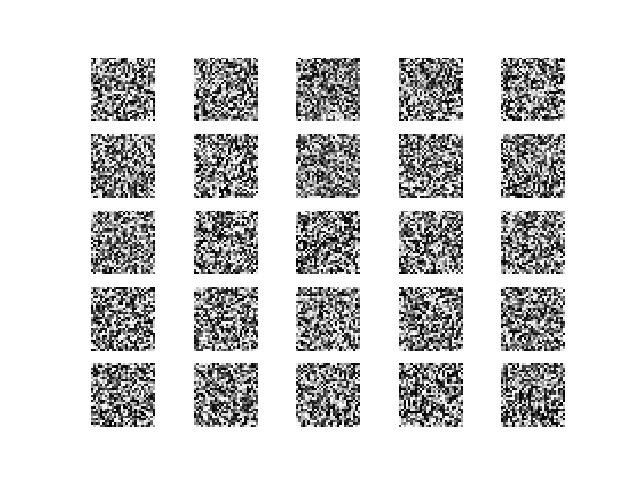

In [22]:
from IPython.display import Image

Image("Images/Q2/0.png")

Primeira iteração. Imagens com distribuição de pixels sem padrão definido ainda

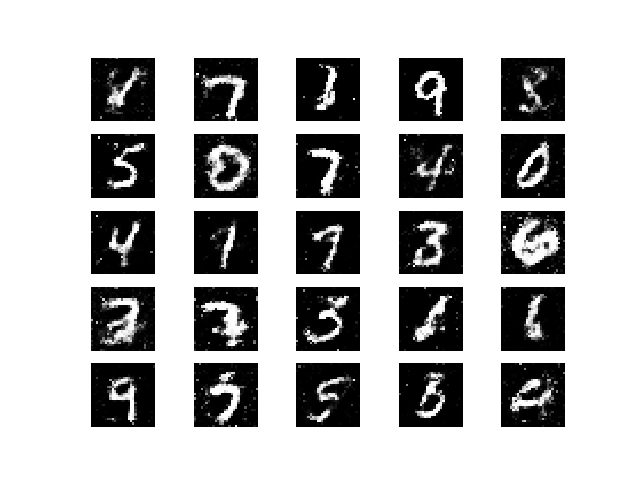

In [21]:
Image("Images/Q2/11400.png")

Iteração nº 11400. Imagens com distribuição de pixels mais próximas de digitos manuscritos

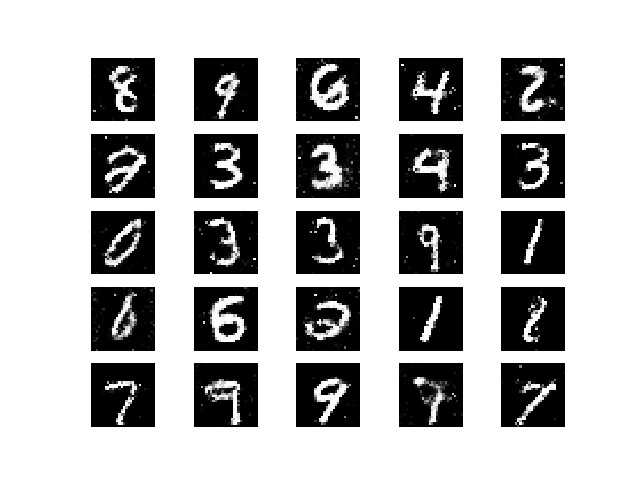

In [19]:
Image("Images/Q2/29800.png")

Iteração nº 29800. Imagens com distribuição de pixels muito proximas de digitos manuscritos reais

Dos resultados das sequencias treinadas acima, podemos observar a evolução das redes adversárias.

Na primeira iteração, foi gerada imagens sem nenhuma distribuição característica dos digitos (aleatórias).
Já na iteração 11400, temos um avanço em alguns dos números gerados, mas ainda temos imagens em que não se assemelham tanto à um digito, como é o elemento na posição (5,2), ou na posição (8,1)

Por fim, na ultima iteração (29800), temos digitos muito próximos dos reconheciveis, mas ainda assim, temos alguns dígitos que geram certa ambiguidade, ou são difíceis de  serem identificados, como é o caso do elemento na posição (4,1)

## Questão 3 - Auto-Encoders

Para terminar o elenco de atividades com MNIST, iremos ver como se comportam auto-encoders, com o uso do seguinte código pronto:

Using TensorFlow backend.
W0628 09:54:30.789106 139855866316608 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 09:54:32.001021 139855866316608 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 09:54:32.280721 139855866316608 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/ipykernel_launcher.py:74: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tenso

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


/home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/ipykernel_launcher.py:80: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/ipykernel_launcher.py:90: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


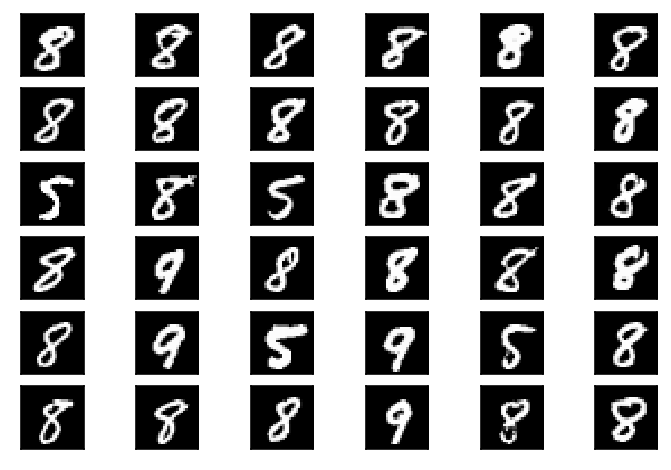

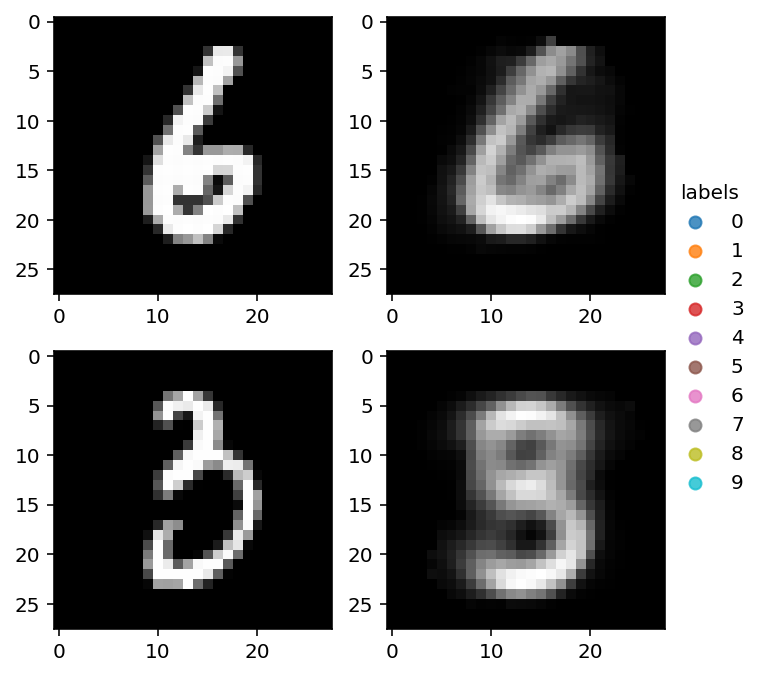

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Input
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical

%config InlineBackend.figure_format = 'retina'
train = pd.read_csv("../input/train.csv")

X_train = train.iloc[:,1:].values
X_train = X_train.reshape(X_train.shape[0], 28, 28) #reshape to rectangular
X_train = X_train/255 #pixel values are 0 - 255 - this makes puts them in the range 0 - 1

y_train = train["label"].values

#define a function that allows us to see the digits:
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")
    
img = X_train[10]
show(img)

pd.DataFrame(img)

#generating a random 28 by 28 image:
rand_img = np.random.randint(0, 255, (28, 28))
rand_img = rand_img/255.0

show(rand_img)

rand_direction = np.random.rand(28, 28) 

for i in range(16):
    plt.subplot(4,4,i+1)
    show(img + i/4*rand_direction)    
    plt.xticks([])
    plt.yticks([])
    
X_flat = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

knn = NearestNeighbors(5000)

knn.fit(X_flat[:5000])

distances, neighbors = knn.kneighbors(img.flatten().reshape(1, -1))
neighbors = neighbors[0]
distances = distances[0]

plt.hist(distances[1:])

for digit_num, num in enumerate(neighbors[:36]):
    plt.subplot(6,6,digit_num+1)
    grid_data = X_train[num]  # reshape from 1d to 2d pixel array
    show(grid_data)
    plt.xticks([])
    plt.yticks([])
    
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)

encoded = Dense(2)(encoded) #keep it linear here.

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(784, activation = 'sigmoid')(decoded)

autoencoder = Model(input=input_img, output=decoded)

autoencoder.compile(optimizer = "adam", loss = "mse")
autoencoder.fit(X_flat, X_flat, batch_size = 128,
                nb_epoch = 10, verbose = 3)

encoder = Model(input = input_img, output = encoded)

#building the decoder:
encoded_input = Input(shape=(2,))
encoded_layer_1 = autoencoder.layers[-2]
encoded_layer_2 = autoencoder.layers[-1]


decoder = encoded_layer_1(encoded_input)
decoder = encoded_layer_2(decoder)
decoder = Model(input=encoded_input, output=decoder)


import seaborn as sns

X_proj = encoder.predict(X_flat[:10000])
X_proj.shape

proj = pd.DataFrame(X_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_train[:10000]
sns.lmplot("comp_1", "comp_2",hue = "labels", data = proj, fit_reg=False)


#how well does the autoencoder decode:w1
plt.subplot(2,2,1)
show(X_train[160])
plt.subplot(2,2,2)
show(autoencoder.predict(np.expand_dims(X_train[160].flatten(), 0)).reshape(28, 28))
plt.subplot(2,2,3)
show(X_train[150])
plt.subplot(2,2,4)
show(autoencoder.predict(np.expand_dims(X_train[150].flatten(), 0)).reshape(28, 28))

Do código original, iremos mudar a impressão do espaço de variáveis latentes, simultanemanete no eixo x e no eixo y. Além disso, os limites percorridos também foram alterados para observar melhor as variações das imagens.

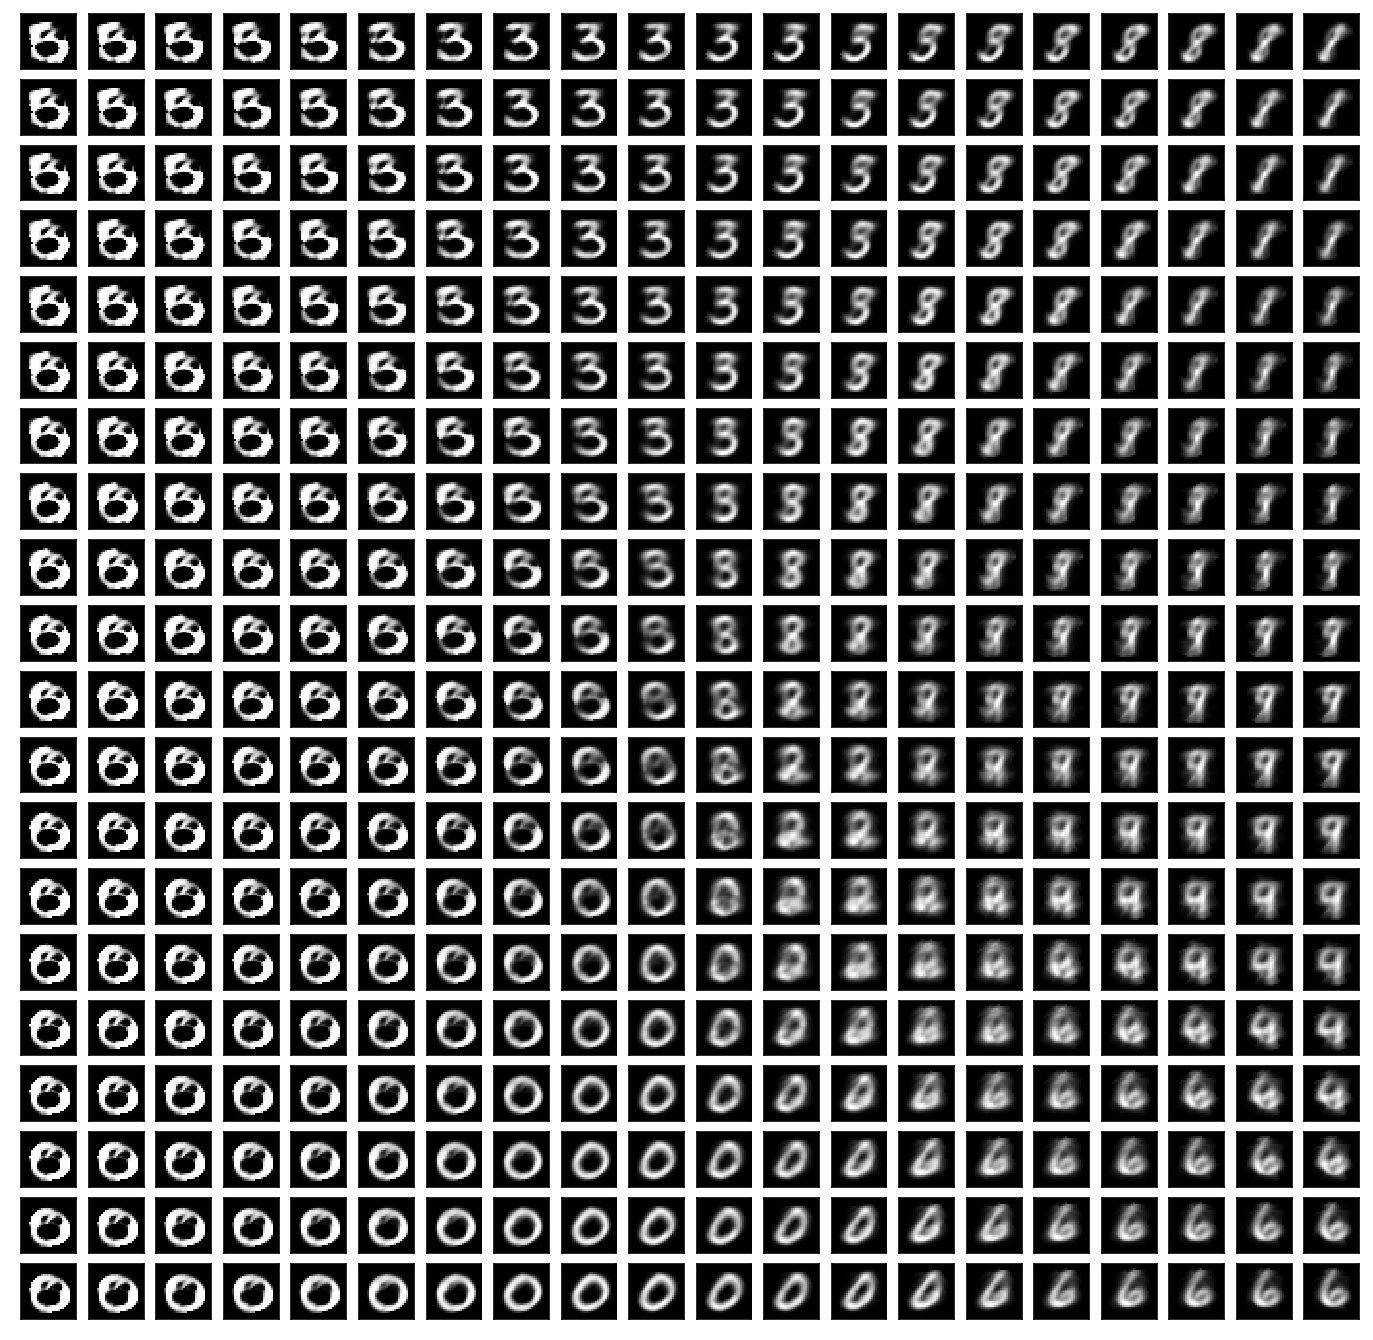

In [18]:
plt.figure(figsize=(12,12))

for i in range(-10,10):
    for j in range(-10,10):
        plt.subplot(20,20, (20*(i+10)) + j + 11)
        pt = np.array([[i,j]])
        show(decoder.predict(pt).reshape((28, 28)))
        plt.xticks([])
        plt.yticks([])

Das variáveis latentes acima, podemos ver a distribuição das características aprendidas pelo autoencoder.

Ao variar as variáveis em x e y em um grid 2D, podemos ver a disposição espacial dos dígitos. Digitos próximos compreendem características semelhantes, como por exemplo o digito 6 do digito 0 e o digito 3 do digito 8.

Uma coisa interessante de se notar, é a transição das características em um mesmo dígito. No exemplo acima, vemos como o digito 8 pode ter características próximas aos digitos 3, 5 e 9, dependendo de como é escrito.

Outra coisa que pode ser observada são os valores mais a esquerda do grid. As imagens geradas não necessariamente compreendem um digito como conhecemos. Mas é possível notar uma mescla entre as características dos digitos 0 e 3.

## Questão 4

Agora iremos exercitar um pouco com PLM. No caso, iremos utilizar a biblioteca textgenrnn para sítese de textos.

In [1]:
from textgenrnn import textgenrnn
import numpy as np

textgen = textgenrnn()

for i in np.arange(0,1.1,0.2):
    print(i)
    textgen.generate(temperature=i)

Using TensorFlow backend.
W0628 07:17:55.953140 140377290860352 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 07:17:55.956763 140377290860352 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 07:17:56.000487 140377290860352 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0628 07:17:56.001460 140377290860352 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_ba

0.0
[Specific] Can someone please remove the state of the state of the state of the state of the state of the state of the state of the state of the state of the state of the state of the state of the state of the state of the state of the state of the state of the state of the state of the state of th

0.2
I was a little big company to see this in the same time to see the game of the results of the state of the same students of the state of the state of the same side of the main story of the state of the state of the state of the state of the park card should be a company to the best friend and I was

0.4
The source of the last time in the streets and he was a month of the same about the community is too hand on the new post to change this song at the story of the moon that was committed to enter the store in a computer in the world, I did an experience of company to be like this after a bit about t

0.6000000000000001
How did this time I please team to put a sense of a color of my fa

Ao se aumentar o parâmetro "temperature", vemos que a síntese da rede diminui de tamanho. Este parâmetro, parece estar relacionado com o tamanho da sumarização feita pela rede. Com parâmetros de "temperature" maiores, a rede deve ser capaz de condensar mais conteudo em um menor espaço de saída. Isso faz com que a rede tenha que ser cada vez "mais criativa" com o resultado da sua síntese do texto para sumarizar em um número menor de palavras.

#### Treinamento da rede
Agora, iremos treinar uma rede para síntese de textos em português.

Após diversas tentativas frustadas de treinamento com 20 épocas, por limitações computacionais, a rede foi treinada apenas com 5 épocas. A biblioteca textgenrnn parece possuir algum tipo de _memory leak_, o que dificulta a execução de treinamentos longos em hardwares mais fracos.

In [1]:
from textgenrnn import textgenrnn

textgen = textgenrnn()

file_path = "brazcubas.txt"
textgen.reset()
textgen.train_from_file(file_path, new_model=True, num_epochs=5,
 gen_epochs=10, word_level=True)
textgen.generate(interactive=True, top_n=5)
textgen.save('brazcubas.hdf5')

Using TensorFlow backend.
W0628 08:58:06.319110 140118896871232 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 08:58:06.327064 140118896871232 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 08:58:06.392864 140118896871232 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0628 08:58:06.393371 140118896871232 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_ba

8,771 texts collected.
Training new model w/ 2-layer, 128-cell LSTMs


W0628 08:58:11.533154 140118896871232 deprecation.py:323] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Training on 92,940 word sequences.
Epoch 1/5
726/726 [==============================] - 198s 273ms/step - loss: 6.1706
Epoch 2/5
726/726 [==============================] - 190s 262ms/step - loss: 5.2926
Epoch 3/5
726/726 [==============================] - 190s 262ms/step - loss: 4.6635
Epoch 4/5
726/726 [==============================] - 190s 262ms/step - loss: 4.1768
Epoch 5/5
726/726 [==============================] - 191s 263ms/step - loss: 3.7318
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: <s>
	2: -
	3: e
	4: a
	5: capitulo

Progress: 

Your choice?
> 5
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: cxxxii
	2: lxxiv
	3: xliv
	4: cxlix
	5: anterior

Progress:  capitulo

Your choice?
> 3
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: <s>
	2: .
	3: ,
	4: de
	5: a

Progress:  capitulo xliv

Your choice?
> 5
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: cabeça
	2: vida
	3: <s>
	4: barretina
	5: carta

Pr

> x
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: <s>
	2: tomas
	3: apezar
	4: não
	5: levou

Progress:  capitulo xliv a carta do quincas borba . eu mesmo estava tão vexado e

Your choice?
> 2
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: ,
	2: <s>
	3: .
	4: ;
	5: de

Progress:  capitulo xliv a carta do quincas borba . eu mesmo estava tão vexado e tomas

Your choice?
> x
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: <s>
	2: tomas
	3: apezar
	4: não
	5: levou

Progress:  capitulo xliv a carta do quincas borba . eu mesmo estava tão vexado e

Your choice?
> x
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: ,
	2: ;
	3: e
	4: <s>
	5: de

Progress:  capitulo xliv a carta do quincas borba . eu mesmo estava tão vexado

Your choice?
> x
Controls:
	s: stop.	x: backspace.	o: write your own.

Options:
	1: digno
	2: vexado
	3: demorada
	4: propicios
	5: parecia

Progress:  capitulo xliv a carta do quincas borba . eu m

KeyboardInterrupt: 

A rede acima foi treinada com base no livro de machado de assis: Memórias Póstumas de Brás cubas.

Apesar do pouco tempo computacional utilizado para o treino (5 épocas), pelo modo interativo, foi possível gerar frases interpretáveis por um ser humano.

A frase gerada como teste foi a seguinte:

"capitulo xliv a carta do quincas borba . eu mesmo estava tão digno de outro tempo $<s>$"

Durante as opções do modo interativo, foi possivel observar que as opções nem sempre eram totalmente cooerentes, como o frequente oferecimento de pontuação $(, ; .)$, ou artigos desconexos em sequência, como "a" e "o". Apesar disso, ainda foi possivel construir uma frase compreensível.

Caso o treinamento fosse feito sobre épocas maiores, muito possivelmente as opções oferecidas pelo modo interativo seriam mais cooerentes com o português real mas, de maneira geral, a rede consegue de forma muito competente, sintetizar os padrões da linguágem humana.

## Questão 5 - Reinforcement Learning

Por fim, a ultima rede a ser treinada, é uma rede de aprendizado por reforço.

O problema a ser resolvido é o de equilibrar um pêndulo invertido em cima de um carro com 1 grau de liberdade.

Todas os códigos a seguir utilizam a biblioteca _keras-rl_ para implementação do problema do car pole.

Para ser justo quanto ao desempenho de todas as implementações, durante o treino, optou-se por manter o mesmo tempo computacional para os diferentes modelos (em todos, foi utilizado: nb_steps=50000).

#### Cross Entropy
A primeira implementação utiliza uma rede por entropia cruzada e, no caso deste exercício, por questões de tempo, foi-se utilizado apenas a rede densa simples.

In [ ]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.cem import CEMAgent
from rl.memory import EpisodeParameterMemory

ENV_NAME = 'CartPole-v0'


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)

nb_actions = env.action_space.n
obs_dim = env.observation_space.shape[0]

# Option 1 : Simple model
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(nb_actions))
model.add(Activation('softmax'))

# Option 2: deep network
# model = Sequential()
# model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
# model.add(Dense(16))
# model.add(Activation('relu'))
# model.add(Dense(16))
# model.add(Activation('relu'))
# model.add(Dense(16))
# model.add(Activation('relu'))
# model.add(Dense(nb_actions))
# model.add(Activation('softmax'))


print(model.summary())


# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = EpisodeParameterMemory(limit=1000, window_length=1)

cem = CEMAgent(model=model, nb_actions=nb_actions, memory=memory,
               batch_size=50, nb_steps_warmup=2000, train_interval=50, elite_frac=0.05)
cem.compile()

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
cem.fit(env, nb_steps=100000, visualize=True, verbose=2)

# After training is done, we save the best weights.
cem.save_weights('cem_{}_params.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
cem.test(env, nb_episodes=5, visualize=True)


Using TensorFlow backend.
W0701 00:29:53.275794 139744728581952 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 00:29:53.386218 139744728581952 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 00:29:53.468849 139744728581952 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 00:29:53.502411 139744728581952 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/backend/tensorflow_backend

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


W0701 00:29:54.392365 139744728581952 deprecation_wrapper.py:119] From /home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Training for 100000 steps ...
    13/100000: episode: 1, duration: 1.398s, episode steps: 13, steps per second: 9, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.538 [0.000, 1.000], mean observation: -0.107 [-1.319, 0.772], mean_best_reward: --
    24/100000: episode: 2, duration: 0.166s, episode steps: 11, steps per second: 66, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.273 [0.000, 1.000], mean observation: 0.151 [-0.941, 1.832], mean_best_reward: --
    37/100000: episode: 3, duration: 0.220s, episode steps: 13, steps per second: 59, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.231 [0.000, 1.000], mean observation: 0.134 [-1.324, 2.292], mean_best_reward: --
    51/100000: episode: 4, duration: 0.230s, episode steps: 14, steps per second: 61, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.286 [0.000, 1.000], mean observation: 0.098 [-1.204, 2.050], mean_best_reward: --
  

   652/100000: episode: 35, duration: 1.449s, episode steps: 87, steps per second: 60, episode reward: 87.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.494 [0.000, 1.000], mean observation: -0.164 [-1.532, 1.254], mean_best_reward: --
   672/100000: episode: 36, duration: 0.330s, episode steps: 20, steps per second: 61, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.350 [0.000, 1.000], mean observation: 0.053 [-1.201, 1.977], mean_best_reward: --
   716/100000: episode: 37, duration: 0.732s, episode steps: 44, steps per second: 60, episode reward: 44.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.568 [0.000, 1.000], mean observation: -0.055 [-2.395, 1.395], mean_best_reward: --
   728/100000: episode: 38, duration: 0.200s, episode steps: 12, steps per second: 60, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.333 [0.000, 1.000], mean observation: 0.107 [-0.774, 1.524], mean_best_reward: --
   742/100000: episode: 39

  1532/100000: episode: 69, duration: 0.315s, episode steps: 19, steps per second: 60, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.421 [0.000, 1.000], mean observation: 0.069 [-0.780, 1.464], mean_best_reward: --
  1541/100000: episode: 70, duration: 0.148s, episode steps: 9, steps per second: 61, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.778 [0.000, 1.000], mean observation: -0.119 [-2.130, 1.384], mean_best_reward: --
  1568/100000: episode: 71, duration: 0.450s, episode steps: 27, steps per second: 60, episode reward: 27.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.593 [0.000, 1.000], mean observation: -0.008 [-1.488, 0.931], mean_best_reward: --
  1577/100000: episode: 72, duration: 0.149s, episode steps: 9, steps per second: 60, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.222 [0.000, 1.000], mean observation: 0.154 [-1.148, 1.991], mean_best_reward: --
  1591/100000: episode: 73, du

  2189/100000: episode: 103, duration: 0.449s, episode steps: 27, steps per second: 60, episode reward: 27.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.630 [0.000, 1.000], mean observation: -0.070 [-2.537, 1.393], mean_best_reward: --
  2214/100000: episode: 104, duration: 0.415s, episode steps: 25, steps per second: 60, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.520 [0.000, 1.000], mean observation: 0.082 [-0.509, 0.903], mean_best_reward: --
  2232/100000: episode: 105, duration: 0.300s, episode steps: 18, steps per second: 60, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.611 [0.000, 1.000], mean observation: -0.082 [-1.635, 0.965], mean_best_reward: --
  2258/100000: episode: 106, duration: 0.431s, episode steps: 26, steps per second: 60, episode reward: 26.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.577 [0.000, 1.000], mean observation: -0.058 [-1.835, 1.167], mean_best_reward: --
  2295/100000: episod

  3075/100000: episode: 137, duration: 0.350s, episode steps: 21, steps per second: 60, episode reward: 21.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.524 [0.000, 1.000], mean observation: -0.107 [-1.444, 0.613], mean_best_reward: --
  3142/100000: episode: 138, duration: 1.114s, episode steps: 67, steps per second: 60, episode reward: 67.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.507 [0.000, 1.000], mean observation: -0.036 [-1.171, 0.874], mean_best_reward: --
  3166/100000: episode: 139, duration: 0.398s, episode steps: 24, steps per second: 60, episode reward: 24.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.094 [-0.631, 0.998], mean_best_reward: --
  3213/100000: episode: 140, duration: 0.782s, episode steps: 47, steps per second: 60, episode reward: 47.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.489 [0.000, 1.000], mean observation: 0.040 [-0.775, 1.391], mean_best_reward: --
  3228/100000: episode

  4018/100000: episode: 171, duration: 0.465s, episode steps: 28, steps per second: 60, episode reward: 28.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.429 [0.000, 1.000], mean observation: 0.063 [-0.842, 1.743], mean_best_reward: --
  4046/100000: episode: 172, duration: 0.466s, episode steps: 28, steps per second: 60, episode reward: 28.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.122 [-0.364, 1.100], mean_best_reward: --
  4108/100000: episode: 173, duration: 1.031s, episode steps: 62, steps per second: 60, episode reward: 62.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.484 [0.000, 1.000], mean observation: -0.115 [-0.938, 0.818], mean_best_reward: --
  4120/100000: episode: 174, duration: 0.200s, episode steps: 12, steps per second: 60, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.417 [0.000, 1.000], mean observation: 0.084 [-0.835, 1.254], mean_best_reward: --
  4138/100000: episode:

  5071/100000: episode: 205, duration: 0.348s, episode steps: 21, steps per second: 60, episode reward: 21.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.476 [0.000, 1.000], mean observation: 0.079 [-1.003, 1.585], mean_best_reward: --
  5117/100000: episode: 206, duration: 0.765s, episode steps: 46, steps per second: 60, episode reward: 46.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.172 [-0.839, 1.361], mean_best_reward: --
  5147/100000: episode: 207, duration: 0.499s, episode steps: 30, steps per second: 60, episode reward: 30.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.467 [0.000, 1.000], mean observation: -0.048 [-1.254, 0.763], mean_best_reward: --
  5163/100000: episode: 208, duration: 0.266s, episode steps: 16, steps per second: 60, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.438 [0.000, 1.000], mean observation: 0.089 [-0.794, 1.357], mean_best_reward: --
  5210/100000: episode:

  6094/100000: episode: 239, duration: 0.565s, episode steps: 34, steps per second: 60, episode reward: 34.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.441 [0.000, 1.000], mean observation: 0.090 [-0.847, 1.969], mean_best_reward: --
  6156/100000: episode: 240, duration: 1.033s, episode steps: 62, steps per second: 60, episode reward: 62.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.532 [0.000, 1.000], mean observation: -0.079 [-1.972, 1.365], mean_best_reward: --
  6196/100000: episode: 241, duration: 0.666s, episode steps: 40, steps per second: 60, episode reward: 40.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.103 [-0.593, 1.091], mean_best_reward: --
  6221/100000: episode: 242, duration: 0.416s, episode steps: 25, steps per second: 60, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.480 [0.000, 1.000], mean observation: 0.056 [-0.829, 1.357], mean_best_reward: --
  6258/100000: episode:

  6947/100000: episode: 273, duration: 0.481s, episode steps: 29, steps per second: 60, episode reward: 29.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.483 [0.000, 1.000], mean observation: 0.096 [-0.626, 1.228], mean_best_reward: --
  7010/100000: episode: 274, duration: 1.049s, episode steps: 63, steps per second: 60, episode reward: 63.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.492 [0.000, 1.000], mean observation: 0.056 [-0.999, 1.559], mean_best_reward: --
  7038/100000: episode: 275, duration: 0.465s, episode steps: 28, steps per second: 60, episode reward: 28.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.464 [0.000, 1.000], mean observation: 0.126 [-0.567, 1.434], mean_best_reward: --
  7050/100000: episode: 276, duration: 0.198s, episode steps: 12, steps per second: 61, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.750 [0.000, 1.000], mean observation: -0.108 [-2.129, 1.333], mean_best_reward: --
  7124/100000: episode:

  7894/100000: episode: 307, duration: 0.514s, episode steps: 31, steps per second: 60, episode reward: 31.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.484 [0.000, 1.000], mean observation: 0.081 [-0.740, 1.339], mean_best_reward: --
  7938/100000: episode: 308, duration: 0.732s, episode steps: 44, steps per second: 60, episode reward: 44.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.455 [0.000, 1.000], mean observation: -0.069 [-1.364, 1.619], mean_best_reward: --
  7964/100000: episode: 309, duration: 0.431s, episode steps: 26, steps per second: 60, episode reward: 26.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.385 [0.000, 1.000], mean observation: 0.076 [-1.151, 2.051], mean_best_reward: --
  7975/100000: episode: 310, duration: 0.181s, episode steps: 11, steps per second: 61, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.727 [0.000, 1.000], mean observation: -0.119 [-1.964, 1.168], mean_best_reward: --
  7990/100000: episode

  8882/100000: episode: 341, duration: 0.449s, episode steps: 27, steps per second: 60, episode reward: 27.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.444 [0.000, 1.000], mean observation: 0.099 [-0.610, 1.683], mean_best_reward: --
  8906/100000: episode: 342, duration: 0.398s, episode steps: 24, steps per second: 60, episode reward: 24.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.333 [0.000, 1.000], mean observation: 0.061 [-1.586, 2.649], mean_best_reward: --
  8948/100000: episode: 343, duration: 0.698s, episode steps: 42, steps per second: 60, episode reward: 42.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.476 [0.000, 1.000], mean observation: -0.139 [-1.231, 0.375], mean_best_reward: --
  8959/100000: episode: 344, duration: 0.182s, episode steps: 11, steps per second: 61, episode reward: 11.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.182 [0.000, 1.000], mean observation: 0.118 [-1.410, 2.258], mean_best_reward: --
  9028/100000: episode:

Para esta rede, o desempenho nos testes de 5 episódios foram:

Episode 1: reward: 145.000, steps: 145 <br>
Episode 2: reward: 116.000, steps: 116<br>
Episode 3: reward: 132.000, steps: 132<br>
Episode 4: reward: 102.000, steps: 102<br>
Episode 5: reward: 111.000, steps: 111<br>

#### Deep Q Learning
Para o próximo modelo, agora utilizamos o método de _Deep Q Learning_ para o treino. Novamente, manteve-se o mesmo tempo computacional de treino do caso anterior.

In [11]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory


ENV_NAME = 'CartPole-v0'


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
dqn.fit(env, nb_steps=50000, visualize=True, verbose=2)

# After training is done, we save the final weights.
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=5, visualize=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
__________

/home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    31/50000: episode: 1, duration: 12.356s, episode steps: 31, steps per second: 3, episode reward: 31.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.419 [0.000, 1.000], mean observation: 0.013 [-1.185, 1.776], loss: 0.462303, mean_absolute_error: 0.519571, mean_q: 0.093494


/home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    44/50000: episode: 2, duration: 0.249s, episode steps: 13, steps per second: 52, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.692 [0.000, 1.000], mean observation: -0.069 [-1.867, 1.224], loss: 0.351199, mean_absolute_error: 0.541282, mean_q: 0.289784
    64/50000: episode: 3, duration: 0.312s, episode steps: 20, steps per second: 64, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.550 [0.000, 1.000], mean observation: -0.070 [-1.375, 0.833], loss: 0.225481, mean_absolute_error: 0.556149, mean_q: 0.502859
    83/50000: episode: 4, duration: 0.333s, episode steps: 19, steps per second: 57, episode reward: 19.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.421 [0.000, 1.000], mean observation: 0.074 [-0.817, 1.505], loss: 0.117994, mean_absolute_error: 0.602590, mean_q: 0.818238
    98/50000: episode: 5, duration: 0.223s, episode steps: 15, steps per second: 67, episode reward: 15.000, mean reward: 1.000 [1.000, 1.000], me

   566/50000: episode: 31, duration: 0.215s, episode steps: 13, steps per second: 61, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.385 [0.000, 1.000], mean observation: 0.087 [-1.012, 1.584], loss: 0.207040, mean_absolute_error: 2.543007, mean_q: 4.925609
   596/50000: episode: 32, duration: 0.483s, episode steps: 30, steps per second: 62, episode reward: 30.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.084 [-0.895, 0.540], loss: 0.223466, mean_absolute_error: 2.659974, mean_q: 5.065597
   624/50000: episode: 33, duration: 0.495s, episode steps: 28, steps per second: 57, episode reward: 28.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.429 [0.000, 1.000], mean observation: 0.081 [-0.971, 1.887], loss: 0.226204, mean_absolute_error: 2.761364, mean_q: 5.252551
   672/50000: episode: 34, duration: 0.771s, episode steps: 48, steps per second: 62, episode reward: 48.000, mean reward: 1.000 [1.000, 1.000],

  1703/50000: episode: 60, duration: 2.071s, episode steps: 124, steps per second: 60, episode reward: 124.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.476 [0.000, 1.000], mean observation: -0.206 [-1.317, 0.931], loss: 0.445798, mean_absolute_error: 6.710086, mean_q: 13.645705
  1864/50000: episode: 61, duration: 2.711s, episode steps: 161, steps per second: 59, episode reward: 161.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.472 [0.000, 1.000], mean observation: -0.276 [-2.215, 1.061], loss: 0.536703, mean_absolute_error: 7.359390, mean_q: 14.986125
  2000/50000: episode: 62, duration: 2.269s, episode steps: 136, steps per second: 60, episode reward: 136.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.471 [0.000, 1.000], mean observation: -0.253 [-1.848, 1.172], loss: 0.531293, mean_absolute_error: 7.990211, mean_q: 16.346107
  2151/50000: episode: 63, duration: 2.516s, episode steps: 151, steps per second: 60, episode reward: 151.000, mean reward: 1.000 [1

  6383/50000: episode: 89, duration: 3.072s, episode steps: 185, steps per second: 60, episode reward: 185.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.470 [0.000, 1.000], mean observation: -0.329 [-2.599, 0.791], loss: 2.740908, mean_absolute_error: 25.038603, mean_q: 50.833336
  6540/50000: episode: 90, duration: 2.658s, episode steps: 157, steps per second: 59, episode reward: 157.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.452 [0.000, 1.000], mean observation: -0.391 [-2.709, 0.630], loss: 2.621372, mean_absolute_error: 25.655714, mean_q: 52.151066
  6697/50000: episode: 91, duration: 2.590s, episode steps: 157, steps per second: 61, episode reward: 157.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.471 [0.000, 1.000], mean observation: -0.386 [-2.333, 0.580], loss: 2.428360, mean_absolute_error: 26.122189, mean_q: 53.057220
  6884/50000: episode: 92, duration: 3.137s, episode steps: 187, steps per second: 60, episode reward: 187.000, mean reward: 1.000

 11162/50000: episode: 118, duration: 2.581s, episode steps: 153, steps per second: 59, episode reward: 153.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.464 [0.000, 1.000], mean observation: -0.403 [-2.597, 0.971], loss: 2.723121, mean_absolute_error: 33.499153, mean_q: 67.720253
 11307/50000: episode: 119, duration: 2.416s, episode steps: 145, steps per second: 60, episode reward: 145.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.448 [0.000, 1.000], mean observation: -0.419 [-2.741, 0.830], loss: 2.477210, mean_absolute_error: 33.665981, mean_q: 68.007233
 11453/50000: episode: 120, duration: 2.429s, episode steps: 146, steps per second: 60, episode reward: 146.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.459 [0.000, 1.000], mean observation: -0.427 [-2.435, 0.662], loss: 1.940371, mean_absolute_error: 33.928402, mean_q: 68.579369
 11609/50000: episode: 121, duration: 2.634s, episode steps: 156, steps per second: 59, episode reward: 156.000, mean reward: 1

 16286/50000: episode: 147, duration: 3.293s, episode steps: 198, steps per second: 60, episode reward: 198.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.470 [0.000, 1.000], mean observation: -0.309 [-2.423, 0.873], loss: 1.780313, mean_absolute_error: 35.762714, mean_q: 72.147789
 16486/50000: episode: 148, duration: 3.354s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.510 [0.000, 1.000], mean observation: 0.063 [-1.455, 1.342], loss: 3.035098, mean_absolute_error: 35.819374, mean_q: 72.138092
 16672/50000: episode: 149, duration: 3.097s, episode steps: 186, steps per second: 60, episode reward: 186.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.473 [0.000, 1.000], mean observation: -0.338 [-2.429, 1.121], loss: 1.258153, mean_absolute_error: 36.071091, mean_q: 72.846565
 16856/50000: episode: 150, duration: 3.066s, episode steps: 184, steps per second: 60, episode reward: 184.000, mean reward: 1.

 20884/50000: episode: 176, duration: 2.729s, episode steps: 165, steps per second: 60, episode reward: 165.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.461 [0.000, 1.000], mean observation: -0.373 [-2.429, 1.050], loss: 5.604077, mean_absolute_error: 38.794624, mean_q: 78.062141
 21084/50000: episode: 177, duration: 3.325s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.470 [0.000, 1.000], mean observation: -0.299 [-2.365, 1.250], loss: 8.613079, mean_absolute_error: 38.370815, mean_q: 77.138214
 21284/50000: episode: 178, duration: 3.333s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.052 [-1.334, 1.163], loss: 11.027148, mean_absolute_error: 38.853737, mean_q: 78.148293
 21433/50000: episode: 179, duration: 2.479s, episode steps: 149, steps per second: 60, episode reward: 149.000, mean reward: 

 26419/50000: episode: 205, duration: 3.348s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.520 [0.000, 1.000], mean observation: 0.278 [-1.405, 2.041], loss: 5.916073, mean_absolute_error: 41.049824, mean_q: 82.662636
 26575/50000: episode: 206, duration: 2.589s, episode steps: 156, steps per second: 60, episode reward: 156.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.513 [0.000, 1.000], mean observation: 0.309 [-1.366, 1.922], loss: 2.989062, mean_absolute_error: 41.359772, mean_q: 83.374687
 26774/50000: episode: 207, duration: 3.327s, episode steps: 199, steps per second: 60, episode reward: 199.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.513 [0.000, 1.000], mean observation: 0.311 [-1.598, 2.052], loss: 6.411020, mean_absolute_error: 41.319805, mean_q: 82.964424
 26974/50000: episode: 208, duration: 3.367s, episode steps: 200, steps per second: 59, episode reward: 200.000, mean reward: 1.00

 31842/50000: episode: 234, duration: 2.861s, episode steps: 170, steps per second: 59, episode reward: 170.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.524 [0.000, 1.000], mean observation: 0.436 [-1.584, 2.404], loss: 4.720729, mean_absolute_error: 39.836700, mean_q: 80.265709
 32033/50000: episode: 235, duration: 3.205s, episode steps: 191, steps per second: 60, episode reward: 191.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.524 [0.000, 1.000], mean observation: 0.418 [-1.175, 2.424], loss: 8.337022, mean_absolute_error: 39.660469, mean_q: 79.777275
 32207/50000: episode: 236, duration: 2.920s, episode steps: 174, steps per second: 60, episode reward: 174.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.523 [0.000, 1.000], mean observation: 0.419 [-1.244, 2.405], loss: 4.826613, mean_absolute_error: 39.554104, mean_q: 79.670700
 32371/50000: episode: 237, duration: 2.703s, episode steps: 164, steps per second: 61, episode reward: 164.000, mean reward: 1.00

 37159/50000: episode: 263, duration: 3.133s, episode steps: 188, steps per second: 60, episode reward: 188.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.521 [0.000, 1.000], mean observation: 0.406 [-1.401, 2.410], loss: 2.843643, mean_absolute_error: 39.067249, mean_q: 78.652122
 37359/50000: episode: 264, duration: 3.362s, episode steps: 200, steps per second: 59, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.279 [-1.117, 1.572], loss: 2.627230, mean_absolute_error: 38.652809, mean_q: 77.811424
 37559/50000: episode: 265, duration: 3.303s, episode steps: 200, steps per second: 61, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.061 [-1.250, 1.281], loss: 2.806130, mean_absolute_error: 38.757355, mean_q: 78.014717
 37759/50000: episode: 266, duration: 3.332s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.00

 42959/50000: episode: 292, duration: 3.343s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.004 [-1.653, 1.591], loss: 7.542128, mean_absolute_error: 42.644230, mean_q: 85.944748
 43159/50000: episode: 293, duration: 3.317s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.001 [-1.312, 1.581], loss: 9.179642, mean_absolute_error: 42.834511, mean_q: 86.141090
 43359/50000: episode: 294, duration: 3.398s, episode steps: 200, steps per second: 59, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: 0.001 [-1.410, 1.596], loss: 9.280277, mean_absolute_error: 43.163563, mean_q: 86.778358
 43559/50000: episode: 295, duration: 3.343s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.00

 48759/50000: episode: 321, duration: 3.331s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.480 [0.000, 1.000], mean observation: -0.016 [-1.950, 1.767], loss: 9.345488, mean_absolute_error: 42.628437, mean_q: 85.446152
 48959/50000: episode: 322, duration: 3.332s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: -0.006 [-1.675, 1.700], loss: 10.450945, mean_absolute_error: 42.770153, mean_q: 85.733749
 49159/50000: episode: 323, duration: 3.365s, episode steps: 200, steps per second: 59, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.485 [0.000, 1.000], mean observation: -0.002 [-1.740, 1.549], loss: 7.680966, mean_absolute_error: 42.600155, mean_q: 85.464920
 49359/50000: episode: 324, duration: 3.349s, episode steps: 200, steps per second: 60, episode reward: 200.000, mean reward: 

Nesta rede, tivemos o seguinte desempenho:

Episode 1: reward: 200.000, steps: 200 <br>
Episode 2: reward: 200.000, steps: 200<br>
Episode 3: reward: 200.000, steps: 200<br>
Episode 4: reward: 200.000, steps: 200<br>
Episode 5: reward: 200.000, steps: 200<br>

#### Duel DQN

Outra possível implementação para tentar resolver alguns problemas do _Deep Q Learning_ como a sobre-estimação, é o uso da arquitetura do _Duel DQN_:

In [13]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory


ENV_NAME = 'CartPole-v0'


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model regardless of the dueling architecture
# if you enable dueling network in DQN , DQN will build a dueling network base on your model automatically
# Also, you can build a dueling network by yourself and turn off the dueling network in DQN.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions, activation='linear'))
print(model.summary())

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()
# enable the dueling network
# you can specify the dueling_type to one of {'avg','max','naive'}
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               enable_dueling_network=True, dueling_type='avg', target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)

# After training is done, we save the final weights.
dqn.save_weights('duel_dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=5, visualize=False)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_7 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_8 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_9 (Activation)    (None, 16)                0         
__________

/home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/home/nagata/anaconda3/envs/tensor_flow/lib/python3.7/site-packages/rl/memory.py:39: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to

    20/50000: episode: 1, duration: 11.881s, episode steps: 20, steps per second: 2, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.400 [0.000, 1.000], mean observation: 0.059 [-0.998, 1.652], loss: 0.468839, mean_absolute_error: 0.515836, mean_q: -0.061918
    73/50000: episode: 2, duration: 0.326s, episode steps: 53, steps per second: 163, episode reward: 53.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.566 [0.000, 1.000], mean observation: 0.218 [-1.248, 1.743], loss: 0.338509, mean_absolute_error: 0.469109, mean_q: 0.130208
   106/50000: episode: 3, duration: 0.208s, episode steps: 33, steps per second: 158, episode reward: 33.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.515 [0.000, 1.000], mean observation: -0.029 [-1.201, 0.833], loss: 0.130549, mean_absolute_error: 0.511466, mean_q: 0.572261
   116/50000: episode: 4, duration: 0.067s, episode steps: 10, steps per second: 148, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000],

   870/50000: episode: 30, duration: 0.280s, episode steps: 54, steps per second: 193, episode reward: 54.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.097 [-1.209, 1.276], loss: 0.209835, mean_absolute_error: 3.429546, mean_q: 6.711004
   927/50000: episode: 31, duration: 0.309s, episode steps: 57, steps per second: 184, episode reward: 57.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.544 [0.000, 1.000], mean observation: 0.008 [-1.532, 1.310], loss: 0.177561, mean_absolute_error: 3.653187, mean_q: 7.224506
   943/50000: episode: 32, duration: 0.093s, episode steps: 16, steps per second: 172, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.438 [0.000, 1.000], mean observation: 0.065 [-1.024, 1.584], loss: 0.194743, mean_absolute_error: 3.819179, mean_q: 7.559568
   966/50000: episode: 33, duration: 0.173s, episode steps: 23, steps per second: 133, episode reward: 23.000, mean reward: 1.000 [1.000, 1.00

  4664/50000: episode: 59, duration: 1.128s, episode steps: 200, steps per second: 177, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.135 [-0.960, 0.782], loss: 3.811896, mean_absolute_error: 21.509853, mean_q: 43.575123
  4864/50000: episode: 60, duration: 1.071s, episode steps: 200, steps per second: 187, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.480 [0.000, 1.000], mean observation: -0.303 [-2.112, 0.841], loss: 4.527482, mean_absolute_error: 22.280464, mean_q: 45.119503
  5049/50000: episode: 61, duration: 0.946s, episode steps: 185, steps per second: 195, episode reward: 185.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.476 [0.000, 1.000], mean observation: -0.370 [-2.411, 0.852], loss: 3.143274, mean_absolute_error: 23.090193, mean_q: 46.867447
  5249/50000: episode: 62, duration: 0.985s, episode steps: 200, steps per second: 203, episode reward: 200.000, mean reward: 1

 10364/50000: episode: 88, duration: 1.068s, episode steps: 197, steps per second: 184, episode reward: 197.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.472 [0.000, 1.000], mean observation: -0.347 [-2.424, 1.043], loss: 5.808197, mean_absolute_error: 38.180004, mean_q: 76.977135
 10564/50000: episode: 89, duration: 1.065s, episode steps: 200, steps per second: 188, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.485 [0.000, 1.000], mean observation: -0.198 [-1.501, 1.089], loss: 6.817963, mean_absolute_error: 38.384388, mean_q: 77.407700
 10759/50000: episode: 90, duration: 1.015s, episode steps: 195, steps per second: 192, episode reward: 195.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.477 [0.000, 1.000], mean observation: -0.357 [-2.433, 1.027], loss: 7.897039, mean_absolute_error: 38.834728, mean_q: 78.135406
 10946/50000: episode: 91, duration: 0.968s, episode steps: 187, steps per second: 193, episode reward: 187.000, mean reward: 1

 16134/50000: episode: 117, duration: 1.117s, episode steps: 200, steps per second: 179, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.184 [-1.520, 1.596], loss: 9.972193, mean_absolute_error: 45.866199, mean_q: 92.068260
 16334/50000: episode: 118, duration: 1.178s, episode steps: 200, steps per second: 170, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.006 [-0.992, 1.256], loss: 9.280285, mean_absolute_error: 45.704323, mean_q: 91.763748
 16534/50000: episode: 119, duration: 1.102s, episode steps: 200, steps per second: 181, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: -0.096 [-1.145, 1.378], loss: 11.549373, mean_absolute_error: 46.196449, mean_q: 92.705391
 16734/50000: episode: 120, duration: 1.120s, episode steps: 200, steps per second: 179, episode reward: 200.000, mean rewar

 21934/50000: episode: 146, duration: 1.412s, episode steps: 200, steps per second: 142, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.495 [0.000, 1.000], mean observation: -0.027 [-1.317, 1.496], loss: 15.796648, mean_absolute_error: 49.087826, mean_q: 98.413239
 22134/50000: episode: 147, duration: 1.266s, episode steps: 200, steps per second: 158, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.025 [-1.231, 1.457], loss: 13.231281, mean_absolute_error: 49.155869, mean_q: 98.464638
 22334/50000: episode: 148, duration: 1.070s, episode steps: 200, steps per second: 187, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.510 [0.000, 1.000], mean observation: 0.138 [-1.347, 1.342], loss: 17.668943, mean_absolute_error: 49.614281, mean_q: 99.262932
 22534/50000: episode: 149, duration: 1.403s, episode steps: 200, steps per second: 143, episode reward: 200.000, mean rewa

 27426/50000: episode: 175, duration: 0.974s, episode steps: 144, steps per second: 148, episode reward: 144.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.535 [0.000, 1.000], mean observation: 0.438 [-0.715, 2.419], loss: 8.172343, mean_absolute_error: 47.491051, mean_q: 95.099640
 27626/50000: episode: 176, duration: 1.156s, episode steps: 200, steps per second: 173, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.485 [0.000, 1.000], mean observation: -0.018 [-1.544, 1.455], loss: 11.501989, mean_absolute_error: 47.812912, mean_q: 95.626984
 27826/50000: episode: 177, duration: 1.238s, episode steps: 200, steps per second: 162, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.515 [0.000, 1.000], mean observation: 0.152 [-1.136, 1.304], loss: 16.660355, mean_absolute_error: 47.465675, mean_q: 94.791481
 28008/50000: episode: 178, duration: 1.016s, episode steps: 182, steps per second: 179, episode reward: 182.000, mean rewar

 31872/50000: episode: 204, duration: 0.881s, episode steps: 128, steps per second: 145, episode reward: 128.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.539 [0.000, 1.000], mean observation: 0.479 [-0.733, 2.417], loss: 15.283775, mean_absolute_error: 46.471218, mean_q: 92.965790
 32000/50000: episode: 205, duration: 0.849s, episode steps: 128, steps per second: 151, episode reward: 128.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.539 [0.000, 1.000], mean observation: 0.484 [-0.641, 2.435], loss: 11.799675, mean_absolute_error: 46.456711, mean_q: 93.311035
 32122/50000: episode: 206, duration: 0.748s, episode steps: 122, steps per second: 163, episode reward: 122.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.541 [0.000, 1.000], mean observation: 0.497 [-0.762, 2.431], loss: 12.723372, mean_absolute_error: 46.439941, mean_q: 93.463898
 32250/50000: episode: 207, duration: 0.809s, episode steps: 128, steps per second: 158, episode reward: 128.000, mean rewar

 36363/50000: episode: 233, duration: 1.142s, episode steps: 174, steps per second: 152, episode reward: 174.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.529 [0.000, 1.000], mean observation: 0.358 [-0.997, 2.416], loss: 11.733378, mean_absolute_error: 46.067760, mean_q: 92.863609
 36513/50000: episode: 234, duration: 1.047s, episode steps: 150, steps per second: 143, episode reward: 150.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.533 [0.000, 1.000], mean observation: 0.419 [-0.768, 2.406], loss: 9.229089, mean_absolute_error: 46.082451, mean_q: 92.928024
 36679/50000: episode: 235, duration: 1.087s, episode steps: 166, steps per second: 153, episode reward: 166.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.536 [0.000, 1.000], mean observation: 0.379 [-0.949, 2.424], loss: 7.187378, mean_absolute_error: 46.044506, mean_q: 92.969406
 36831/50000: episode: 236, duration: 0.962s, episode steps: 152, steps per second: 158, episode reward: 152.000, mean reward:

 41241/50000: episode: 262, duration: 1.023s, episode steps: 148, steps per second: 145, episode reward: 148.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.541 [0.000, 1.000], mean observation: 0.431 [-0.734, 2.427], loss: 4.582081, mean_absolute_error: 44.291828, mean_q: 89.373718
 41399/50000: episode: 263, duration: 1.061s, episode steps: 158, steps per second: 149, episode reward: 158.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.532 [0.000, 1.000], mean observation: 0.408 [-0.671, 2.431], loss: 10.931398, mean_absolute_error: 44.291424, mean_q: 89.140083
 41566/50000: episode: 264, duration: 1.133s, episode steps: 167, steps per second: 147, episode reward: 167.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.533 [0.000, 1.000], mean observation: 0.388 [-1.215, 2.417], loss: 4.636424, mean_absolute_error: 44.599213, mean_q: 89.891739
 41730/50000: episode: 265, duration: 1.058s, episode steps: 164, steps per second: 155, episode reward: 164.000, mean reward:

 46280/50000: episode: 291, duration: 1.160s, episode steps: 200, steps per second: 172, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.515 [0.000, 1.000], mean observation: 0.176 [-1.110, 1.331], loss: 5.914227, mean_absolute_error: 45.944149, mean_q: 92.627754
 46480/50000: episode: 292, duration: 1.188s, episode steps: 200, steps per second: 168, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.520 [0.000, 1.000], mean observation: 0.261 [-0.835, 1.853], loss: 3.851686, mean_absolute_error: 45.917763, mean_q: 92.690567
 46680/50000: episode: 293, duration: 1.246s, episode steps: 200, steps per second: 161, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.520 [0.000, 1.000], mean observation: 0.230 [-0.935, 1.683], loss: 9.051677, mean_absolute_error: 45.786640, mean_q: 92.224327
 46880/50000: episode: 294, duration: 1.251s, episode steps: 200, steps per second: 160, episode reward: 200.000, mean reward: 

Para o modelo proposto, como o tempo de duração dos testes é relativamente curto, não pudemos observar ganhos no desempenho final desta rede. Seus desempenho foi igual à arquitetura anterior neste exercício.

Episode 1: reward: 200.000, steps: 200 <br>
Episode 2: reward: 200.000, steps: 200<br>
Episode 3: reward: 200.000, steps: 200<br>
Episode 4: reward: 200.000, steps: 200<br>
Episode 5: reward: 200.000, steps: 200<br>

#### State-Action-Reward-State-Action
Por fim, a ultima implementação proposta nos exemplos é a _State-Action-Reward-State-Action_:

In [14]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents import SARSAAgent
from rl.policy import BoltzmannQPolicy


ENV_NAME = 'CartPole-v0'

# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

# SARSA does not require a memory.
policy = BoltzmannQPolicy()
sarsa = SARSAAgent(model=model, nb_actions=nb_actions, nb_steps_warmup=10, policy=policy)
sarsa.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
sarsa.fit(env, nb_steps=50000, visualize=False, verbose=2)

# After training is done, we save the final weights.
sarsa.save_weights('sarsa_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
sarsa.test(env, nb_episodes=5, visualize=True)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                80        
_________________________________________________________________
activation_10 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_11 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
activation_12 (Activation)   (None, 16)                0         
__________

   610/50000: episode: 30, duration: 0.044s, episode steps: 9, steps per second: 203, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.000 [0.000, 0.000], mean observation: 0.146 [-1.717, 2.796], loss: 18.067195, mean_absolute_error: 7.754200, mean_q: 13.815561
   625/50000: episode: 31, duration: 0.048s, episode steps: 15, steps per second: 314, episode reward: 15.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.333 [0.000, 1.000], mean observation: 0.075 [-1.016, 1.684], loss: 5.791544, mean_absolute_error: 6.815769, mean_q: 12.831095
   638/50000: episode: 32, duration: 0.045s, episode steps: 13, steps per second: 290, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.308 [0.000, 1.000], mean observation: 0.089 [-1.033, 1.816], loss: 6.725053, mean_absolute_error: 6.698214, mean_q: 12.412447
   647/50000: episode: 33, duration: 0.029s, episode steps: 9, steps per second: 313, episode reward: 9.000, mean reward: 1.000 [1.000, 1.00

  1046/50000: episode: 61, duration: 0.109s, episode steps: 32, steps per second: 294, episode reward: 32.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.594 [0.000, 1.000], mean observation: -0.056 [-2.090, 1.171], loss: 6.723892, mean_absolute_error: 8.180293, mean_q: 14.817477
  1080/50000: episode: 62, duration: 0.108s, episode steps: 34, steps per second: 314, episode reward: 34.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.118 [-1.124, 0.609], loss: 4.983614, mean_absolute_error: 8.373332, mean_q: 15.356831
  1096/50000: episode: 63, duration: 0.051s, episode steps: 16, steps per second: 316, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.688 [0.000, 1.000], mean observation: -0.090 [-2.148, 1.225], loss: 13.479309, mean_absolute_error: 9.347774, mean_q: 16.679594
  1120/50000: episode: 64, duration: 0.083s, episode steps: 24, steps per second: 288, episode reward: 24.000, mean reward: 1.000 [1.00

  1651/50000: episode: 90, duration: 0.136s, episode steps: 40, steps per second: 293, episode reward: 40.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.475 [0.000, 1.000], mean observation: -0.117 [-1.027, 0.597], loss: 4.039391, mean_absolute_error: 8.652379, mean_q: 16.349802
  1706/50000: episode: 91, duration: 0.172s, episode steps: 55, steps per second: 320, episode reward: 55.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.491 [0.000, 1.000], mean observation: -0.027 [-1.038, 1.112], loss: 2.672346, mean_absolute_error: 8.877546, mean_q: 16.760941
  1718/50000: episode: 92, duration: 0.048s, episode steps: 12, steps per second: 252, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.833 [0.000, 1.000], mean observation: -0.116 [-2.614, 1.548], loss: 13.885343, mean_absolute_error: 10.065462, mean_q: 17.810388
  1744/50000: episode: 93, duration: 0.081s, episode steps: 26, steps per second: 321, episode reward: 26.000, mean reward: 1.000 [1.0

  2404/50000: episode: 121, duration: 0.040s, episode steps: 9, steps per second: 225, episode reward: 9.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.778 [0.000, 1.000], mean observation: -0.157 [-2.173, 1.334], loss: 19.273860, mean_absolute_error: 10.726034, mean_q: 19.713019
  2416/50000: episode: 122, duration: 0.048s, episode steps: 12, steps per second: 252, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.833 [0.000, 1.000], mean observation: -0.095 [-2.477, 1.553], loss: 13.562904, mean_absolute_error: 9.870146, mean_q: 18.413777
  2426/50000: episode: 123, duration: 0.040s, episode steps: 10, steps per second: 247, episode reward: 10.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.700 [0.000, 1.000], mean observation: -0.150 [-1.701, 0.946], loss: 15.622813, mean_absolute_error: 9.837950, mean_q: 17.972031
  2442/50000: episode: 124, duration: 0.060s, episode steps: 16, steps per second: 265, episode reward: 16.000, mean reward: 1.000 

  3086/50000: episode: 152, duration: 0.199s, episode steps: 51, steps per second: 256, episode reward: 51.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.451 [0.000, 1.000], mean observation: 0.039 [-1.049, 2.099], loss: 2.214042, mean_absolute_error: 9.321293, mean_q: 17.790761
  3133/50000: episode: 153, duration: 0.159s, episode steps: 47, steps per second: 295, episode reward: 47.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.489 [0.000, 1.000], mean observation: 0.051 [-0.584, 1.114], loss: 3.297597, mean_absolute_error: 9.917909, mean_q: 18.831272
  3157/50000: episode: 154, duration: 0.089s, episode steps: 24, steps per second: 271, episode reward: 24.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.542 [0.000, 1.000], mean observation: -0.107 [-1.408, 0.563], loss: 9.342507, mean_absolute_error: 11.077798, mean_q: 20.638949
  3208/50000: episode: 155, duration: 0.178s, episode steps: 51, steps per second: 287, episode reward: 51.000, mean reward: 1.000 [1.

  3848/50000: episode: 182, duration: 0.097s, episode steps: 13, steps per second: 134, episode reward: 13.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.692 [0.000, 1.000], mean observation: -0.127 [-1.997, 1.144], loss: 6.983166, mean_absolute_error: 9.447859, mean_q: 17.188001
  3868/50000: episode: 183, duration: 0.111s, episode steps: 20, steps per second: 180, episode reward: 20.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.090 [-1.292, 0.586], loss: 7.112011, mean_absolute_error: 10.390322, mean_q: 18.792148
  3898/50000: episode: 184, duration: 0.124s, episode steps: 30, steps per second: 242, episode reward: 30.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.400 [0.000, 1.000], mean observation: 0.003 [-1.225, 1.873], loss: 5.642400, mean_absolute_error: 10.444880, mean_q: 19.688557
  3949/50000: episode: 185, duration: 0.185s, episode steps: 51, steps per second: 275, episode reward: 51.000, mean reward: 1.000 [

  4794/50000: episode: 212, duration: 0.100s, episode steps: 27, steps per second: 270, episode reward: 27.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.481 [0.000, 1.000], mean observation: 0.035 [-0.823, 1.216], loss: 7.851367, mean_absolute_error: 11.682685, mean_q: 22.126315
  4846/50000: episode: 213, duration: 0.169s, episode steps: 52, steps per second: 308, episode reward: 52.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.519 [0.000, 1.000], mean observation: 0.036 [-1.131, 0.993], loss: 5.178485, mean_absolute_error: 11.950634, mean_q: 22.715583
  4872/50000: episode: 214, duration: 0.091s, episode steps: 26, steps per second: 285, episode reward: 26.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.423 [0.000, 1.000], mean observation: 0.065 [-0.780, 1.511], loss: 8.001295, mean_absolute_error: 12.066713, mean_q: 22.894188
  4900/50000: episode: 215, duration: 0.090s, episode steps: 28, steps per second: 312, episode reward: 28.000, mean reward: 1.000 [1

  5902/50000: episode: 242, duration: 0.125s, episode steps: 39, steps per second: 313, episode reward: 39.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.487 [0.000, 1.000], mean observation: 0.017 [-0.631, 1.033], loss: 6.943885, mean_absolute_error: 13.130107, mean_q: 25.308909
  5989/50000: episode: 243, duration: 0.282s, episode steps: 87, steps per second: 309, episode reward: 87.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.517 [0.000, 1.000], mean observation: 0.120 [-0.795, 1.345], loss: 4.451719, mean_absolute_error: 13.489827, mean_q: 26.081140
  6017/50000: episode: 244, duration: 0.090s, episode steps: 28, steps per second: 311, episode reward: 28.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.536 [0.000, 1.000], mean observation: 0.075 [-0.623, 0.873], loss: 13.096303, mean_absolute_error: 14.213476, mean_q: 26.742297
  6090/50000: episode: 245, duration: 0.238s, episode steps: 73, steps per second: 307, episode reward: 73.000, mean reward: 1.000 [

  7347/50000: episode: 272, duration: 0.408s, episode steps: 116, steps per second: 284, episode reward: 116.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.526 [0.000, 1.000], mean observation: 0.219 [-0.795, 1.113], loss: 6.468353, mean_absolute_error: 16.969587, mean_q: 33.108995
  7414/50000: episode: 273, duration: 0.252s, episode steps: 67, steps per second: 265, episode reward: 67.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.507 [0.000, 1.000], mean observation: 0.122 [-0.522, 1.308], loss: 7.653689, mean_absolute_error: 17.482420, mean_q: 33.855253
  7446/50000: episode: 274, duration: 0.103s, episode steps: 32, steps per second: 311, episode reward: 32.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: -0.110 [-1.302, 0.393], loss: 12.966627, mean_absolute_error: 17.327710, mean_q: 33.117868
  7482/50000: episode: 275, duration: 0.127s, episode steps: 36, steps per second: 284, episode reward: 36.000, mean reward: 1.00

  8579/50000: episode: 301, duration: 0.282s, episode steps: 82, steps per second: 290, episode reward: 82.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.524 [0.000, 1.000], mean observation: 0.218 [-0.838, 1.358], loss: 6.979531, mean_absolute_error: 15.404105, mean_q: 29.941255
  8642/50000: episode: 302, duration: 0.213s, episode steps: 63, steps per second: 296, episode reward: 63.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.429 [0.000, 1.000], mean observation: -0.297 [-1.839, 0.766], loss: 4.669381, mean_absolute_error: 13.360381, mean_q: 26.103956
  8738/50000: episode: 303, duration: 0.309s, episode steps: 96, steps per second: 311, episode reward: 96.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.479 [0.000, 1.000], mean observation: -0.138 [-1.162, 0.792], loss: 3.639373, mean_absolute_error: 14.992515, mean_q: 29.497477
  8851/50000: episode: 304, duration: 0.394s, episode steps: 113, steps per second: 287, episode reward: 113.000, mean reward: 1.00

 10461/50000: episode: 330, duration: 0.866s, episode steps: 200, steps per second: 231, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.240 [-1.669, 0.951], loss: 3.275673, mean_absolute_error: 17.301187, mean_q: 34.260467
 10497/50000: episode: 331, duration: 0.190s, episode steps: 36, steps per second: 190, episode reward: 36.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.528 [0.000, 1.000], mean observation: 0.099 [-0.786, 1.130], loss: 21.227696, mean_absolute_error: 20.871886, mean_q: 40.072885
 10526/50000: episode: 332, duration: 0.238s, episode steps: 29, steps per second: 122, episode reward: 29.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.483 [0.000, 1.000], mean observation: 0.078 [-0.611, 1.022], loss: 22.005553, mean_absolute_error: 19.641962, mean_q: 37.391606
 10580/50000: episode: 333, duration: 0.415s, episode steps: 54, steps per second: 130, episode reward: 54.000, mean reward: 1.0

 12277/50000: episode: 359, duration: 0.410s, episode steps: 107, steps per second: 261, episode reward: 107.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.439 [0.000, 1.000], mean observation: -0.466 [-2.360, 0.659], loss: 4.987970, mean_absolute_error: 17.154435, mean_q: 33.543925
 12294/50000: episode: 360, duration: 0.102s, episode steps: 17, steps per second: 167, episode reward: 17.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.471 [0.000, 1.000], mean observation: 0.069 [-0.932, 1.472], loss: 36.828136, mean_absolute_error: 19.884561, mean_q: 37.342830
 12310/50000: episode: 361, duration: 0.089s, episode steps: 16, steps per second: 181, episode reward: 16.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.438 [0.000, 1.000], mean observation: 0.080 [-0.625, 1.164], loss: 34.859929, mean_absolute_error: 19.178373, mean_q: 35.764681
 12325/50000: episode: 362, duration: 0.073s, episode steps: 15, steps per second: 205, episode reward: 15.000, mean reward: 1.0

 14736/50000: episode: 388, duration: 0.713s, episode steps: 200, steps per second: 281, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.480 [0.000, 1.000], mean observation: -0.037 [-1.525, 0.893], loss: 7.106613, mean_absolute_error: 25.531173, mean_q: 50.823066
 14824/50000: episode: 389, duration: 0.512s, episode steps: 88, steps per second: 172, episode reward: 88.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.432 [0.000, 1.000], mean observation: -0.374 [-2.229, 0.483], loss: 11.362882, mean_absolute_error: 25.060940, mean_q: 49.735858
 14923/50000: episode: 390, duration: 0.383s, episode steps: 99, steps per second: 258, episode reward: 99.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.434 [0.000, 1.000], mean observation: -0.419 [-2.594, 0.560], loss: 7.646052, mean_absolute_error: 23.551674, mean_q: 46.946312
 14947/50000: episode: 391, duration: 0.086s, episode steps: 24, steps per second: 278, episode reward: 24.000, mean reward: 1.

 17595/50000: episode: 417, duration: 0.790s, episode steps: 200, steps per second: 253, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.505 [0.000, 1.000], mean observation: 0.001 [-1.128, 0.980], loss: 7.081593, mean_absolute_error: 25.972520, mean_q: 51.694168
 17716/50000: episode: 418, duration: 0.461s, episode steps: 121, steps per second: 262, episode reward: 121.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.488 [0.000, 1.000], mean observation: -0.267 [-1.660, 1.014], loss: 8.976794, mean_absolute_error: 24.439562, mean_q: 48.531219
 17816/50000: episode: 419, duration: 0.376s, episode steps: 100, steps per second: 266, episode reward: 100.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.560 [0.000, 1.000], mean observation: 0.527 [-0.856, 2.449], loss: 23.533883, mean_absolute_error: 29.952586, mean_q: 59.055581
 17836/50000: episode: 420, duration: 0.077s, episode steps: 20, steps per second: 261, episode reward: 20.000, mean reward: 

 19367/50000: episode: 446, duration: 0.100s, episode steps: 25, steps per second: 251, episode reward: 25.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.440 [0.000, 1.000], mean observation: -0.101 [-0.992, 0.624], loss: 28.546048, mean_absolute_error: 22.102015, mean_q: 42.079320
 19389/50000: episode: 447, duration: 0.081s, episode steps: 22, steps per second: 273, episode reward: 22.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.455 [0.000, 1.000], mean observation: -0.109 [-0.738, 0.418], loss: 25.644783, mean_absolute_error: 20.382552, mean_q: 38.846543
 19498/50000: episode: 448, duration: 0.419s, episode steps: 109, steps per second: 260, episode reward: 109.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.440 [0.000, 1.000], mean observation: -0.496 [-2.594, 0.563], loss: 1.713921, mean_absolute_error: 13.664675, mean_q: 26.861932
 19698/50000: episode: 449, duration: 0.754s, episode steps: 200, steps per second: 265, episode reward: 200.000, mean reward:

 23333/50000: episode: 475, duration: 0.761s, episode steps: 173, steps per second: 227, episode reward: 173.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.538 [0.000, 1.000], mean observation: 0.360 [-0.824, 2.553], loss: 35.780263, mean_absolute_error: 39.528991, mean_q: 78.538796
 23351/50000: episode: 476, duration: 0.068s, episode steps: 18, steps per second: 263, episode reward: 18.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.500 [0.000, 1.000], mean observation: 0.087 [-0.803, 1.382], loss: 107.890833, mean_absolute_error: 34.093504, mean_q: 64.994972
 23365/50000: episode: 477, duration: 0.057s, episode steps: 14, steps per second: 246, episode reward: 14.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.429 [0.000, 1.000], mean observation: 0.104 [-0.578, 1.106], loss: 118.662201, mean_absolute_error: 31.907436, mean_q: 59.783003
 23382/50000: episode: 478, duration: 0.063s, episode steps: 17, steps per second: 269, episode reward: 17.000, mean reward: 1

 26176/50000: episode: 504, duration: 0.387s, episode steps: 101, steps per second: 261, episode reward: 101.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.446 [0.000, 1.000], mean observation: -0.477 [-2.610, 0.575], loss: 0.787905, mean_absolute_error: 19.828398, mean_q: 39.801296
 26290/50000: episode: 505, duration: 0.474s, episode steps: 114, steps per second: 240, episode reward: 114.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.439 [0.000, 1.000], mean observation: -0.443 [-2.717, 0.806], loss: 0.485155, mean_absolute_error: 20.253343, mean_q: 40.720163
 26383/50000: episode: 506, duration: 0.385s, episode steps: 93, steps per second: 242, episode reward: 93.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.441 [0.000, 1.000], mean observation: -0.416 [-2.357, 0.614], loss: 0.573687, mean_absolute_error: 19.904568, mean_q: 40.071983
 26488/50000: episode: 507, duration: 0.421s, episode steps: 105, steps per second: 250, episode reward: 105.000, mean reward:

 29962/50000: episode: 533, duration: 0.736s, episode steps: 200, steps per second: 272, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.485 [0.000, 1.000], mean observation: -0.243 [-1.717, 0.706], loss: 2.892066, mean_absolute_error: 28.913228, mean_q: 58.006022
 30106/50000: episode: 534, duration: 0.524s, episode steps: 144, steps per second: 275, episode reward: 144.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.472 [0.000, 1.000], mean observation: -0.438 [-2.410, 0.814], loss: 1.006112, mean_absolute_error: 23.773497, mean_q: 47.798930
 30257/50000: episode: 535, duration: 0.545s, episode steps: 151, steps per second: 277, episode reward: 151.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.470 [0.000, 1.000], mean observation: -0.414 [-2.426, 0.657], loss: 0.781804, mean_absolute_error: 24.618053, mean_q: 49.483550
 30451/50000: episode: 536, duration: 0.740s, episode steps: 194, steps per second: 262, episode reward: 194.000, mean rewar

 34511/50000: episode: 562, duration: 0.563s, episode steps: 151, steps per second: 268, episode reward: 151.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.464 [0.000, 1.000], mean observation: -0.412 [-2.594, 1.528], loss: 0.611795, mean_absolute_error: 23.460920, mean_q: 47.013567
 34711/50000: episode: 563, duration: 0.756s, episode steps: 200, steps per second: 265, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.475 [0.000, 1.000], mean observation: -0.276 [-1.987, 0.742], loss: 0.876759, mean_absolute_error: 29.030279, mean_q: 58.180142
 34854/50000: episode: 564, duration: 0.540s, episode steps: 143, steps per second: 265, episode reward: 143.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.462 [0.000, 1.000], mean observation: -0.424 [-2.421, 1.119], loss: 0.376829, mean_absolute_error: 23.241747, mean_q: 46.586209
 34999/50000: episode: 565, duration: 0.562s, episode steps: 145, steps per second: 258, episode reward: 145.000, mean rewar

 36657/50000: episode: 592, duration: 0.373s, episode steps: 101, steps per second: 271, episode reward: 101.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.436 [0.000, 1.000], mean observation: -0.356 [-2.645, 2.101], loss: 0.430860, mean_absolute_error: 8.103980, mean_q: 16.095647
 36759/50000: episode: 593, duration: 0.380s, episode steps: 102, steps per second: 269, episode reward: 102.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.412 [0.000, 1.000], mean observation: -0.389 [-3.343, 2.469], loss: 0.679384, mean_absolute_error: 8.799061, mean_q: 17.564516
 36879/50000: episode: 594, duration: 0.473s, episode steps: 120, steps per second: 253, episode reward: 120.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.467 [0.000, 1.000], mean observation: -0.313 [-2.097, 1.224], loss: 0.442610, mean_absolute_error: 11.412234, mean_q: 22.713933
 37018/50000: episode: 595, duration: 0.507s, episode steps: 139, steps per second: 274, episode reward: 139.000, mean reward:

 41179/50000: episode: 621, duration: 0.571s, episode steps: 158, steps per second: 277, episode reward: 158.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.481 [0.000, 1.000], mean observation: -0.377 [-2.024, 0.760], loss: 0.792938, mean_absolute_error: 22.876877, mean_q: 45.850395
 41379/50000: episode: 622, duration: 0.743s, episode steps: 200, steps per second: 269, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.195 [-1.320, 0.644], loss: 3.090389, mean_absolute_error: 29.475567, mean_q: 58.926268
 41541/50000: episode: 623, duration: 0.602s, episode steps: 162, steps per second: 269, episode reward: 162.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.475 [0.000, 1.000], mean observation: -0.366 [-2.152, 0.747], loss: 0.428667, mean_absolute_error: 24.664214, mean_q: 49.453247
 41741/50000: episode: 624, duration: 0.729s, episode steps: 200, steps per second: 274, episode reward: 200.000, mean rewar

 45541/50000: episode: 650, duration: 0.588s, episode steps: 148, steps per second: 252, episode reward: 148.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.527 [0.000, 1.000], mean observation: 0.232 [-0.897, 1.509], loss: 16.987746, mean_absolute_error: 36.114268, mean_q: 71.779401
 45553/50000: episode: 651, duration: 0.046s, episode steps: 12, steps per second: 261, episode reward: 12.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.417 [0.000, 1.000], mean observation: 0.088 [-1.021, 1.490], loss: 130.219680, mean_absolute_error: 35.600101, mean_q: 65.601713
 45574/50000: episode: 652, duration: 0.075s, episode steps: 21, steps per second: 281, episode reward: 21.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.571 [0.000, 1.000], mean observation: 0.107 [-0.982, 1.499], loss: 52.301556, mean_absolute_error: 27.784161, mean_q: 52.026107
 45704/50000: episode: 653, duration: 0.491s, episode steps: 130, steps per second: 265, episode reward: 130.000, mean reward: 

 48981/50000: episode: 679, duration: 0.609s, episode steps: 166, steps per second: 273, episode reward: 166.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.476 [0.000, 1.000], mean observation: -0.292 [-1.882, 1.395], loss: 0.866903, mean_absolute_error: 20.888313, mean_q: 41.810507
 49163/50000: episode: 680, duration: 0.679s, episode steps: 182, steps per second: 268, episode reward: 182.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.484 [0.000, 1.000], mean observation: -0.224 [-1.414, 1.129], loss: 1.007124, mean_absolute_error: 26.726629, mean_q: 53.203201
 49363/50000: episode: 681, duration: 0.730s, episode steps: 200, steps per second: 274, episode reward: 200.000, mean reward: 1.000 [1.000, 1.000], mean action: 0.490 [0.000, 1.000], mean observation: -0.206 [-1.263, 0.882], loss: 1.552021, mean_absolute_error: 28.113595, mean_q: 56.113050
 49563/50000: episode: 682, duration: 0.744s, episode steps: 200, steps per second: 269, episode reward: 200.000, mean rewar

Nesta ultima rede, o desempenho foi menor que das redes com Q learing, o desempenho é mostrado a seguir:

Episode 1: reward: 102.000, steps: 102 <br>
Episode 2: reward: 109.000, steps: 109<br>
Episode 3: reward: 122.000, steps: 122<br>
Episode 4: reward: 106.000, steps: 106<br>
Episode 5: reward: 109.000, steps: 109<br>

#### Comparando os modelos:

Para ser justo na comparação entre os modelos em todos, o treino foi feito durante o mesmo tempo computacional (50000 passos)

Tivemos, na média dos 5 testes para cada modelo, os seguintes resultados:

|Modelo|Desempenho Médio|
|---|----|
|Cross Entropy|121.2|
|Deep Q Learning|200|
|Dual DQN|200|
|State-Action-Reward-State-Action|109,6|

Como pode-se observar, tanto o Deep Q Learning, quanto  sua variante (Dual DQN) foram os melhores desempenhos nos 5 testes. Como o tempo máximo para cada teste é reduzido, não se pode notar diferenças nos desempenhos dos dois modelos. Caso o teste fosse realizado durante um período maior, seria possível observar divergências.

Já para os casos dos modelos de Entropia cruzada e State-Action-Reward-State-Action, tivemos desempenhos menores. O da entropia cruzada pode ser por erros de _bias_, uma vez que a rede utilizada era apenas uma camada densa, é possível que tenha faltado flexibilidade ao modelo para se adequar aos dados.

No caso do State-Action-Reward-State-Action, seu desempenho reduzido pode ter origem na escolha do modelo não ser tão adequada para o problema ou, mais possívelmente, devido a falta de tempo computacional de treino para se adequar aos dados do problema.